# Social Network Analysis - Amber Heard Case - Twitter
MAHMOUD NAGY - MAR 2022

## Table of Contents
<ul>
<li><a href="#intro"><b>Introduction</b></a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>Twitter - Social Network Analysis on Amber Heard's Case 

In [1]:
import time
t0 = time.time()
import pandas as pd
import os
# pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.dates as mdates
import plotly.express as px
import plotly.graph_objects as go
import pickle
import re
import warnings
import datetime
warnings.filterwarnings('ignore')
sb.set_style("darkgrid")
%matplotlib inline

import plotly.io as pio
pio.renderers
# pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
svg_renderer.width = 950
svg_renderer.height = 550


# Import the necessaries libraries
import plotly.offline as pyo
# Set notebook mode to work in offline
pyo.init_notebook_mode()


import helpers
from load_data import *

# To Apply helpers updates without resarting the kernel
import importlib
# importlib.reload(helpers)

# # To keep track of any module updates
# %load_ext autoreload
# %autoreload2

%config InlineBackend.figure_format = 'retina'
time.time() - t0

87.93174982070923

<br>

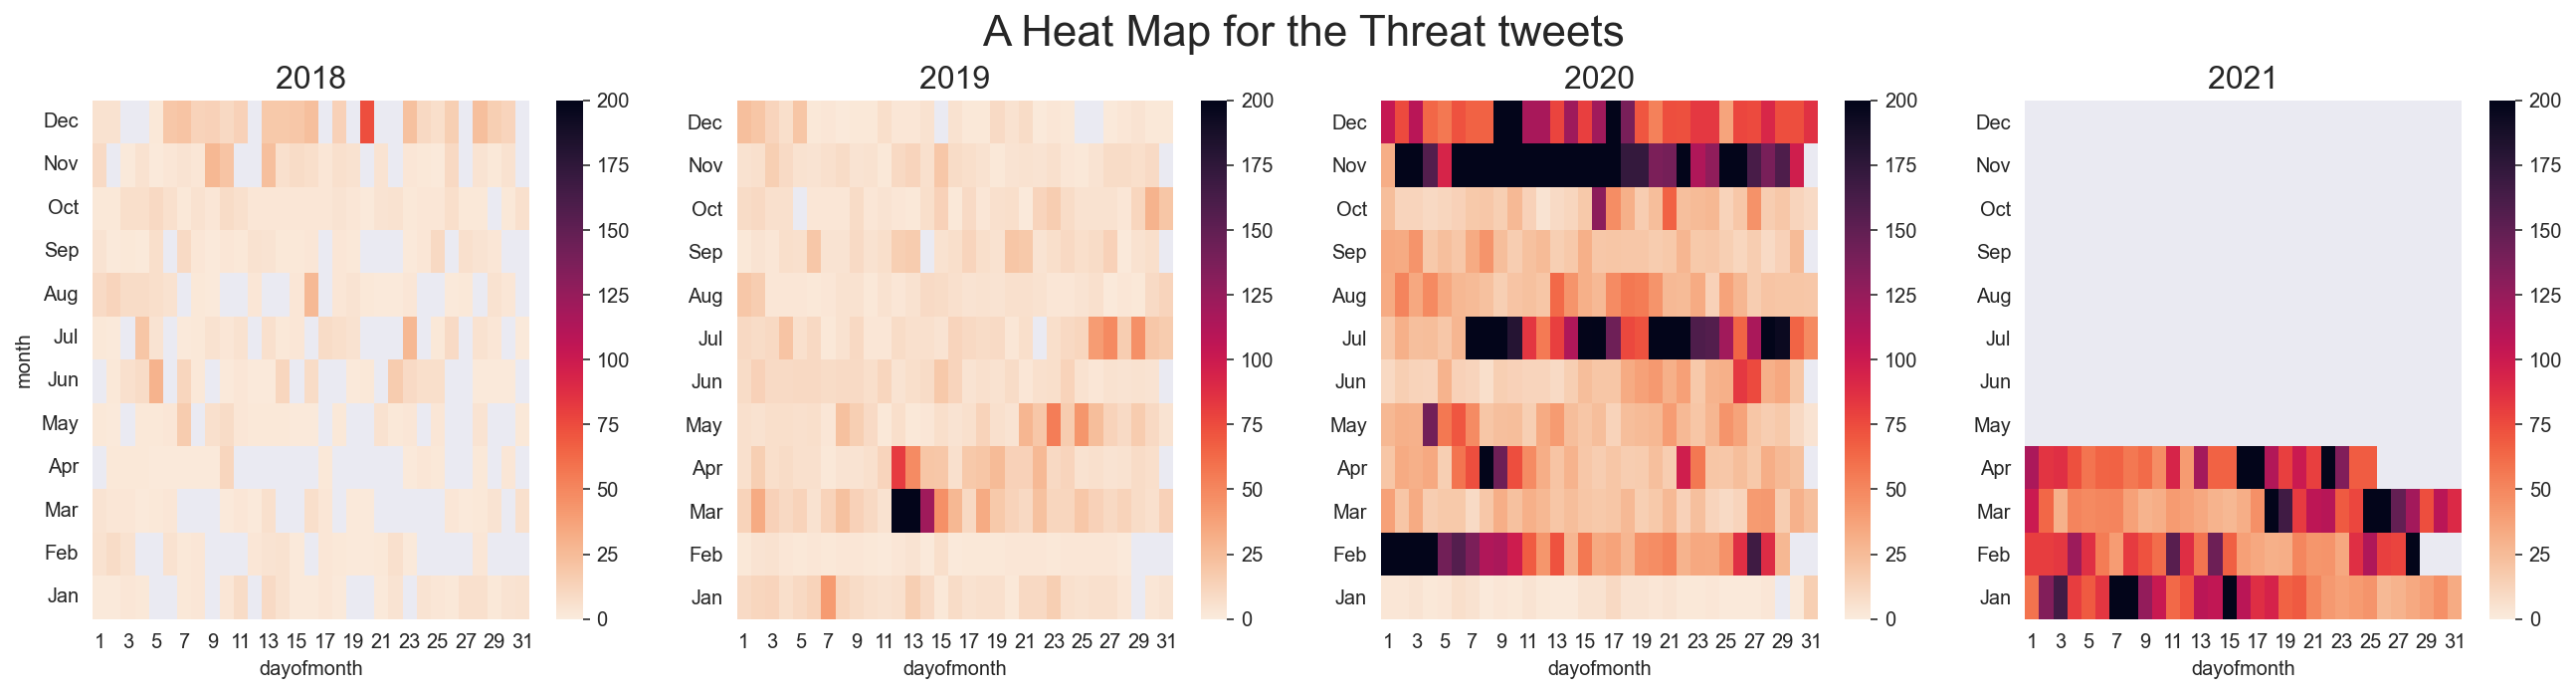

In [2]:
threat_daily = df_threat.groupby(['year', 'dayofmonth', 'month']).size().reset_index(name='ntweets')

title = 'A Heat Map for the Threat tweets'
helpers.facet_heat(threat_daily, title, n_col=4, vmax=200)

In [3]:
df_tweets.created_at.dt.date.min(), df_tweets.created_at.dt.date.max()

(datetime.date(2018, 1, 1), datetime.date(2021, 4, 25))

In [311]:
print(f"\nTotal Threat Tweets in the 4 years is: {df_threat.shape[0]}\n")


Total Threat Tweets in the 4 years is: 51025



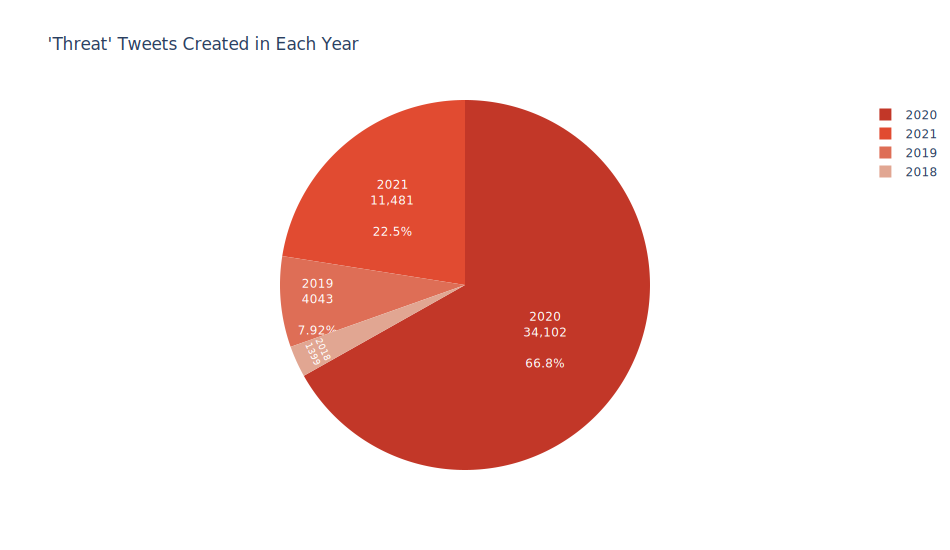

In [4]:
helpers.pie(df_threat_years, "'Threat' Tweets Created in Each Year", 
            c = ["#c23728", "#e14b31", "#de6e56", "#e1a692"])

> **Note:** 
>- The number of threat tweets are increasing from 2018 to 2020
>- For 2021: the data is not complete (only till April)

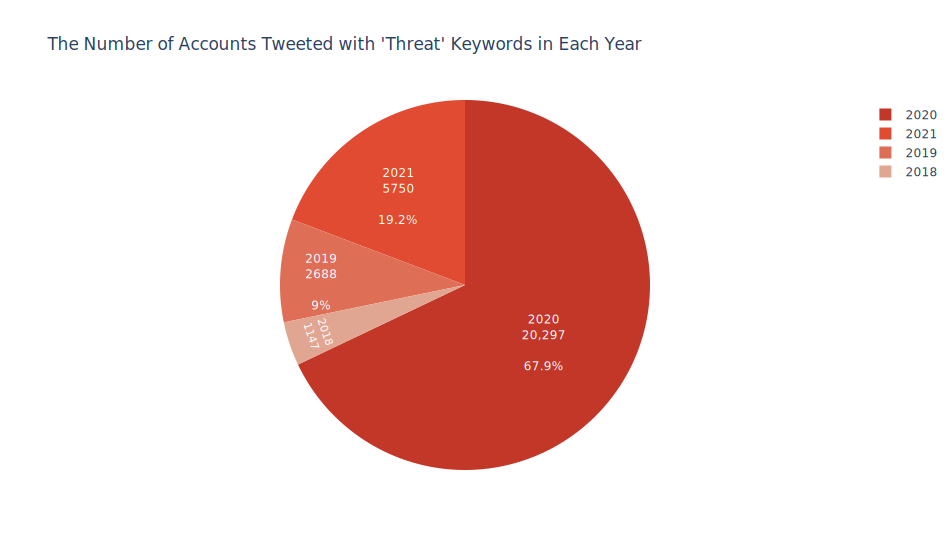

In [5]:
helpers.pie(df_threat_users, "The Number of Accounts Tweeted with 'Threat' Keywords in Each Year", 
            c = ["#c23728", "#e14b31", "#de6e56", "#e1a692"])

# Threat Keywords

In [6]:
len(all_threat)

31

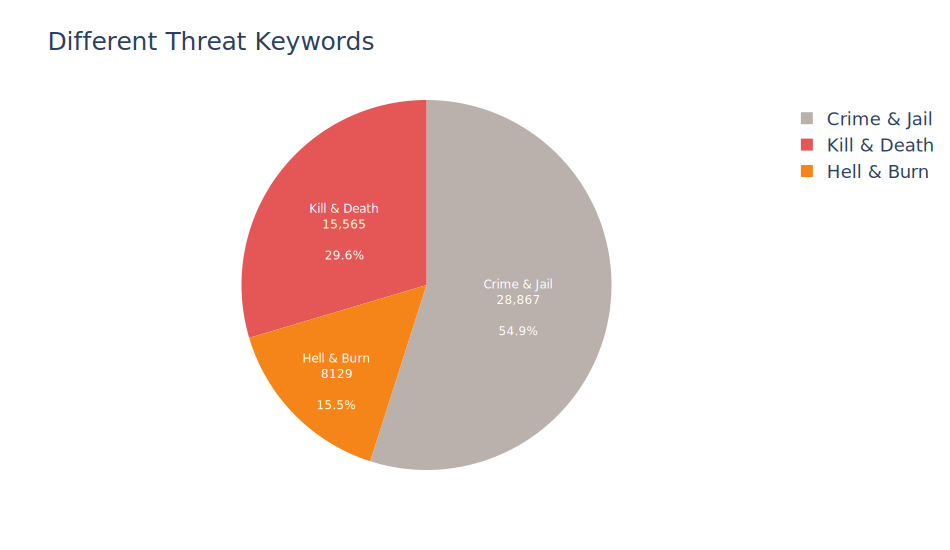

In [7]:
helpers.go_pie('Different Threat Keywords', 
             ['Kill & Death', 'Hell & Burn', 'Crime & Jail'], 
             [n_death, n_burn, n_crime], 
             c=['#E45756', '#F58518', '#BAB0AC'])

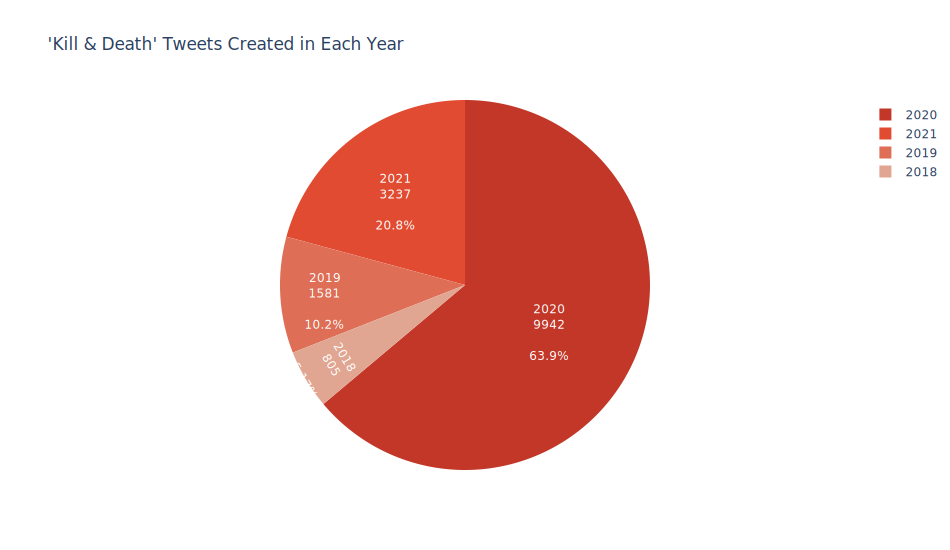

In [8]:
# import importlib
# importlib.reload(helpers)
# ['#E45756', '#EECA3B', '#F58518', '#4C78A8']
helpers.pie(df_kill_years, "'Kill & Death' Tweets Created in Each Year", 
            c = ["#c23728", "#e14b31", "#de6e56", "#e1a692"])

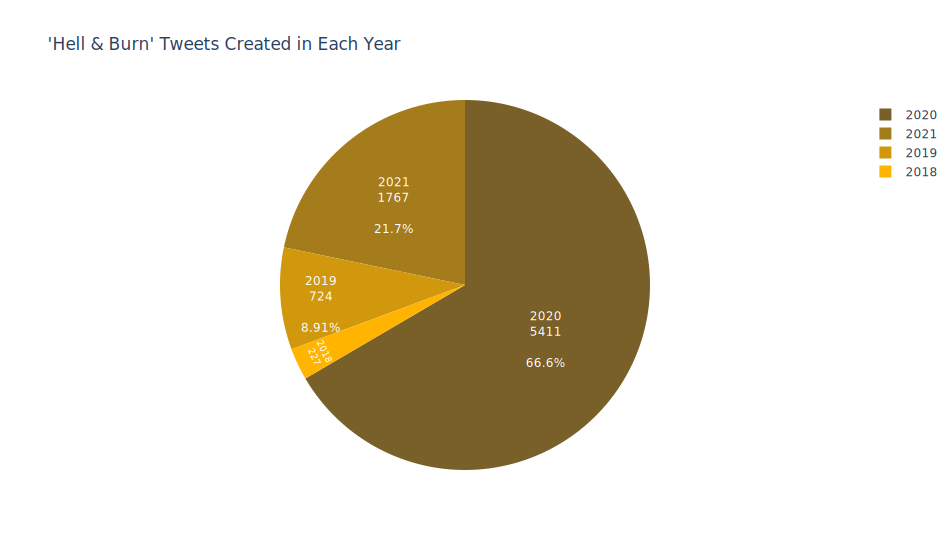

In [9]:
helpers.pie(df_burn_years, "'Hell & Burn' Tweets Created in Each Year", 
            c = ["#786028", "#a57c1b", "#d2980d", "#ffb400"])

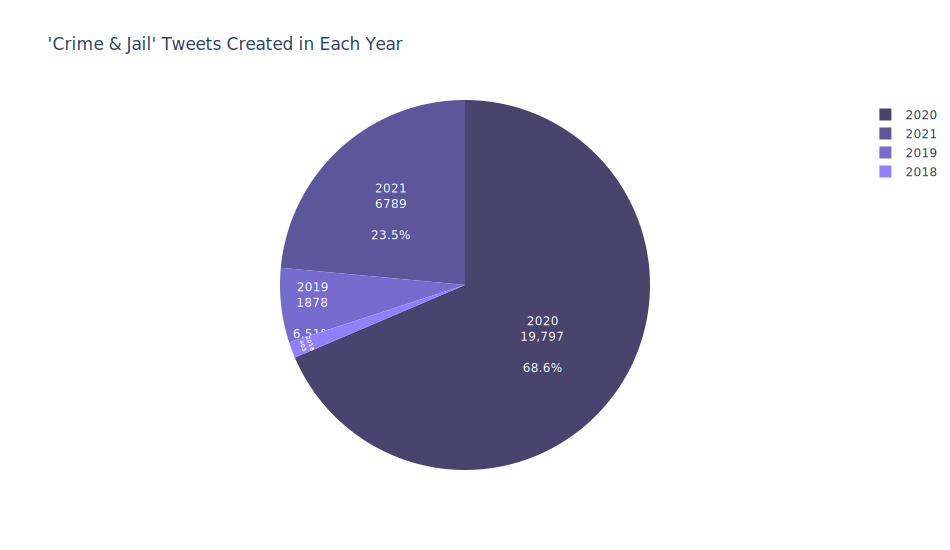

In [10]:
helpers.pie(df_crime_years, "'Crime & Jail' Tweets Created in Each Year", 
            c = ["#48446e", "#5e569b", "#776bcd", "#9080ff"])

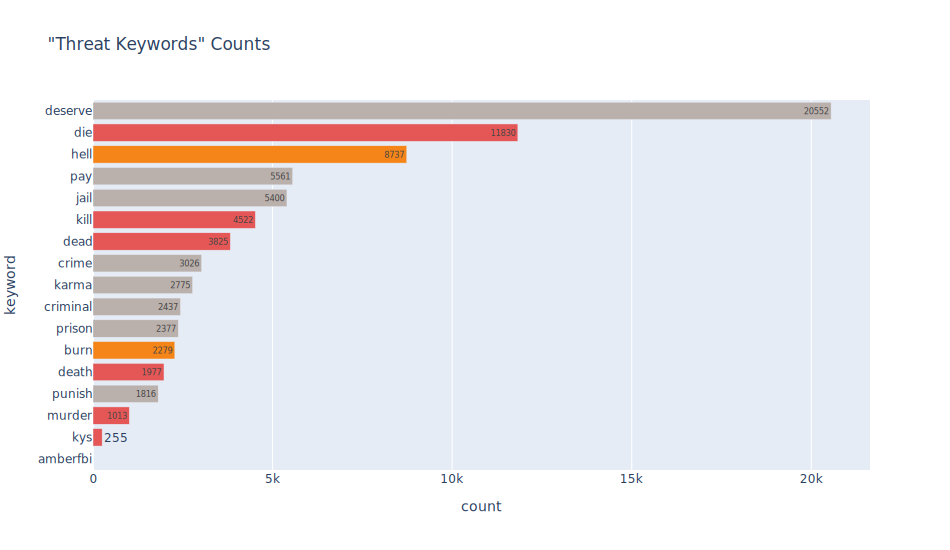

In [11]:
# threat_counts.head(60).reset_index(drop=True)
helpers.barh(threat_counts.head(17), '"Threat Keywords" Counts', threshold=0, c=mycolors1)

# Kill & Death

In [12]:
print(f'\n{df_death.shape[0]} contributions, made by {df_death.username.nunique()} Users')


15565 contributions, made by 10531 Users


<br>

# Hell & Burn

In [13]:
print(f'\n{df_burn.shape[0]} contributions, made by {df_burn.username.nunique()} Users')


8129 contributions, made by 5757 Users


<br>

# Punish, Crime, Jail & Prison

In [14]:
print(f'\n{df_crime.shape[0]} contributions, made by {df_crime.username.nunique()} Users')


28867 contributions, made by 16014 Users


<br>

# Threat & Hate-Speech Vs Others

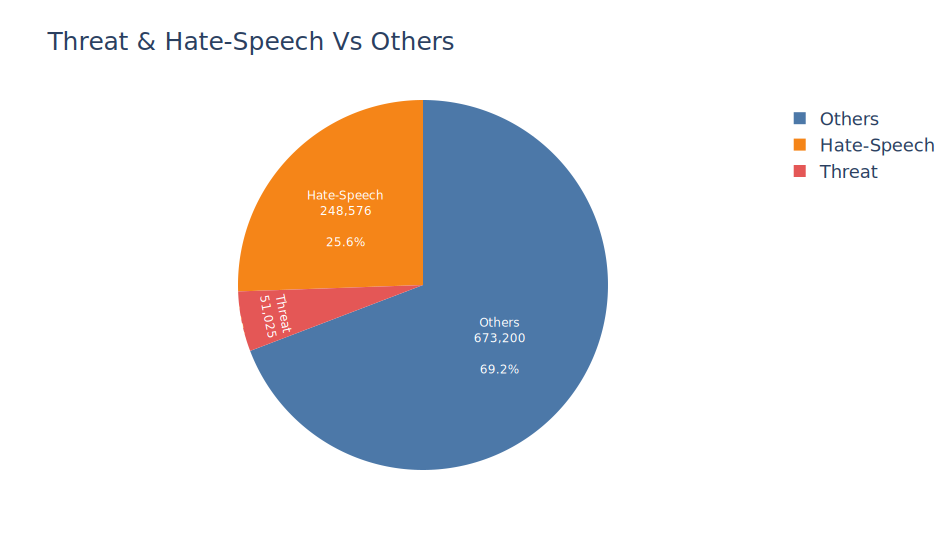

In [15]:
helpers.go_pie('Threat & Hate-Speech Vs Others', 
             ['Threat', 'Hate-Speech', 'Others'], 
             [n_threat, n_hate, nothate], 
             c=['#E45756', '#F58518', '#4C78A8'])

<br>

<a id='eda'></a>
## Exploratory Data Analysis
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda"><b>Exploratory Data Analysis</b></a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

> <ul>
 <li><a href="#threat_tweets">Threat tweets</a></li>
 <li><a href="#hate_speech">Hate-Speech tweets</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 <li><a href="#same_youtube">Same YouTube Users</a></li>
 <li><a href="#primarly">Primarly Text Investigations</a></li>
 </ul>

In [16]:
print(df_tweets.shape)
df_tweets.head(1)

(972801, 23)


created_at                                 profile_banner_url  \
1841 2018-01-01 00:21:13  https://pbs.twimg.com/profile_banners/75181031...   

                                       user_description user_location  \
1841  today in #3Dprint\n#hadronscollider\n#medtech\...       america   

                                      profile_image_url lang  \
1841  http://pbs.twimg.com/profile_images/7518904223...   en   

                                                   text  n_friends  \
1841  tv news: amber heard and elon musk are spendin...       6021   

              username     user_created_at  ...            tweet_id  \
1841  americaearnmoney 2016-07-09 16:08:42  ...  947623710281871360   

      user_screen_name  user_url        date  year month dayofmonth  \
1841   americearnmoney       NaN  2018-01-01  2018   Jan          1   

                   diff days_diff  hours_diff  
1841  540 days 08:12:31       540    08:12:31  

[1 rows x 23 columns]

In [17]:
df_tweets.created_at.dt.date.min(), df_tweets.created_at.dt.date.max()

(datetime.date(2018, 1, 1), datetime.date(2021, 4, 25))

In [18]:
# df_tweets.info()

In [19]:
# helpers.isnull(df_tweets)

In [20]:
for col in ['year', 'username', 'lang', 'user_location', 'text']:
    print('The value counts of ' + col)
    print(df_tweets[col].value_counts().head())
    print('\n')

The value counts of year
2020    612583
2021    228686
2019     94346
2018     37186
Name: year, dtype: int64


The value counts of username
🍩🍉M.G. Justice For Johnny Depp⚖Wald-Mignon🦋🌞🌷    5284
Marley M                                         5119
Support Johnny Depp ♡ Stream City of Lies        4297
Teri Carson ☠️ 🇮🇪 💀 🇨🇮 ☠️                        3584
good will                                        3543
Name: username, dtype: int64


The value counts of lang
en     656415
und    173082
es      65483
pt      22851
fr      15503
Name: lang, dtype: int64


The value counts of user_location
United Kingdom     8863
Flanders           8816
France             7604
London, England    7582
United States      7274
Name: user_location, dtype: int64


The value counts of text
#justiceforjohnnydepp                          44312
fuck amber heard                                1926
#justiceforjohnnydepp #amberheardisanabuser     1675
#amberheardisanabuser                           1632
#amberhea

<br>

<a id='threat_tweets'></a>
> ## Exploring Threat tweets
> <ul>
    <li><a href="#threat_tweets"><b>Threat tweets</b></a></li>
 <li><a href="#hate_speech">Hate-Speech tweets</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 <li><a href="#same_youtube">Same YouTube Users</a></li>
 <li><a href="#primarly">Primarly Text Investigations</a></li>
 </ul>

<a id='kill_death'></a>
>>## Kill & Death
> <ul>
 <li><a href="#kill_death"><b>Kill & Death</b></a></li>
 <li><a href="#kill_death_more">Kill & Death (More Investigations)</a></li>
 <li><a href="#hell_burn">Hell & Burn</a></li>
 <li><a href="#crime_jail">Crime & Jail</a></li>
 <li><a href="#all_threat">All Threat</a></li>
 <li><a href="#threat_users">Threat Users Contributions</a></li>
 </ul>

In [21]:
death_sub = {'deathto', "death to", 'heard needs to die', 'deserves to die', 'die a painful death', 'heard die',
             'amber die', 'heard die', 'heard can die', 'amber can die', 'get the karma you deserve', 
             'rots to death', 'you to die', 'hope you die', 'chose to die', 'heard to die', 'mera to die', 
             'rots to death', 'starves herself to death', 'burned to death', 'kill amber', 'killamber', 'go kill', 
             'kill this vampire', 'kill this bitch', 'kill this amber', 'kill that princess', 'kill that bitch', 
             'kill that cunt', 'kill your fucking abuser', 'it will kill you', 'i’ll kill you', 
             'accused amber heard of murder', 'will murder amber', 'legal to murder amber', 'please murder amber', 
             'like to murder amber', 'heard murdered'}

In [22]:
df_death_sub = df_threat[df_threat.text.str.contains('|'.join(death_sub))]
print(f'{df_death_sub.shape[0]} contributions, made by {df_death_sub.username.nunique()} Users')
df_death_sub.head(1)

243 contributions, made by 206 Users


created_at profile_banner_url user_description user_location  \
2531 2018-02-02 04:18:04                NaN              NaN           NaN   

                                      profile_image_url lang  \
2531  http://pbs.twimg.com/profile_images/9674801336...   en   

                                                   text  n_friends  \
2531  @hollywoodvamps  i hope amber heard starves he...        274   

              username     user_created_at  ...            tweet_id  \
2531  rebeka lyn rocha 2017-12-24 00:26:52  ...  959279728879284226   

      user_screen_name  user_url        date  year month dayofmonth  \
2531     rebekarocha83       NaN  2018-02-02  2018   Feb          2   

                  diff days_diff  hours_diff  
2531  40 days 03:51:12        40    03:51:12  

[1 rows x 23 columns]

### A Heat Map for the "Kill & Death" tweets (ALL)

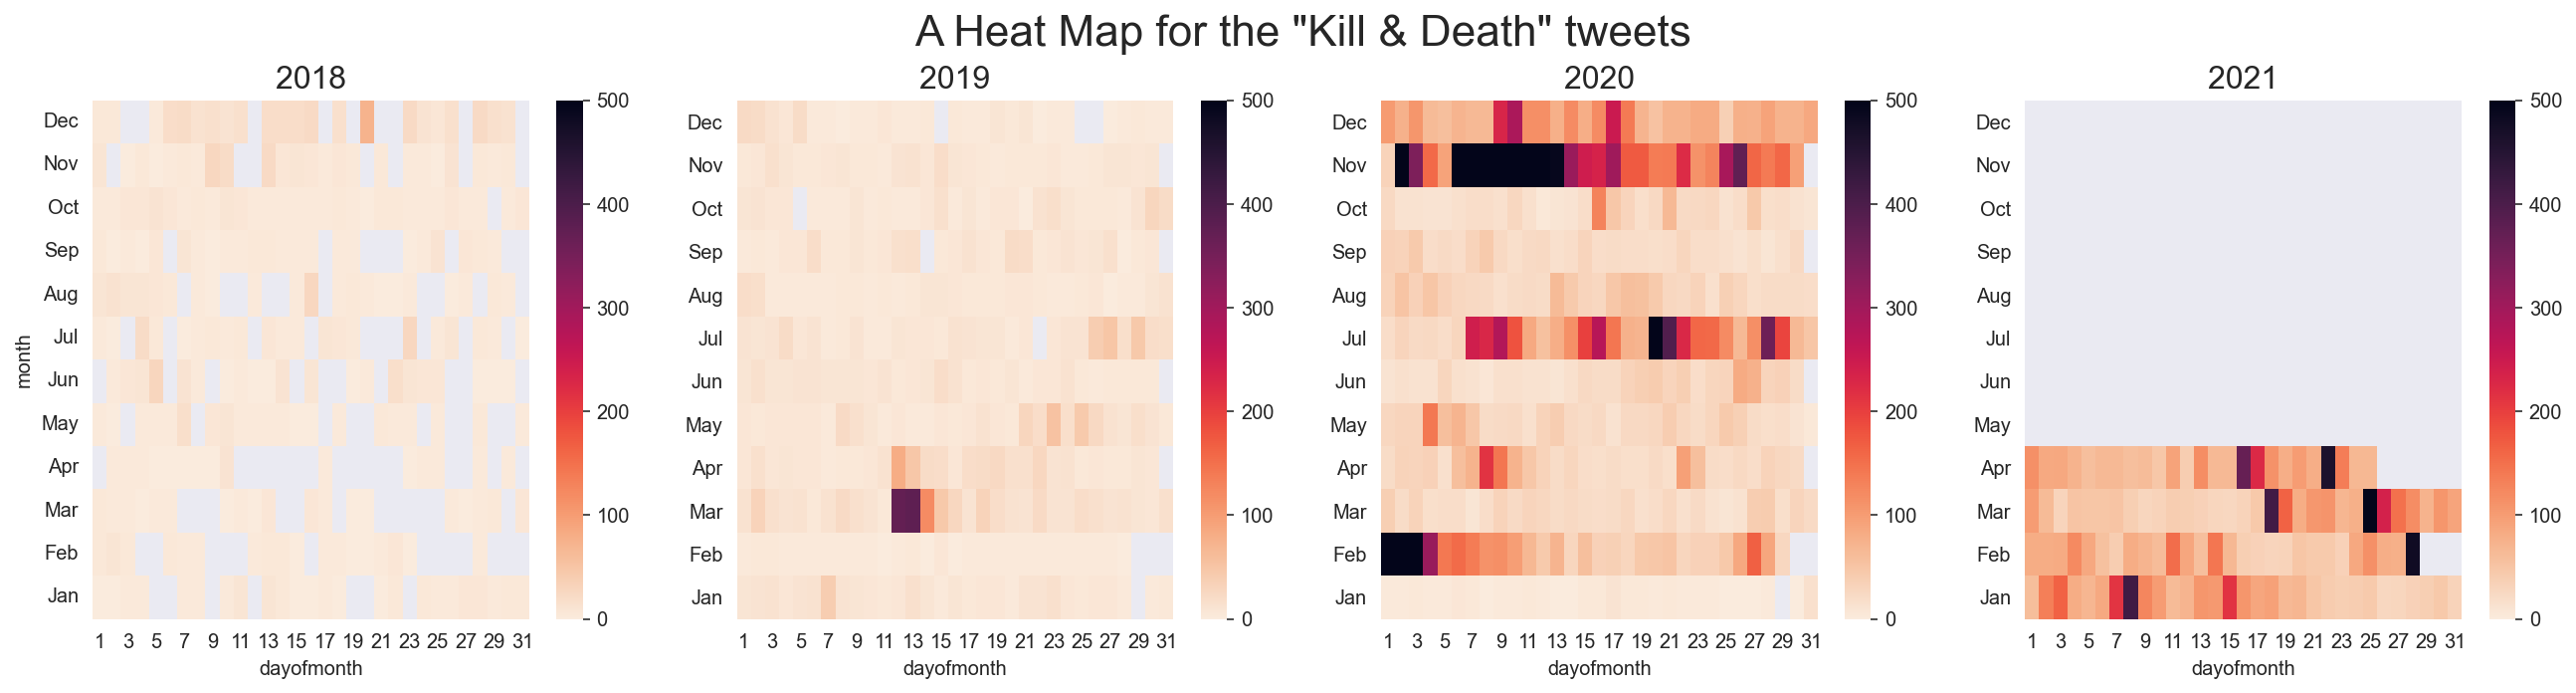

In [23]:
death_daily = df_death.groupby(['year', 'dayofmonth', 'month']).size().reset_index(name='ntweets')

title = 'A Heat Map for the "Kill & Death" tweets'
helpers.facet_heat(threat_daily, title, n_col=4, vmax=500)

### "Kill & Death" tweets Peak Dates (ALL)

In [24]:
death_dates = df_death.groupby(['date']).agg({'text':'count', 'user_id': 'count'}).reset_index(
).rename(columns={'text':'ntweets', 'user_id': 'n_users'}).sort_values('ntweets', ascending=False)

death_dates.head(15)

date  ntweets  n_users
569  2020-02-02      961      961
736  2020-07-20      686      686
843  2020-11-06      527      527
844  2020-11-07      457      457
839  2020-11-02      318      318
737  2020-07-21      279      279
848  2020-11-11      235      235
982  2021-03-25      198      198
570  2020-02-03      173      173
906  2021-01-08      160      160
863  2020-11-26      147      147
845  2020-11-08      141      141
913  2021-01-15      136      136
846  2020-11-09      131      131
661  2020-05-04      127      127

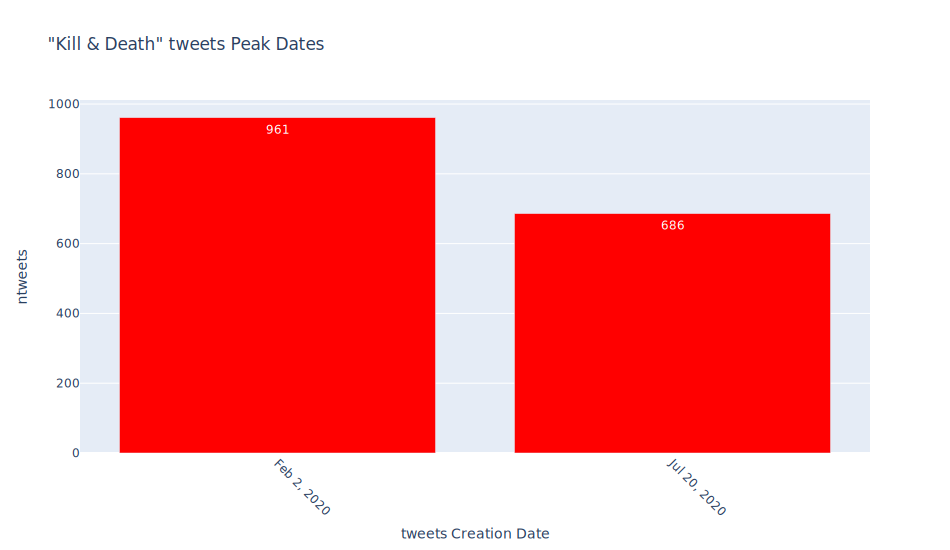

In [25]:
helpers.bar_peaks(death_dates[['date', 'ntweets']].head(2), 
                  '"Kill & Death" tweets Peak Dates')

# Most Repeated "Kill & Death" tweets

In [26]:
df_death_sub.text.value_counts().head()

@nickwallis wow so an fbi agent accused amber heard of murder and extortion in the us case and literally nobody but this paralegal on youtube are talking about it.. pls share to spread awareness!!! youtube won’t promote these videos https://t.co/zrhnz8jraf    3
amber heard can die                                                                                                                                                                                                                                                 2
@thenamesq wow so an fbi agent accused amber heard of murder and extortion in the us case and literally nobody but this paralegal on youtube are talking about it.. pls share to spread awareness!!! youtube won’t promote these videos https://t.co/zrhnz8jraf     2
@hollywoodvamps  i hope amber heard starves herself to death nasty poser she ain’t nothing but a notch on the belt nigga don’t worry no one wants her but her trash ass ex. no one can trust her money grubbing looser

In [27]:
df = df_death_sub[['created_at', 'days_diff', 'hours_diff', 'text', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True).style.set_properties(**{'text-align': 'left'}))

In [28]:
df = df_death_sub[['created_at', 'days_diff', 'hours_diff', 'text', 'username']][60:].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True).style.set_properties(**{'text-align': 'left'}))

In [29]:
df = df_death_sub[['created_at', 'days_diff', 'hours_diff', 'text', 'username']][120:].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True).style.set_properties(**{'text-align': 'left'}))

In [30]:
df = df_death_sub[['created_at', 'days_diff', 'hours_diff', 'text', 'username']][180:].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True).style.set_properties(**{'text-align': 'left'}))

<br>

# Top Users Commented with "Kill & Death" keywords

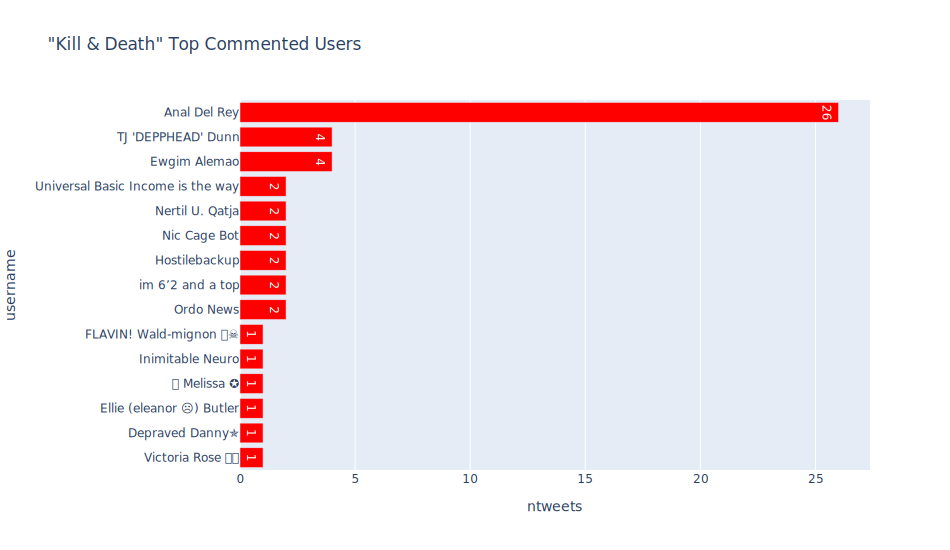

In [31]:
death_users = df_death_sub.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ntweets'})
helpers.barh(death_users.head(15), '"Kill & Death" Top Commented Users', threshold=0, c=0)

In [32]:
set_death_users = set(death_users.username.head(15))

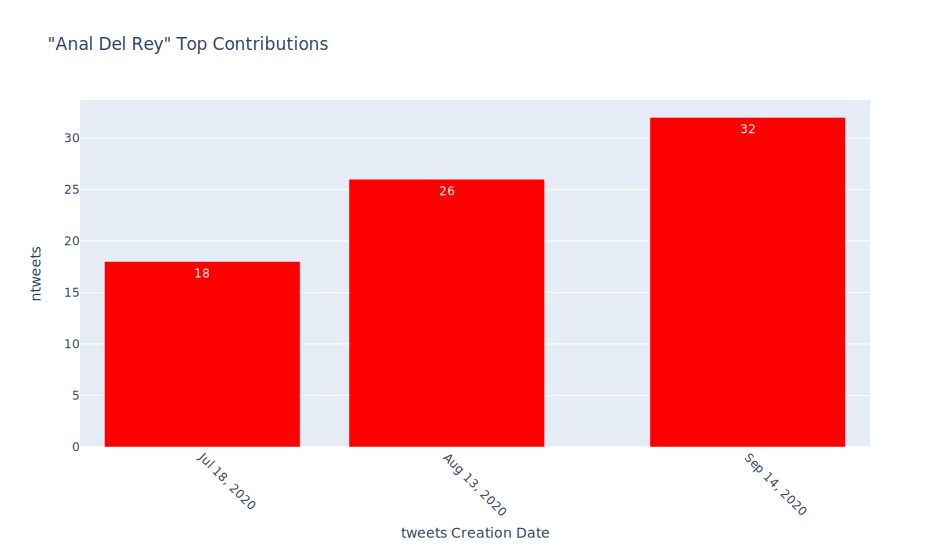

In [33]:
helpers.contr_peaks(df_tweets, "Anal Del Rey", n=3, threshold=0)

In [34]:
df_threat.query(" username == 'Anal Del Rey' ").text.value_counts().head()

@nickwallis wow so an fbi agent accused amber heard of murder and extortion in the us case and literally nobody but this paralegal on youtube are talking about it.. pls share to spread awareness!!! youtube won’t promote these videos https://t.co/zrhnz8jraf         3
@thenamesq wow so an fbi agent accused amber heard of murder and extortion in the us case and literally nobody but this paralegal on youtube are talking about it.. pls share to spread awareness!!! youtube won’t promote these videos https://t.co/zrhnz8jraf          2
@johnnyhellodepp crowd boos amber heard!! share pls                                                                                                                                                                                                                      1
@nosanityallowed wow so an fbi agent accused amber heard of murder and extortion in the us case and literally nobody but this paralegal on youtube are talking about it.. pls share to spread awareness

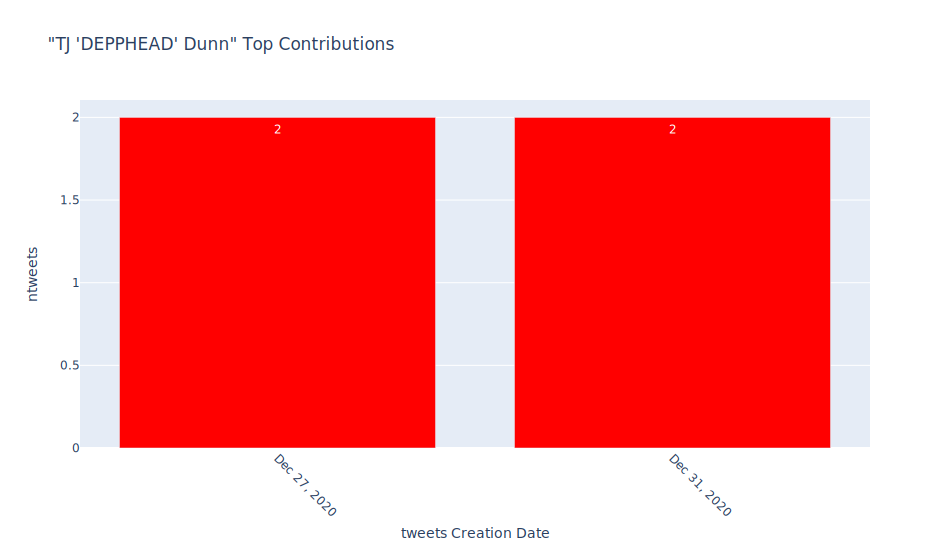

In [35]:
helpers.contr_peaks(df_tweets, "TJ 'DEPPHEAD' Dunn", n=2, threshold=0)

In [36]:
user = "TJ 'DEPPHEAD' Dunn"
df_threat.query(" username == @user ").text.value_counts().head()

i now pronounce amber heard and donald trump wife and husband! ya may kiss each other! highway to hell! #acdc /m\ rip                                                                                                                      1
johnny depp is #winning! jail time for #amberheard! she needs to #plugitup! gotta watch the new stephen king's the stand on cbs all access! amber heard dies in it! it's a '90s kid thing.                                                 1
#hiac2019 lacey evans is the amber heard of the wwe! baron corbin hates gay people! by the way, i was sick last year and i miss a lot of wwe pay-per-views. same with aew and nwa! 4.5 stars                                               1
#smackdown 4.5 stars! btw, the real tim dunn knows that alexis bliss is the amber heard of the wwe! not lacey evans! i bet she laughs every time johnny depp dies in #anoes and #noes6! tic toc your time is up! //// #nxtfanandaewfan!    1
amber heard should marry rose mcgowan! #rippruehalli

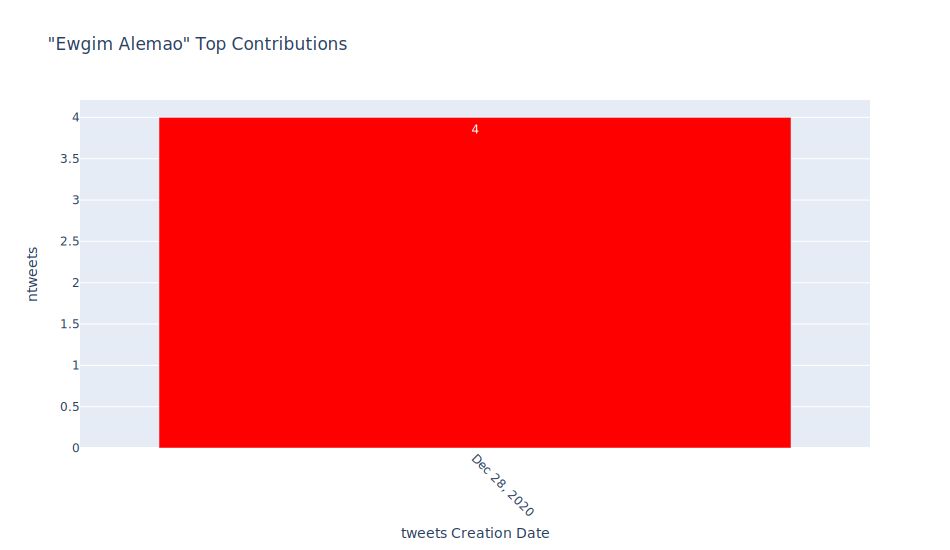

In [37]:
helpers.contr_peaks(df_tweets, "Ewgim Alemao", n=3, threshold=0)

In [38]:
df_threat.query(" username == 'Ewgim Alemao' ").text.value_counts().head()

@fant4sticbr @danielrpk death to amber heard, johnny depp will always be gellert grindelwald.    1
@silviane_f death to amber heard, johnny depp will always be gellert grindelwald.                1
@amberheardbra death to amber heard, johnny depp will always be gellert grindelwald.             1
@applwuse death to amber heard, johnny depp will always be gellert grindelwald.                  1
Name: text, dtype: int64

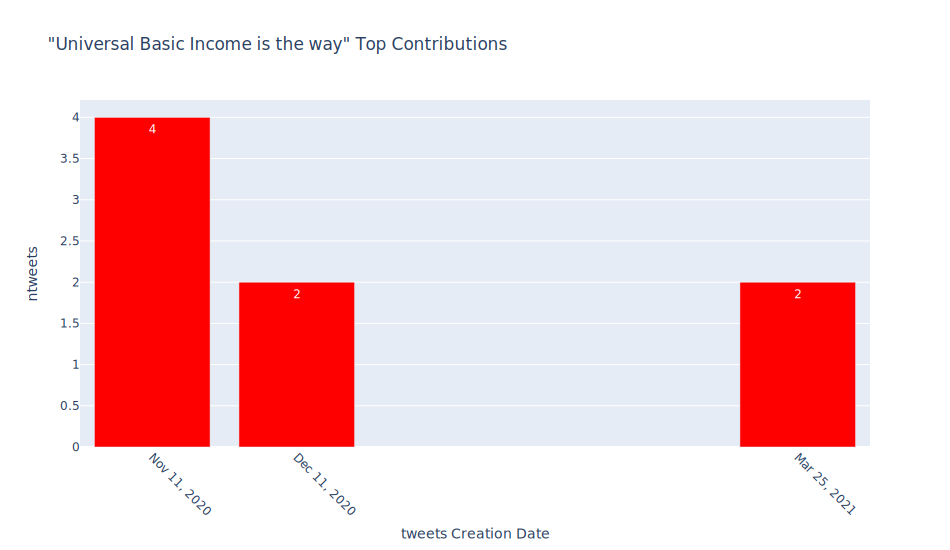

In [39]:
helpers.contr_peaks(df_tweets, "Universal Basic Income is the way", n=3, threshold=0)

In [40]:
df_threat.query(" username == 'Universal Basic Income is the way' ").text.value_counts().head()

crazy! not one of the troll johnny depp stans mentioned depps email wishing amber heard was dead. \n\nwhich means he sent it to someone. which could be construed as an attemp to have her murdered.\n\nnot one of these misogynists mentioned that.                                      1
@roadtothrone @dumbledelwald @mahwashajaz_ @grossinick1 @thr he's rich and powerful. he doesn't need you to defend him. \n\nhe wants you to destroy amber heard.\n\nyou are a murder cult!                                                                                                1
@deppsparrow1 what happened to depp is the judge saw in email where he wished amber heard was dead, that depp tried to have heard murdered.                                                                                                                                               1
everyone demanding #justiceforjohnnydepp are all morons. everything you think you know comes from depp's team. the recording is edited and out of co

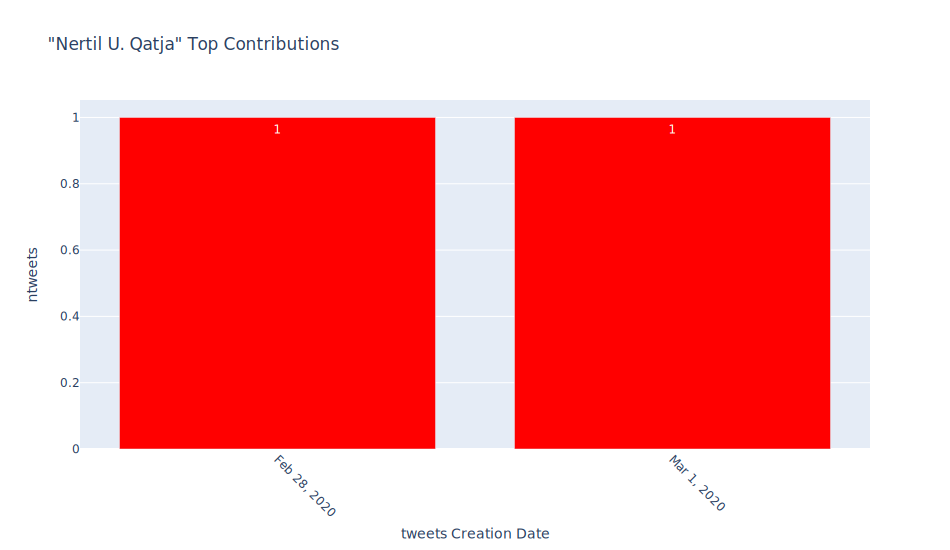

In [41]:
helpers.contr_peaks(df_tweets, "Nertil U. Qatja", n=3, threshold=0)

In [42]:
df_threat.query(" username == 'Nertil U. Qatja' ").text.value_counts().head()

johnny depp threatened to kill amber heard https://t.co/vvjapyrww5 https://t.co/dlcbup5fsd    1
johnny depp threatened to kill amber heard https://t.co/vvjapyrww5 https://t.co/em09tz941c    1
Name: text, dtype: int64

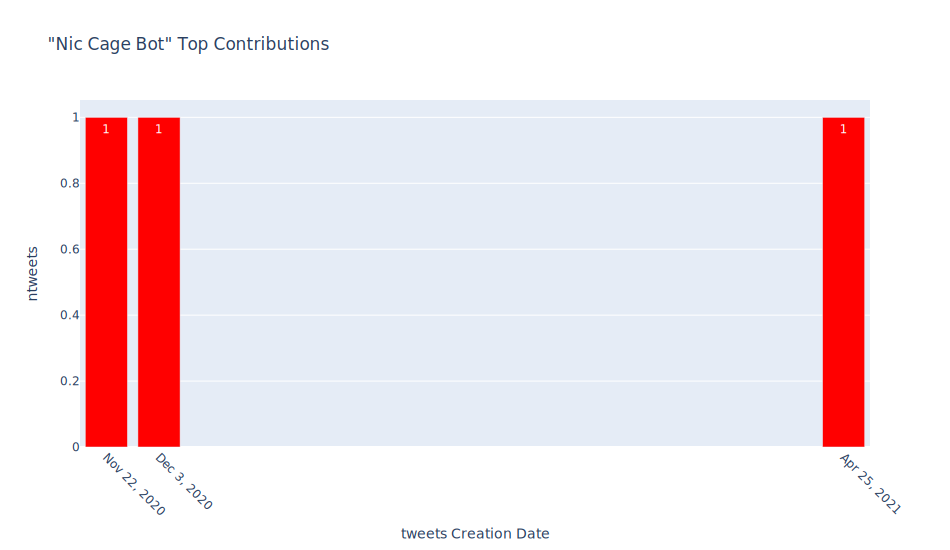

In [43]:
helpers.contr_peaks(df_tweets, "Nic Cage Bot", n=3, threshold=0)

In [44]:
df_threat.query(" username == 'Nic Cage Bot' ").text.value_counts().head()

cage plays a sorcerer who investigates the origin of a snuff film and evade a hitman sent to kill him. in the end, he finds an enormous masonic treasure beneath manhattan's trinity church. amber heard costars.                      1
cage plays an alcoholic screenwriter who seduces a girl from the valley and struggles to write the screenplay. in the end, he reconciles with his wife after leaving prison. amber heard costars.                                      1
cage plays a mole who is a secret agent who is driven to kill his children in a mass hysteria and spends the second world war in a love triangle. in the end, he learns the true meaning of christmas. amber heard costars.            1
cage plays an italian army captain who discovers an enormous coverup of a genocide and must safely land a plane taken over by criminals. in the end, he survived being thrown off a cliff and got his revenge. amber heard costars.    1
cage plays a thief who delivers the atomic bombs to leyte island and

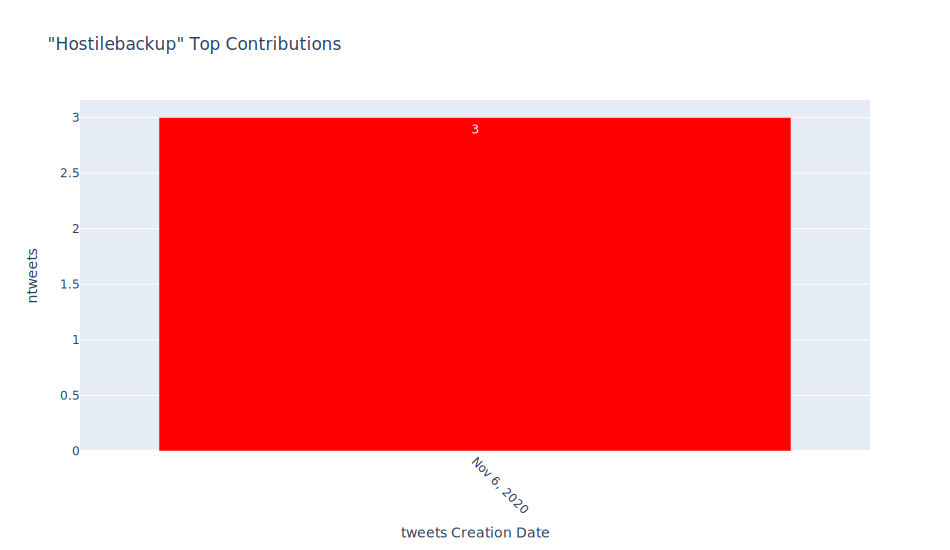

In [45]:
helpers.contr_peaks(df_tweets, "Hostilebackup", n=3, threshold=0)

In [46]:
df_threat.query(" username == 'Hostilebackup' ").text.value_counts().head()

@dojetunes @iwillbeblunt @_deathtopia @amh0stile @ign i got banned for saying fuck amber heard                                            1
@dojetunes @iwillbeblunt @_deathtopia @amh0stile @ign well, i won't be watching fb3. fuck wb and fuck amber heard and fuck jack dorsey    1
Name: text, dtype: int64

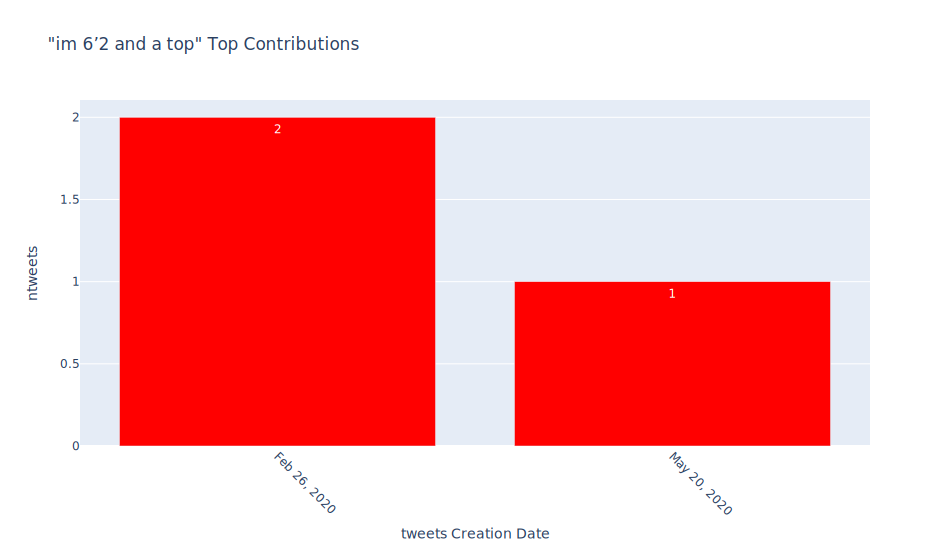

In [47]:
helpers.contr_peaks(df_tweets, "im 6’2 and a top", n=3, threshold=0)

In [48]:
df_threat.query(" username == 'im 6’2 and a top' ").text.value_counts().head()

@skaterscantdie johnny depp had leaked texts describing how he wanted to kill amber heard by drowning and setting her on fire and raping her    1
@misommar johnny depp had leaked texts describing how he wanted to kill amber heard by drowning and setting her on fire and raping her          1
Name: text, dtype: int64

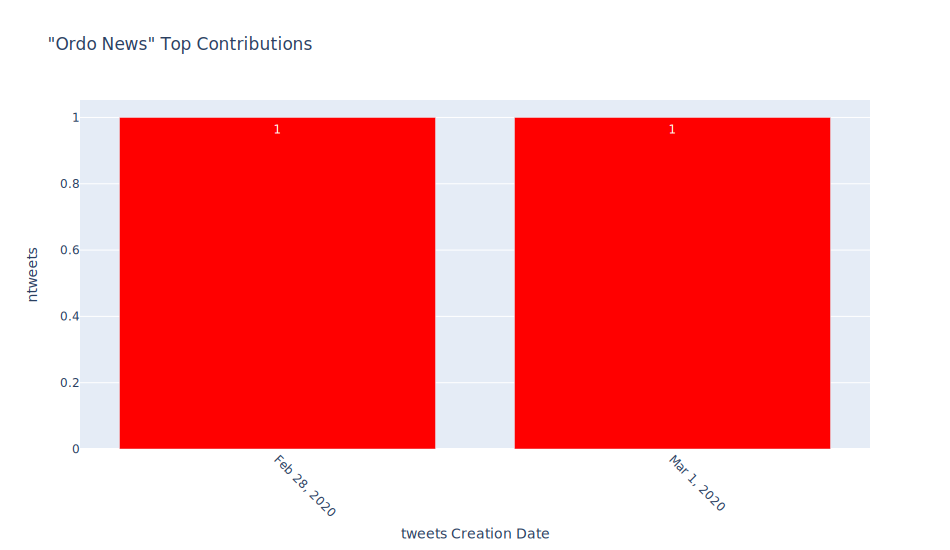

In [49]:
helpers.contr_peaks(df_tweets, "Ordo News", n=3, threshold=0)

In [50]:
df_threat.query(" username == 'Ordo News' ").text.value_counts().head()

johnny depp threatened to kill amber heard https://t.co/kver7ytejk https://t.co/resvdwumls                      1
johnny depp threatened to kill amber heard #johnnydepp #life https://t.co/kver7ytejk https://t.co/bzbqybjhdp    1
Name: text, dtype: int64

<br>

<br>

<a id='kill_death_more'></a>
>>## Kill & Death (More Investigations)
> <ul>
 <li><a href="#kill_death">Kill & Death</a></li>
 <li><a href="#kill_death_more"><b>Kill & Death (More Investigations)</b></a></li>
 <li><a href="#hell_burn">Hell & Burn</a></li>
 <li><a href="#crime_jail">Crime & Jail</a></li>
 <li><a href="#all_threat">All Threat</a></li>
 <li><a href="#threat_users">Threat Users Contributions</a></li>
 </ul>

## NOTE: "These areas are extracted from the text to help in extracting the keywords to be used in the analysis"

- deathtoHeard
- death to amber heard
- amber heard needs to die 
- you will die a painful death and rot in hell b**ch!
- I hope amber heard dies
- I hope all of you get the karma you deserve
- amber heard can die
- amber heard, i want you to die
- amber heard literally deserves to die
- amber heard needs to die
- i can't wait for amber heard to die as an actress and social activist
- amber heard’s abusing scumbag ass is the weirdest hill to die on and brag
- heard die
- amber die
- i hope amber heard rots to death
- i hope amber heard starves herself to death
- burned to death
<br>
- kill amber
- killamber
- go kill
- kill this vampire!
- kill this bitch
- kill this amber heard bitch
- kill that princess mera
- kill that bitch
- kill that cunt
- just kill your fucking abuser.
- it will kill you
- retweet one more amber heard tweet i’ll kill you
- we all know if johnny depp doesn’t win , someone is going to be out to kill amber heard , better get your armed police baby girl you’re dead!
- accused amber heard of murder
- i will murder amber heard for breakfast
- if it was legal to murder amber heard would be 6ft in the ground
- someone please murder amber heard
- i would like to murder amber heard
- can we make it legal to murder amber heard and her fans yet?? 
- @dc_connections amber heard murdered by gal gadot we all love to see it

In [51]:
df_amber = df_tweets[df_tweets.text.str.contains('amber')]

# Death, Die, Kill & Murder

<a id='kill_murder'></a>
>>## Kill & Murder
> <ul>
 <li><a href="#kill_murder"><b>Kill & Murder</b></a></li>
 <li><a href="#kill_her">Kill Her</a></li>
 <li><a href="#death">Death</a></li>
 <li><a href="#die">Die</a></li>
 </ul>

In [52]:
kill_murder = {'kill amber', 'killamber', 'go kill', 'kill this vampire', 'kill this bitch', 'kill this amber',
               'kill that princess', 'kill that bitch', 'kill that cunt', 'kill your fucking abuser', 
               'it will kill you', 'i’ll kill you', 'will murder amber', 'legal to murder amber', 
               'please murder amber', 'like to murder amber', 'heard murdered', 'accused amber heard of murder'}

In [53]:
df_kill_amber = df_tweets[df_tweets.text.str.contains('|'.join(kill_murder))]
print(f'{df_kill_amber.shape[0]} contributions, made by {df_kill_amber.username.nunique()} Users')
df_kill_amber.head(1)

124 contributions, made by 93 Users


created_at                                 profile_banner_url  \
2688 2018-02-13 04:13:07  https://pbs.twimg.com/profile_banners/39748571...   

                                       user_description user_location  \
2688  Journalist. Most recently in: The Guardian, Th...           NaN   

                                      profile_image_url lang  \
2688  http://pbs.twimg.com/profile_images/1326438348...   en   

                                                   text  n_friends  \
2688  oi america, that politician who wanted to kill...       2746   

          username     user_created_at  ...            tweet_id  \
2688  Gina Rushton 2009-05-13 13:22:33  ...  963264748635676674   

      user_screen_name                 user_url        date  year month  \
2688          ginarush  https://t.co/UFzkMIgVGS  2018-02-13  2018   Feb   

     dayofmonth                diff days_diff  hours_diff  
2688         13  3197 days 14:50:34      3197    14:50:34  

[1 rows x 23 columns]

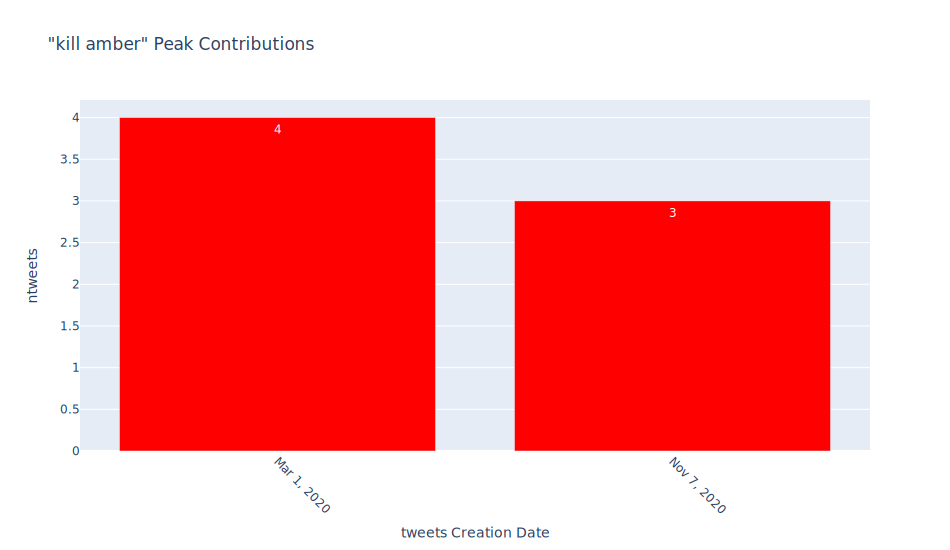

In [54]:
helpers.text_all_peaks(df_threat, 'kill amber', n=2, threshold=0)

In [55]:
df_kill_amber.text.value_counts().head()

@nickwallis wow so an fbi agent accused amber heard of murder and extortion in the us case and literally nobody but this paralegal on youtube are talking about it.. pls share to spread awareness!!! youtube won’t promote these videos https://t.co/zrhnz8jraf    3
@thenamesq wow so an fbi agent accused amber heard of murder and extortion in the us case and literally nobody but this paralegal on youtube are talking about it.. pls share to spread awareness!!! youtube won’t promote these videos https://t.co/zrhnz8jraf     2
oi america, that politician who wanted to kill amber heard’s dogs is caught up in a massive scandal https://t.co/r5h3e785ch                                                                                                                                         1
we all know if johnny depp doesn’t win , someone is going to be out to kill amber heard , better get your armed police baby girl you’re dead! 👏🏼 \n\n#justiceforjohnnydepp                                            

In [56]:
df = df_kill_amber[['created_at', 'days_diff', 'hours_diff', 'text', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True).style.set_properties(**{'text-align': 'left'}))

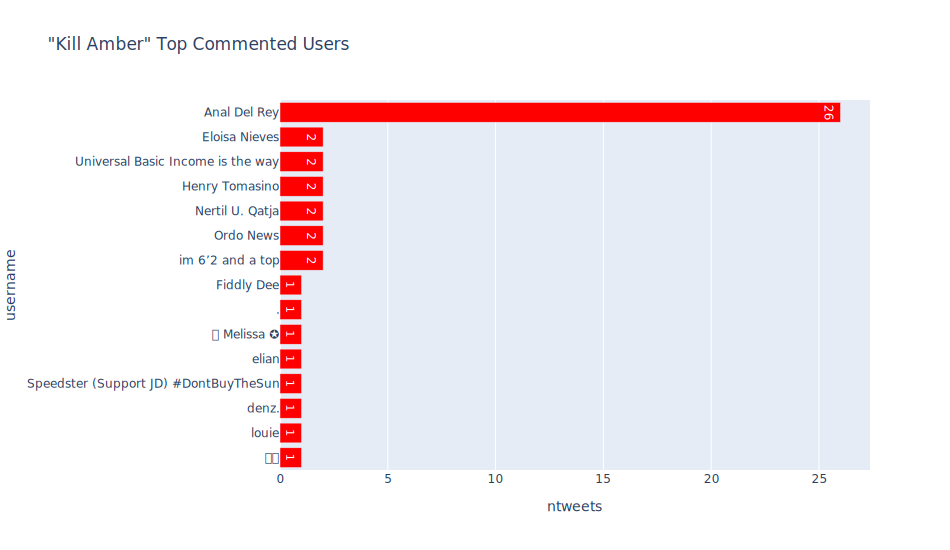

In [57]:
kill_amber_users = df_kill_amber.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ntweets'})
helpers.barh(kill_amber_users.head(15), '"Kill Amber" Top Commented Users', threshold=0, c=0)

<br>

<a id='kill_her'></a>
>>## Kill Her
> <ul>
 <li><a href="#kill_murder">Kill & Murder</a></li>
 <li><a href="#kill_her"><b>Kill Her</b></a></li>
 <li><a href="#death">Death</a></li>
 <li><a href="#die">Die</a></li>
 </ul>

In [58]:
df_kill_her = df_tweets[df_tweets.text.str.contains('kill her')]
print(f'{df_kill_her.shape[0]} contributions, made by {df_kill_her.username.nunique()} Users')
df_kill_her.head(1)

454 contributions, made by 404 Users


created_at                                 profile_banner_url  \
6999 2018-05-25 20:54:14  https://pbs.twimg.com/profile_banners/14083331...   

                                     user_description user_location  \
6999  Pretty friendly, kind of sassy. Psychic/Psycho.           NaN   

                                      profile_image_url lang  \
6999  http://pbs.twimg.com/profile_images/9799768446...   en   

                                                   text  n_friends  \
6999  @myshellcc he beat his ex-wife (amber heard) m...        306   

           username     user_created_at  ...             tweet_id  \
6999  Claudia Monet 2013-05-06 18:05:43  ...  1000117864190369792   

      user_screen_name                 user_url        date  year month  \
6999         Mie_Belle  https://t.co/mEb4SH4iaW  2018-05-25  2018   May   

     dayofmonth                diff days_diff  hours_diff  
6999         25  1845 days 02:48:31      1845    02:48:31  

[1 rows x 23 columns]

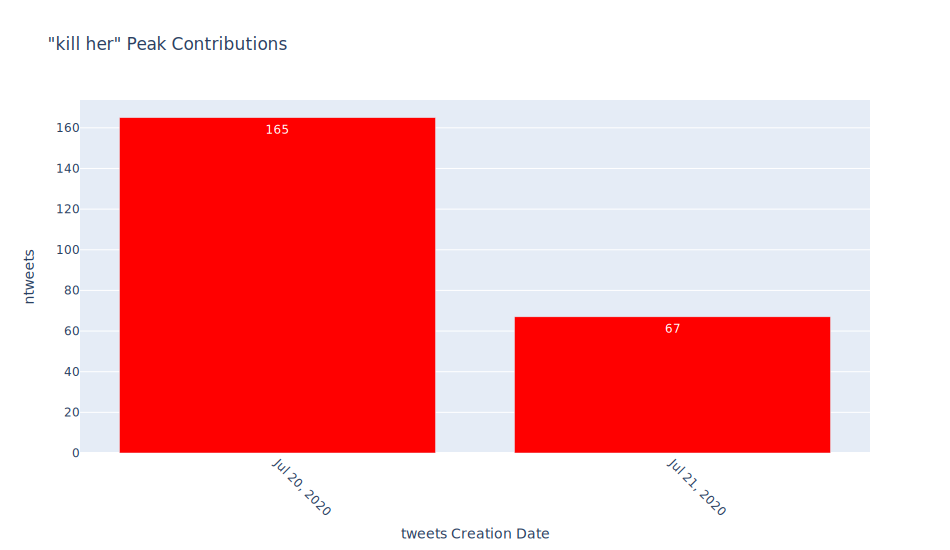

In [59]:
helpers.text_all_peaks(df_kill_her, 'kill her', n=2, threshold=0)

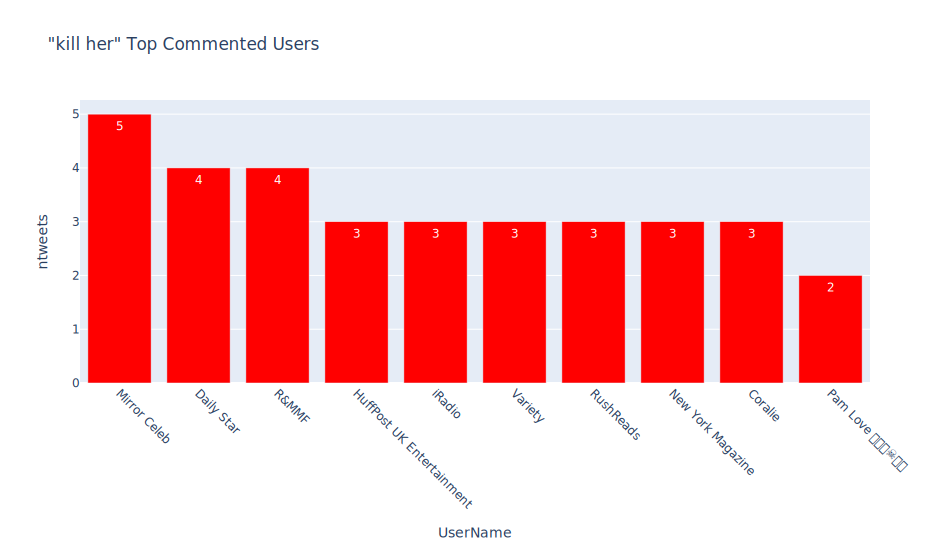

In [60]:
helpers.users_all_peaks(df_kill_her, 'kill her', n=10, threshold=0)

In [61]:
df_kill_her.text.value_counts().head()

amber heard says she feared johnny depp would kill her, denies drug use claims https://t.co/4vxrqjpikk via @justjared                                                                                                                                                                                             2
amber heard says johnny depp threatened to kill her https://t.co/s9lkuygek1                                                                                                                                                                                                                                       2
amber heard alleges she was afraid johnny depp was going to kill her https://t.co/xib1nmmkgk via @variety                                                                                                                                                                                                         1
amber heard tells court she feared depp would kill her https://t.co/1gmohktd

In [62]:
df = df_kill_her[['created_at', 'days_diff', 'hours_diff', 'text', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True).style.set_properties(**{'text-align': 'left'}))

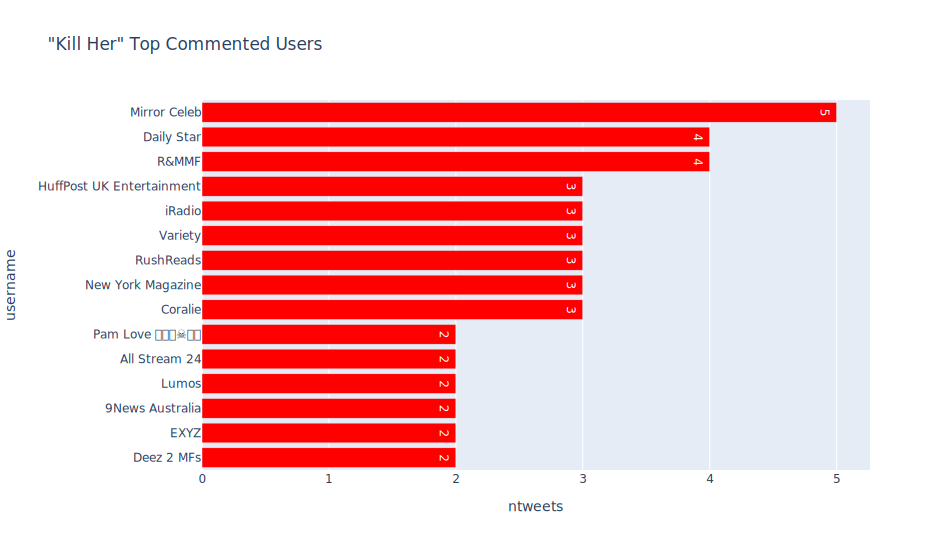

In [63]:
kill_her_users = df_kill_her.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ntweets'})
helpers.barh(kill_her_users.head(15), '"Kill Her" Top Commented Users', threshold=0, c=0)

<a id='death'></a>
>>## Death
> <ul>
 <li><a href="#kill_murder">Kill & Murder</a></li>
 <li><a href="#kill_her">Kill Her</a></li>
 <li><a href="#death"><b>Death</b></a></li>
 <li><a href="#die">Die</a></li>
 </ul>

In [64]:
death_list = {'deathto', "death to", 'rots to death', 'painful death', 'starves herself to death', 
              'burned to death'}

In [65]:
df_deathto = df_tweets[df_tweets.text.str.contains('|'.join(death_list))]
df_deathto.text.value_counts().head()

@hollywoodvamps  i hope amber heard starves herself to death nasty poser she ain’t nothing but a notch on the belt nigga don’t worry no one wants her but her trash ass ex. no one can trust her money grubbing looser bitch watch out boys                            1
"difference between life or death to a child" \nthis vile piece of turd uses dying children just for publicity. she needs to answer for everything she's done.\n#holdahaccountable\n#amberheardisagolddigger #amberheardisafraud \n#justiceforjohnnydepp \n#perjury    1
you will die a painful death and rot in hell b**ch! @realamberheard #justiceforjohnnydepp                                                                                                                                                                              1
warner bros siding amber heard? i’m not at all surprised. this is the same trash studio who used zack snyder’s daughters death to remove him when in reality they fired him because didn’t meet studios visio

In [66]:
df = df_deathto[['created_at', 'days_diff', 'hours_diff', 'text', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True).style.set_properties(**{'text-align': 'left'}))

In [67]:
# df_deathto

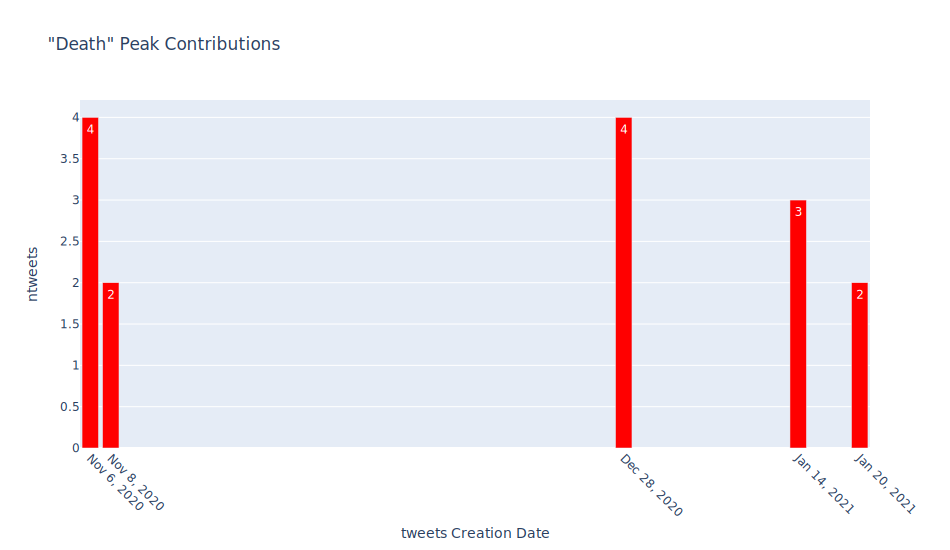

In [68]:
deathto_dates = df_deathto.date.value_counts().to_frame().reset_index().rename(columns={'index':'date',
                                                                                  'date':'ntweets'})
helpers.bar_peaks(deathto_dates.head(), '"Death" Peak Contributions',
                  threshold=0, xlabel='tweets Creation Date')

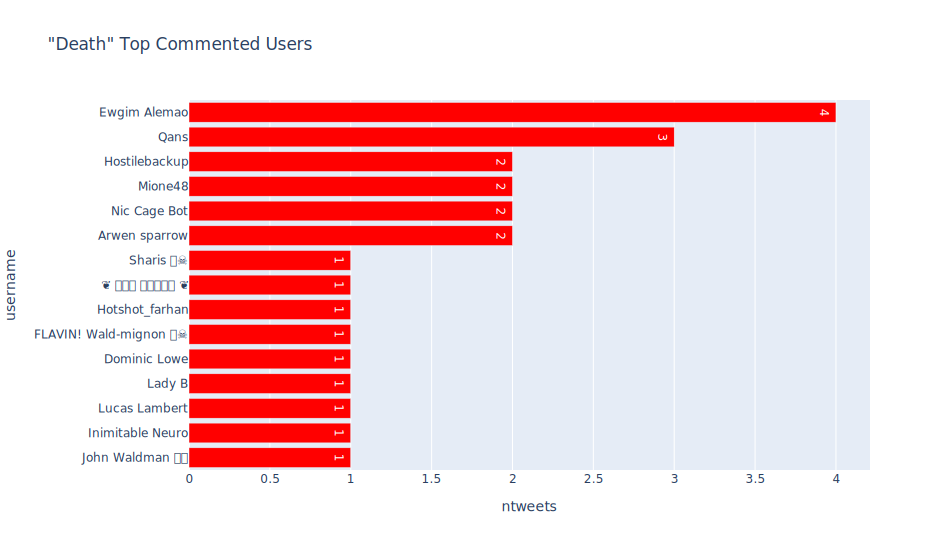

In [69]:
deathto_users = df_deathto.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ntweets'})
helpers.barh(deathto_users.head(15), '"Death" Top Commented Users', threshold=0, c=0)

# Kiss Of Death

In [70]:
df_tweets[df_tweets.text.str.contains('kiss of death')].text.value_counts().head(60)

feminists cherie blair and jess phillips rally behind amber heard https://t.co/m94runyien via https://t.co/yaco4bzjcs\n\nfeel sorry for the girl that will be the kiss of death then                                                                                                      1
@kamalaharris @joebiden congratulations! but please, do not let amber heard use you or that photo of the two of you together anymore! she is the kiss of death. please read up on her!                                                                                                    1
@joebiden please, please vet the people you allow to speak for your campaign! amber heard is a violent domestic abuser! she was arrested for beating her partner in seattle and is currently facing a trial in va. please, mr. vice president...she will be the kiss of death for you!    1
amber heard suing disney to get back over johnny is the kiss of death to you in hollywood. think about this come backs are rare but blacklists are c

In [71]:
# df_tweets[df_tweets.text.str.contains('kiss of death')][['text', 'username', 'created_at']]

In [72]:
print(df_tweets[df_tweets.text.str.contains('kiss of death')].shape)
df_tweets[df_tweets.text.str.contains('kiss of death')]

(4, 23)


created_at                                 profile_banner_url  \
317199 2020-07-19 11:27:50                                                NaN   
393197 2020-08-11 22:23:13  https://pbs.twimg.com/profile_banners/10741894...   
426236 2020-10-01 19:35:32  https://pbs.twimg.com/profile_banners/10741894...   
750843 2021-01-13 22:57:09  https://pbs.twimg.com/profile_banners/15696352...   

                                         user_description       user_location  \
317199                                                NaN                 NaN   
393197  I live to be by the ocean. People fascinate me...  Pacific North West   
426236  I live to be by the ocean. People fascinate me...  Pacific North West   
750843                                                NaN       Farmville, NC   

                                        profile_image_url lang  \
317199  http://abs.twimg.com/sticky/default_profile_im...   en   
393197  http://pbs.twimg.com/profile_images/1109969201...   en   
426236  http://pbs.twimg.com/profile_images/1109969201...   en   
750843  http://pbs.twimg.com/profile_images/1159213119...   en   

                                                     text  n_friends  \
317199  feminists cherie blair and jess phillips rally...        182   
393197  @kamalaharris @joebiden congratulations! but p...         47   
426236  @joebiden please, please vet the people you al...         47   
750843  amber heard suing disney to get back over john...        251   

                    username     user_created_at  ...             tweet_id  \
317199          Howd36261804 2019-04-30 14:37:30  ...  1284812185986899968   
393197        cv@oldcrow1963 2018-12-16 06:28:17  ...  1293312038131732480   
426236        cv@oldcrow1963 2018-12-16 06:28:17  ...  1311751620674215936   
750843  carrie Jackson caton 2013-07-05 03:25:04  ...  1349490698760949765   

        user_screen_name  user_url        date  year month dayofmonth  \
317199     Howd362618041       NaN  2020-07-19  2020   Jul         19   
393197    cvoldcrow19631       NaN  2020-08-11  2020   Aug         11   
426236    cvoldcrow19631       NaN  2020-10-01  2020   Oct          1   
750843      viperess2012       NaN  2021-01-13  2021   Jan         13   

                      diff days_diff  hours_diff  
317199   445 days 20:50:20       445    20:50:20  
393197   604 days 15:54:56       604    15:54:56  
426236   655 days 13:07:15       655    13:07:15  
750843  2749 days 19:32:05      2749    19:32:05  

[4 rows x 23 columns]

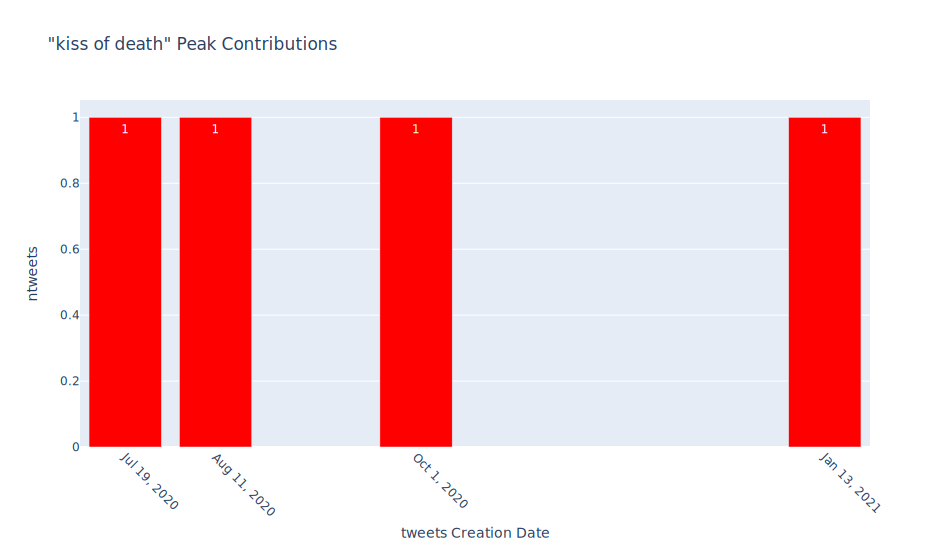

In [73]:
helpers.text_all_peaks(df_tweets, 'kiss of death', n=4, threshold=0)

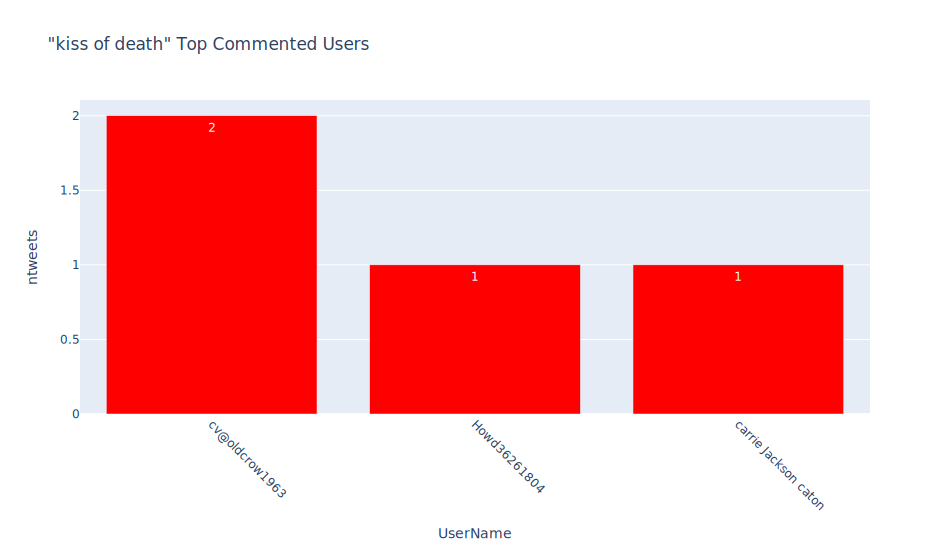

In [74]:
helpers.users_all_peaks(df_tweets, 'kiss of death', n=10, threshold=0)

<a id='die'></a>
>>## Die
> <ul>
 <li><a href="#kill_murder">Kill & Murder</a></li>
 <li><a href="#kill_her">Kill Her</a></li>
 <li><a href="#death">Death</a></li>
 <li><a href="#die"><b>Die</b></a></li>
 </ul>

In [75]:
die_list = {'heard needs to die', 'deserves to die', 'heard die','amber die', 'heard die', 'heard can die', 
       'amber can die', 'you to die', 'hope you die', 'chose to die', 'heard to die', 'mera to die', }

In [76]:
df_die = df_tweets[df_tweets.text.str.contains('|'.join(die_list))]
df_die.text.value_counts().head()

amber heard can die                                                                                                                                                                                                                                                                                   2
@flonashton i was replying to a guy who said that he wanted to sew amber heard die in the dceu and so i replied with this moment in flashpoint paradox, one where wonder woman kills mera                                                                                                             1
@dyangob @gracerandolph the tapes were extremely telling. \n\nlol thininking i was calling for amber heard to die by the hands of a director..... have you read comics or watch the movie?? spoiler alert, wonder woman beheads mera\n\njohnny depp lost his roles, only fit for amber to join him    1
last night i had a dream that amber heard died and when i woke up i never wanted to kill myself more than that v

In [77]:
df = df_die[['created_at', 'days_diff', 'hours_diff', 'text', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True).style.set_properties(**{'text-align': 'left'}))

In [78]:
# df_die

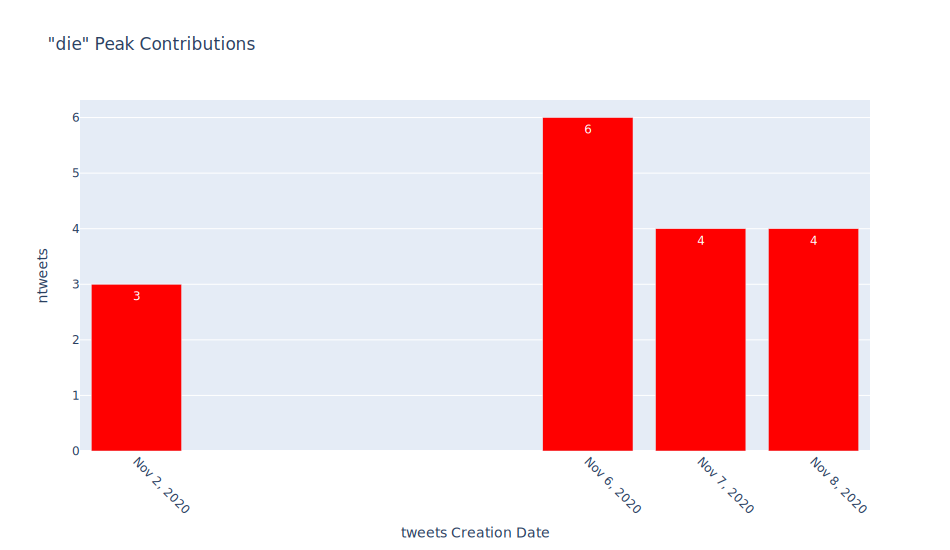

In [79]:
die_dates = df_die.date.value_counts().to_frame().reset_index().rename(columns={'index':'date',
                                                                                  'date':'ntweets'})
helpers.bar_peaks(die_dates.head(4), '"die" Peak Contributions',
                  threshold=0, xlabel='tweets Creation Date')

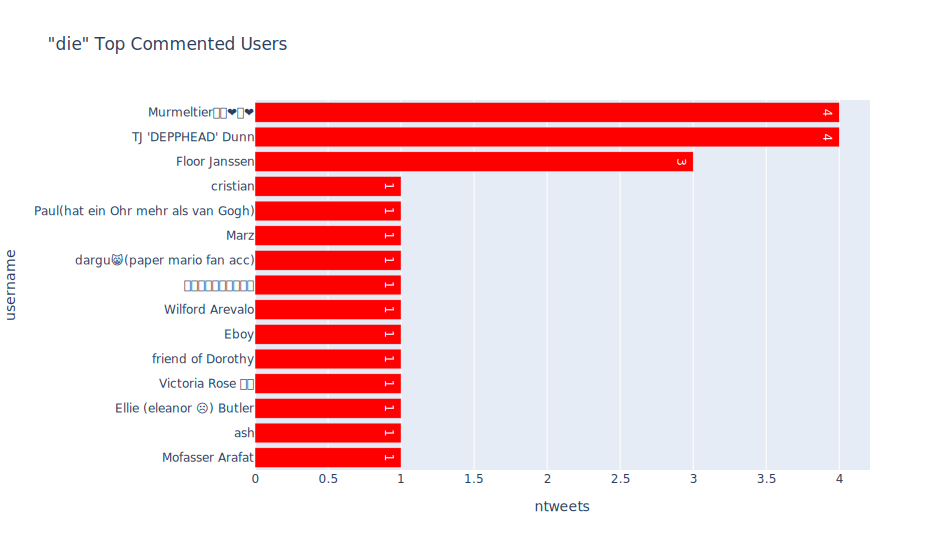

In [80]:
die_users = df_die.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ntweets'})
helpers.barh(die_users.head(15), '"die" Top Commented Users', threshold=0, c=0)

# pay for her crime

In [81]:
df_tweets[df_tweets.text.str.contains('pay for her crime')].shape[0]

25

In [82]:
df_pay = df_tweets[df_tweets.text.str.contains('pay for her crime')]
df_pay.text.value_counts().head()

@thyquaintwench @zoeheriot_ it doesn’t matter if your rich or poor. famous or not. male or female. it doesn’t matter your race or nationality. no body deserves to be treated like that. and everyone deserves justice. and amber heard should pay for her crimes against him and his family and all survivors    1
@winonasrider i mean, i'm a little liberal, but i don't care if amber heard is a woman. she needs to pay for her crimes!                                                                                                                                                                                          1
we don't wish death to ms nobody, what we wish is for her to pay for her crimes, to be held accountable for everything she did against all her victims. we wish for justice, accountability and karma.\n#justiceforjohnnydepp #amberheardisanabuser                                                               1
@ninaharrelsontv keep calling us fans. we, real domestic violence survivors 

In [83]:
df_pay.username.value_counts().head(15)

Eulogia Jean Rojas - Vocalist    2
FadeArgent                       1
Maya                             1
res ipsa wald-mignon, savvy?     1
이 다나 🏴‍☠️                        1
Slim Charles                     1
Alyssa Hale                      1
Unironically Minnesotan          1
Jason Worth                      1
haley 🦋                          1
Mercyfirst0                      1
r.                               1
Tamiko Epting                    1
Shesus                           1
Suzanne                          1
Name: username, dtype: int64

In [84]:
df = df_pay[['created_at', 'days_diff', 'hours_diff', 'text', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True).style.set_properties(**{'text-align': 'left'}))

In [85]:
print(df_pay.shape)
df_pay.head(1)

(25, 23)


created_at                                 profile_banner_url  \
53905 2019-03-03 22:25:32  https://pbs.twimg.com/profile_banners/10250653...   

                                        user_description user_location  \
53905  Whatever you do in life, surround yourself wit...           NaN   

                                       profile_image_url lang  \
53905  http://pbs.twimg.com/profile_images/1025829199...   en   

                                                    text  n_friends  \
53905  @thyquaintwench @zoeheriot_ it doesn’t matter ...        171   

         username     user_created_at  ...             tweet_id  \
53905  FadeArgent 2018-08-02 17:06:39  ...  1102334217432850432   

       user_screen_name  user_url        date  year month dayofmonth  \
53905         Fade19851       NaN  2019-03-03  2019   Mar          3   

                    diff days_diff  hours_diff  
53905  213 days 05:18:53       213    05:18:53  

[1 rows x 23 columns]

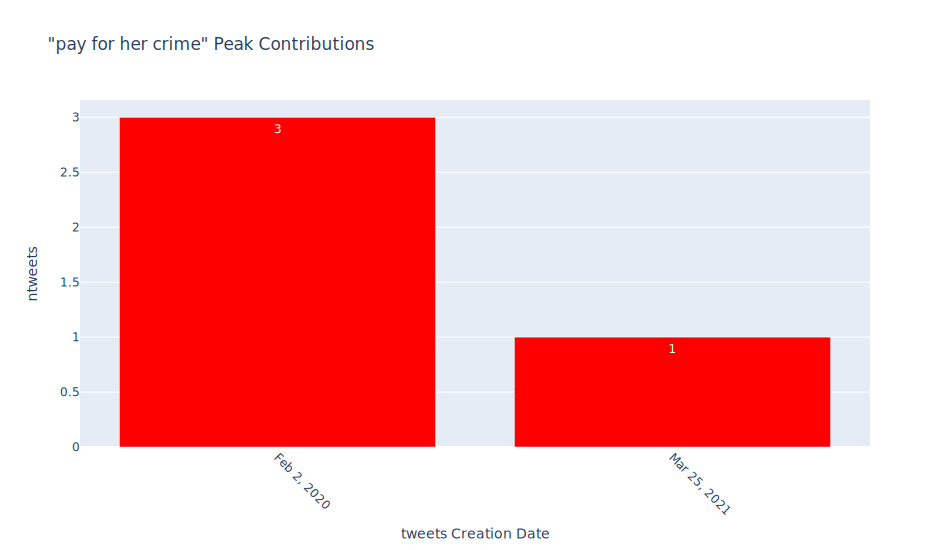

In [86]:
helpers.text_all_peaks(df_pay, 'pay for her crime', n=2, threshold=0)

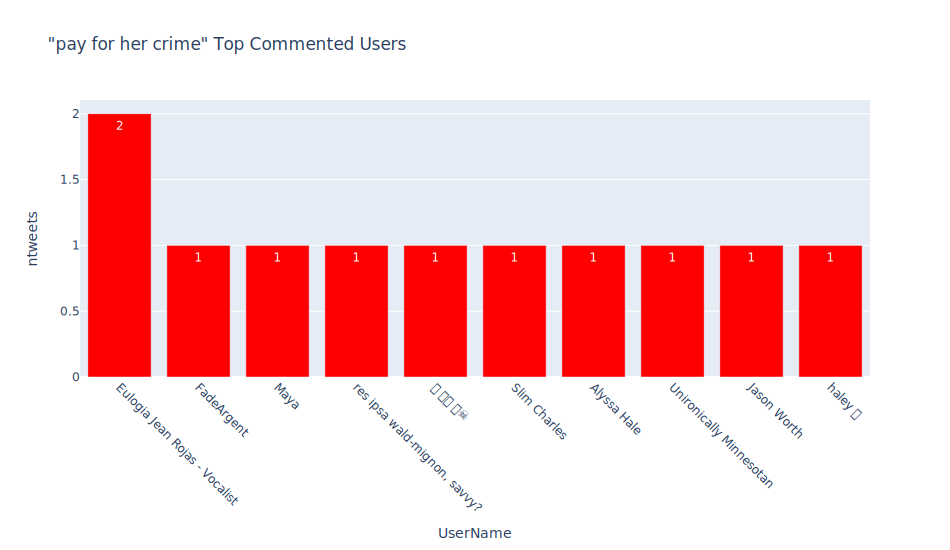

In [87]:
helpers.users_all_peaks(df_pay, 'pay for her crime', n=10, threshold=0)

<a id='hell_burn'></a>
>>## Hell & Burn
> <ul>
 <li><a href="#kill_death">Kill & Death</a></li>
 <li><a href="#kill_death_more">Kill & Death (More Investigations)</a></li>
 <li><a href="#hell_burn"><b>Hell & Burn</b></a></li>
 <li><a href="#crime_jail">Crime & Jail</a></li>
 <li><a href="#all_threat">All Threat</a></li>
 <li><a href="#threat_users">Threat Users Contributions</a></li>
 </ul>

In [88]:
burn_sub =  {'rots in', 'burn amber', 'burns in', 'burn in', 'burn the witch', 'burn the hell', 'burn the devil', 
             'deserves burned in', 'should be burned in', 'in hell', '#burninhellambitch', 
             '#amberhearddeservestoburninhell', '#amberheadrotinhell', '#rotinhellamber', '#amberheardgotohell', 
             '#gotohellamber', '#amberheardgoingtohell', '#tohellwithamber', 'deserves hell', 'going to hell', 
             'go to hell', 'goes to hell', 'to hell with her', "to hell with amber", 'go straight to hell', 
             'pits of hell', 'pit of hell', 'parts of hell', 'depths of hell', 'level of hell', 'levels of hell',
             'circle of hell'}

In [89]:
df_burn_sub = df_threat[df_threat.text.str.contains('|'.join(burn_sub))]
print(f'{df_burn_sub.shape[0]} contributions, made by {df_burn_sub.username.nunique()} Users')
df_burn_sub.head(1)

991 contributions, made by 928 Users


created_at                                 profile_banner_url  \
5746 2018-04-28 06:38:14  https://pbs.twimg.com/profile_banners/98778287...   

                        user_description user_location  \
5746  stars can't shine without darkness           NaN   

                                      profile_image_url lang  \
5746  http://pbs.twimg.com/profile_images/1030772994...   en   

                                                 text  n_friends username  \
5746  there's a special place in hell for amber heard        128     nika   

         user_created_at  ...            tweet_id  user_screen_name  user_url  \
5746 2018-04-21 19:59:24  ...  990117969631072256    hoisthecolours       NaN   

            date  year month dayofmonth             diff days_diff  hours_diff  
5746  2018-04-28  2018   Apr         28  6 days 10:38:50         6    10:38:50  

[1 rows x 23 columns]

### A Heat Map for the "Hell & Burn" tweets (ALL)

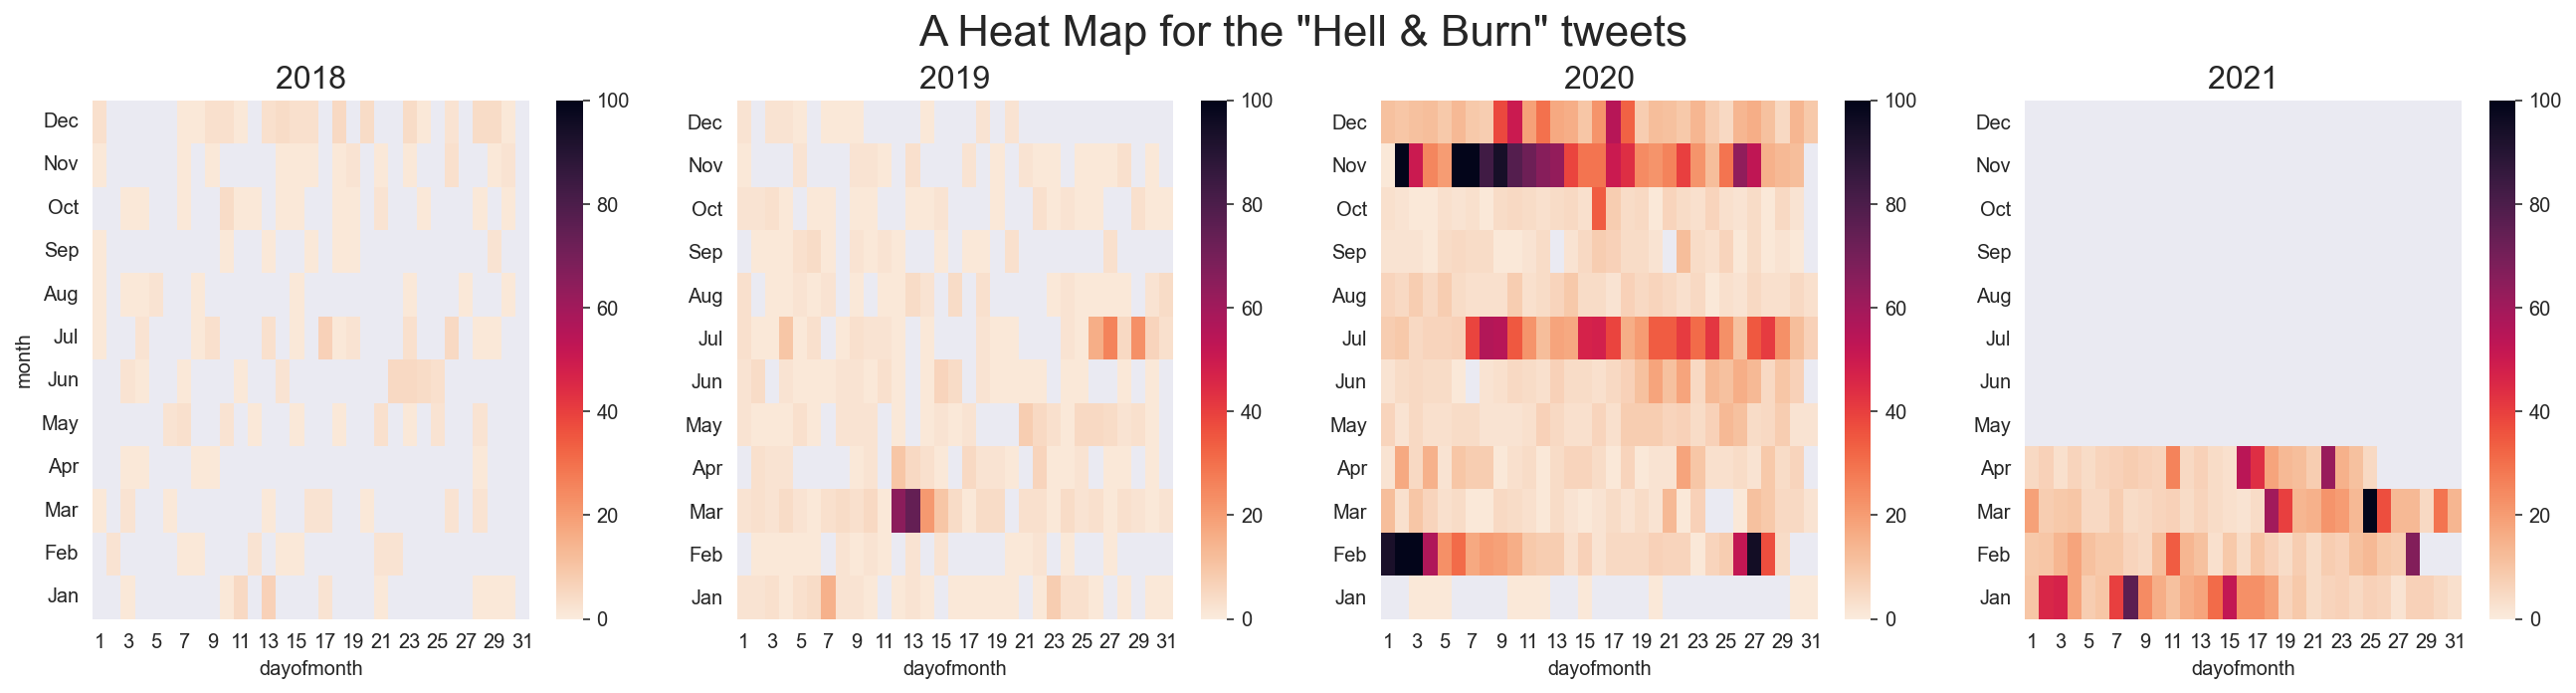

In [90]:
burn_daily = df_burn.groupby(['year', 'dayofmonth', 'month']).size().reset_index(name='ntweets')

title = 'A Heat Map for the "Hell & Burn" tweets'
helpers.facet_heat(burn_daily, title, n_col=4, vmax=100)

### "Hell & Burn" tweets Peak Dates (ALL)

In [91]:
burn_dates = df_burn.groupby(['date']).agg({'text':'count', 'user_id': 'count'}).reset_index(
).rename(columns={'text':'ntweets', 'user_id': 'n_users'}).sort_values('ntweets', ascending=False)

burn_dates.head(15)

date  ntweets  n_users
379  2020-02-02      596      596
647  2020-11-02      262      262
651  2020-11-06      235      235
652  2020-11-07      182      182
380  2020-02-03      166      166
790  2021-03-25      121      121
404  2020-02-27       95       95
654  2020-11-09       94       94
378  2020-02-01       93       93
653  2020-11-08       83       83
655  2020-11-10       78       78
714  2021-01-08       76       76
178  2019-03-13       74       74
656  2020-11-11       72       72
765  2021-02-28       67       67

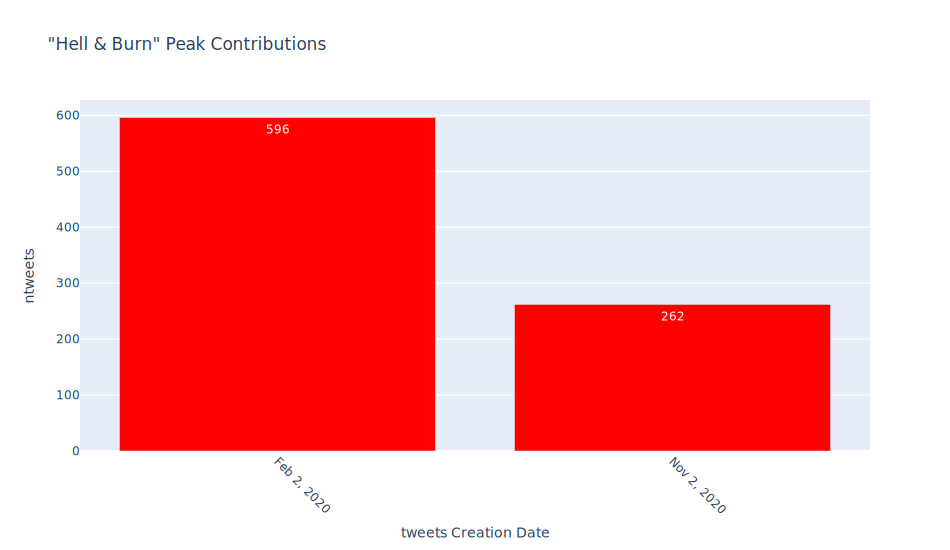

In [92]:
burn_dates = df_burn.date.value_counts().to_frame().reset_index().rename(columns={'index':'date',
                                                                                  'date':'ntweets'})
helpers.bar_peaks(burn_dates.head(2), '"Hell & Burn" Peak Contributions',
                  threshold=0, xlabel='tweets Creation Date')

# Most Repeated "Hell & Burn" tweets

In [93]:
df_burn_sub.text.value_counts().head()

i hope amber heard rots in hell                    7
amber heard can rot in hell                        4
amber heard can rot in hell.                       3
there’s a special place in hell for amber heard    3
there's a special place in hell for amber heard    2
Name: text, dtype: int64

In [94]:
df = df_burn_sub[['created_at', 'days_diff', 'hours_diff', 'text', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True).style.set_properties(**{'text-align': 'left'}))

<br>

# Top Users Commented with "Hell & Burn" keywords

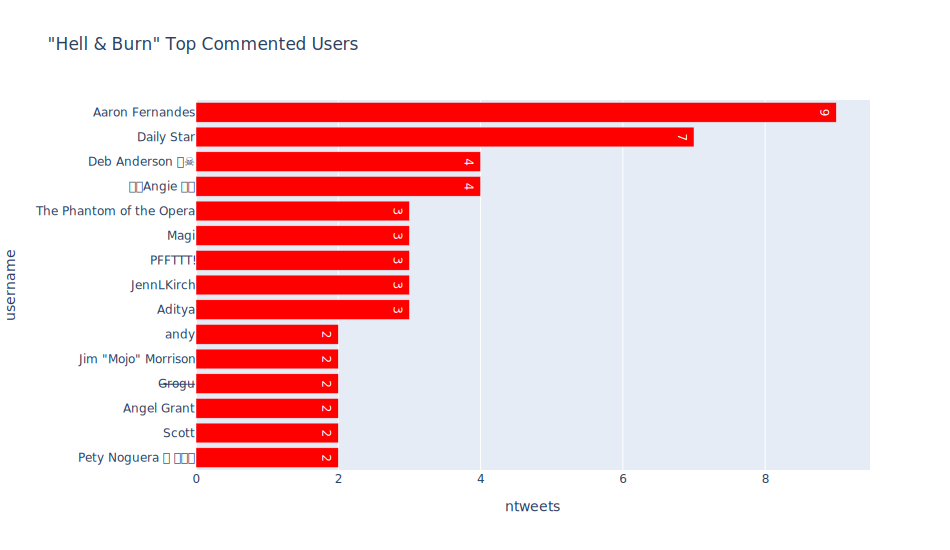

In [95]:
burn_users = df_burn_sub.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ntweets'})
helpers.barh(burn_users.head(15), '"Hell & Burn" Top Commented Users', threshold=0, c=0)

In [96]:
set_burn_users = set(burn_users.username.head(15))

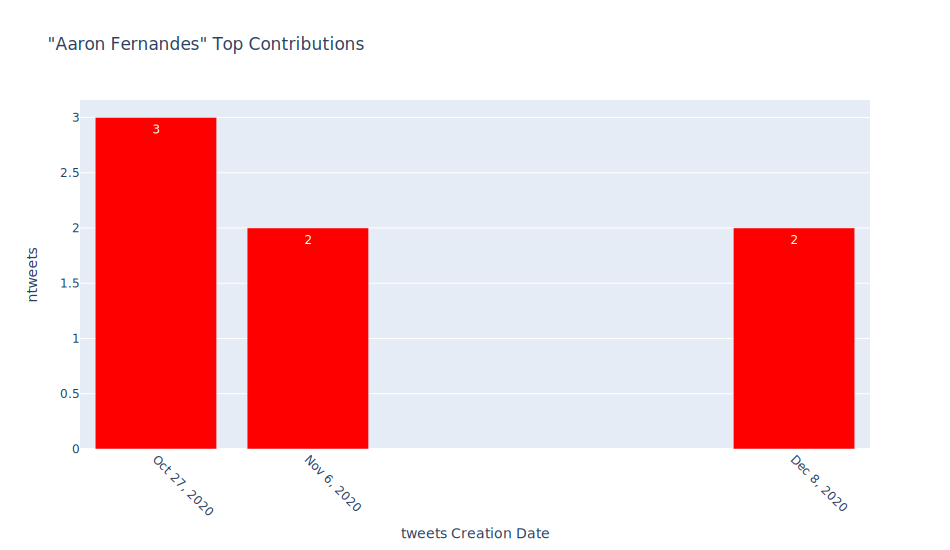

In [97]:
helpers.contr_peaks(df_tweets, "Aaron Fernandes", n=3, threshold=0)

In [98]:
df_threat.query(" username == 'Aaron Fernandes' ").text.value_counts().head()

elon musk and amber heard split! https://t.co/wdvkbemblo #amberheard #elonmusk #paypal https://t.co/hx4cdlxkcv                                                                 1
elon musk and amber heard split! https://t.co/wdvkbemblo #amberheard #elonmusk #paypal https://t.co/wfvoielcqa                                                                 1
let's burn amber: violent johnny depp threatens to "burn" and "drown" ex-wife amber heard! https://t.co/eg4flocdo6 #amberheard #johnnydepp #violent https://t.co/m1hmpa9cpj    1
let's burn amber: violent johnny depp threatens to "burn" and "drown" ex-wife amber heard! https://t.co/ifjiga74ba #amberheard #johnnydepp #violent https://t.co/d3swd3zscz    1
let's burn amber: violent johnny depp threatens to "burn" and "drown" ex-wife amber heard! https://t.co/ifjiga74ba #amberheard #johnnydepp #violent https://t.co/ni9xxspqrn    1
Name: text, dtype: int64

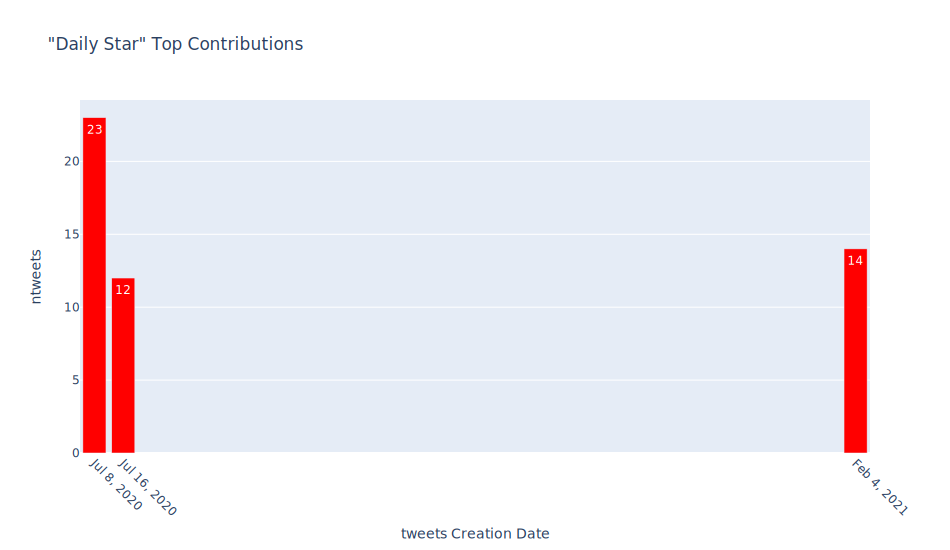

In [99]:
helpers.contr_peaks(df_tweets, "Daily Star", n=3, threshold=0)

In [100]:
df_threat.query(" username == 'Daily Star' ").text.value_counts().head()

johnny depp also exchanged messages with actor pal paul bettany about 'burning amber heard as a witch' https://t.co/hpjtgy4eof    1
johnny depp said he wanted to 'drown and burn amber heard then f*** corpse' in texts to pal\nhttps://t.co/jgqwuenmgw              1
amber heard was 'warned johnny depp might kill her by accident'\nhttps://t.co/j0k3w8uply https://t.co/kq5ffl1rxc                  1
amber heard was 'warned johnny depp might kill her by accident'\nhttps://t.co/j0k3w8uply https://t.co/2ksdccfusg                  1
amber heard was 'warned johnny depp might kill her by accident'\nhttps://t.co/j0k3w9cqk8 https://t.co/kwzh8hirju                  1
Name: text, dtype: int64

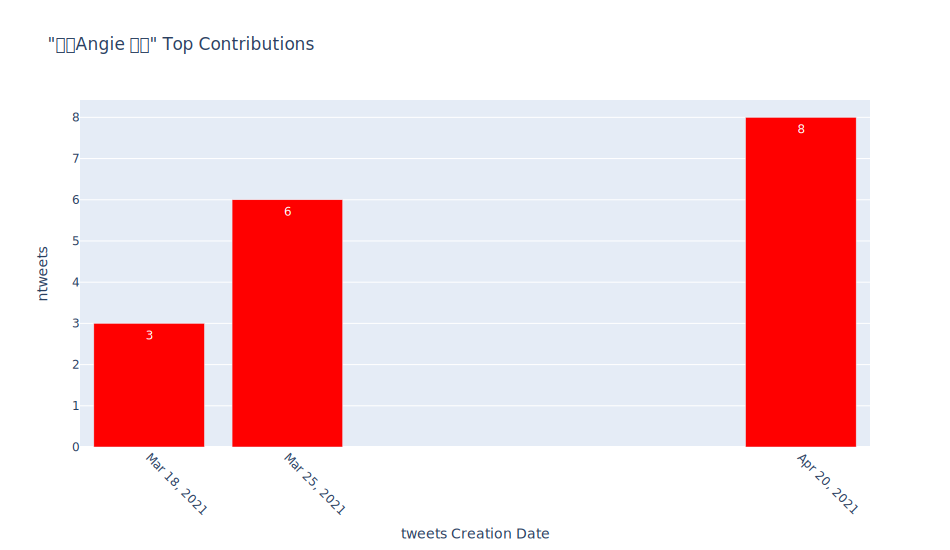

In [101]:
helpers.contr_peaks(df_tweets, "🦋💀Angie 🦋💀", n=3, threshold=0)

In [102]:
df_threat.query(" username == '🦋💀Angie 🦋💀' ").text.value_counts().head()

@isle_queen @originalspin and don't forget, police were called and they found no evidence of abuse by johnny. johnny hasn't been arrested nor has he been convicted of any crime. but hey, let's all believe known liar amber heard. 🤷‍♀️    1
@berniewrites so you're on amber heard's payroll huh? explains a lot. johnny depp fans have more proof about his innocence than you think. leave them and johnny alone.                                                                      1
i just threw up, amber heard makes me so fucking ill and i never want to hear a bad word against johnny depp ever again.\nthere's a special place in hell for amber heard.                                                                   1
i cannot relate to people who are listing aquaman as the sexiest movie of the decade. #amberheardisanabuser. she isn't hot. stop excusing her crimes just because you think she's sexy.                                                      1
amber heard facing jail time is music to my 

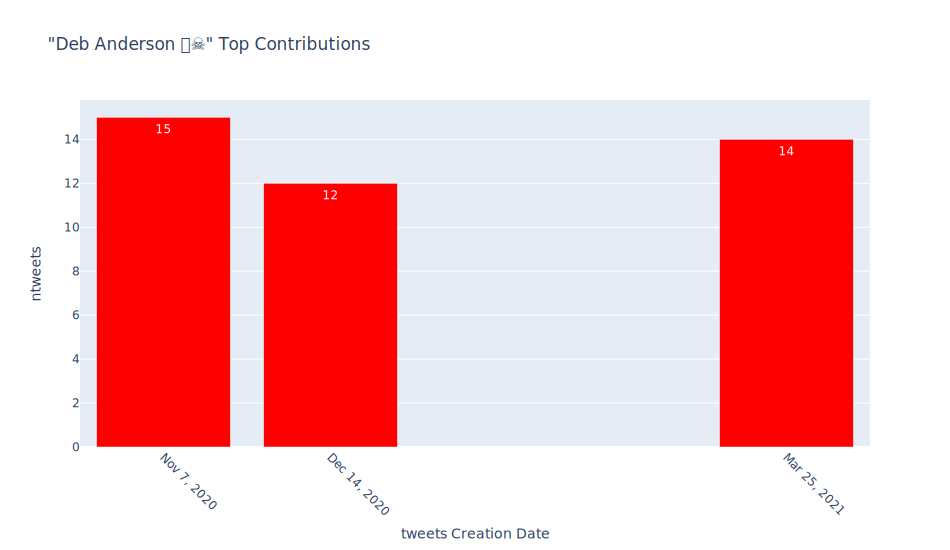

In [103]:
helpers.contr_peaks(df_tweets, "Deb Anderson 🏴‍☠️", n=3, threshold=0)

In [104]:
df_threat.query(" username == 'Deb Anderson 🏴‍☠️' ").text.value_counts().head()

@theinfamousone6 trivia from "what's eating gilbert grape?" does this sound like a "wife-beater" to you? this sweet man deserves justice. and a huge apology. #justiceforjohnnydepp https://t.co/yp0zhs8ib4                                                                                                           1
@isuckatbeingag1 ah showed johnny a tissue with red on it. "look what you did!!" johnny later retrieved it from trash and discovered it was red nail polish, not blood. he kept it for evidence.\n\n#justiceforjohnnydepp \n#amberheardisanabuser \n#amberheardisaliar \n#johnnydeppdeservesjustice                   1
@smb3 @lepplady @theinfamousone6 for me, it's gone beyond simply remove amber heard from aquaman2. i'd sign one to remove amber heard. period. she deserves to have her whole "career" taken away. movies. endorsements. speaking engagements. everything. otherwise there is no justice. aquashit2 isn't enough.     1
@noctrnlvalkyrie @qsbrother1 and you'd think, being an "actress"

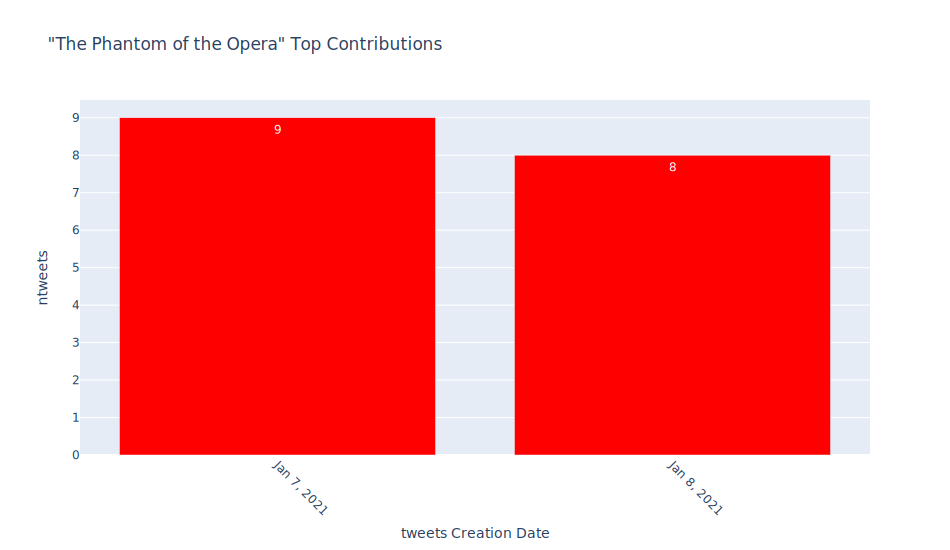

In [105]:
helpers.contr_peaks(df_tweets, "The Phantom of the Opera", n=2, threshold=0)

In [106]:
df_threat.query(" username == 'The Phantom of the Opera' ").text.value_counts().head()

#wejustdontlikeyouamberheard because you are a lying creature, unable to admit your mistakes and hiding behind other people's backs. you let a lot of people down and all this scandal is your fault. you don't deserve our love and compassion.\n#justiceforjohnnydepp                       1
this woman is the real embodiment of evil! she must be punished for all her actions and years of lying, cause of which sick children suffered! and this woman we call "woman of the year"?? hypocrisy and a disgrace!\n#amberheardisaliar\n#amberheardisafraud\n#justiceforjohnnydepp         1
@realamberheard look at the ppl who really help, who have a conscience and a heart. doesn't it bother you that other ppl are paying for your lies? you're so disgusting..\n#amberheardisaliar\n#justiceforjohnnydepp\n#amberheardisagolddigger                                                1
apologize for the fact that she abused him for several years, cut off his finger, and then slandered him to the whole world? go to hell!

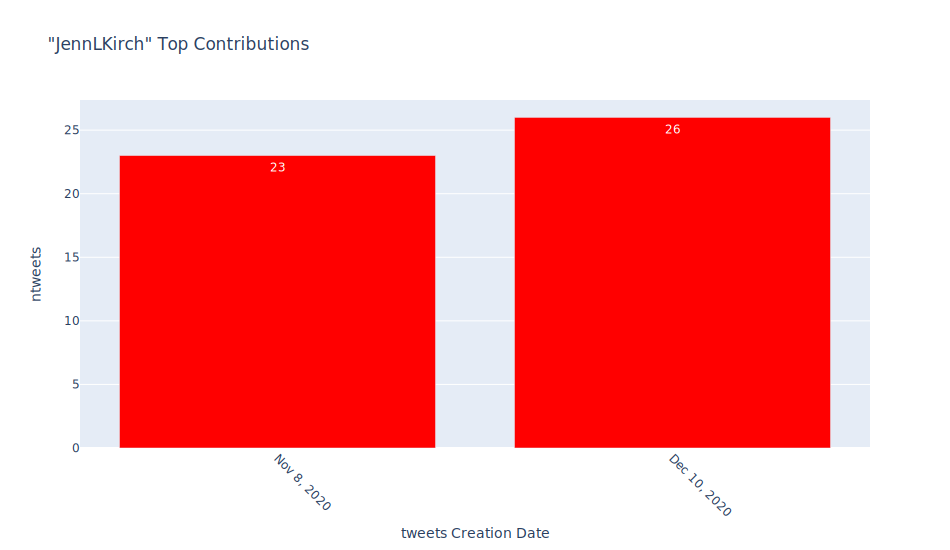

In [107]:
helpers.contr_peaks(df_tweets, "JennLKirch", n=2, threshold=0)

In [108]:
df_threat.query(" username == 'JennLKirch' ").text.value_counts().head()

@andykrolock this wasn't a criminal case. some seem to forget that fact. this was a case that will now let "rags" get away with printing whatever they want with no repercussions. #justiceforjohnnydepp    1
@thenamesq lol yeah, but we are intelligent "bots". they kill me. 🤣🤣🤪🤪🤣🤣#justiceforjohnnydepp                                                                                                               1
@laurabockov @mygrindelwald 💔💔💔 there is a special place in hell for ah, or any woman who pulls these stunts on their "love". #justiceforjohnnydepp                                                         1
@johnnyhellodepp so true, mary! #justiceforjohnnydepp                                                                                                                                                       1
@0gre3f lol...they really are ridiculous! 1) i have admitted to being middle-aged and weird, 2) would a "bot" do that? i think not! they kill me. 🤣🤣  #notabot #justiceforjohnny

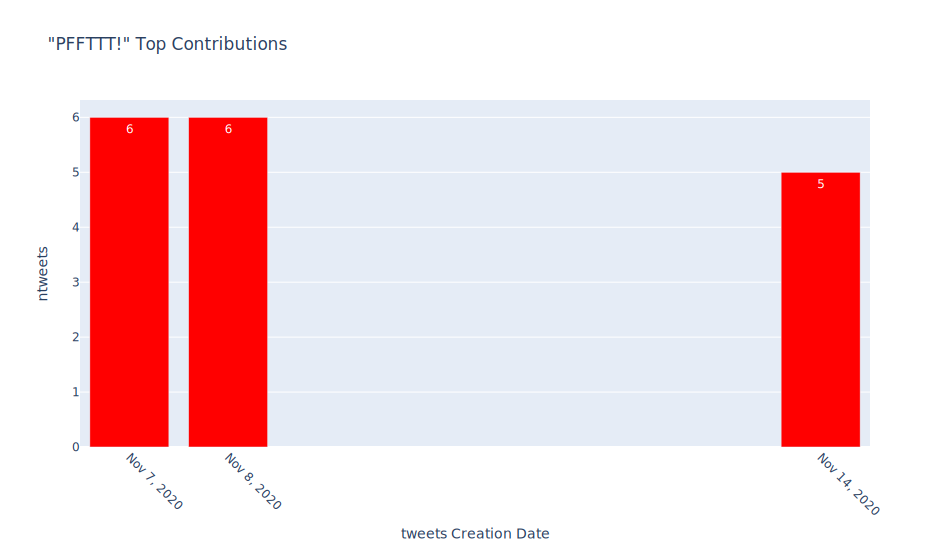

In [109]:
helpers.contr_peaks(df_tweets, "PFFTTT!", n=3, threshold=0)

In [110]:
df_threat.query(" username == 'PFFTTT!' ").text.value_counts().head()

#justiceforjohnnydepp\nwe gotta rise, let's rise above the lies\nit's you and i, it's do or die\nwe gotta rise, let's rise above the lies\n\nhollywood vampires "rise"                                                                                                            1
#justiceforjohnnydepp\nmy gift to you, my new threat\nall for you and no one else\nmy gift to you, my new threat\nmind games, fake blame, mom's dead...more pain\n\nhollywood vampires "new threat"                                                                               1
@thr how much is amber heard paying you to write this crap? if you took even 5 min. of time for research you would know that jd was posting from his island and it was announced days before he would not be at the festival due to covid.                                        1
#justiceforjohnnydepp  ah: "i was never given nor wanted the burden of dependency."  i only wanted jd's three penthouse apartments &amp; range rover with him paying all  ut

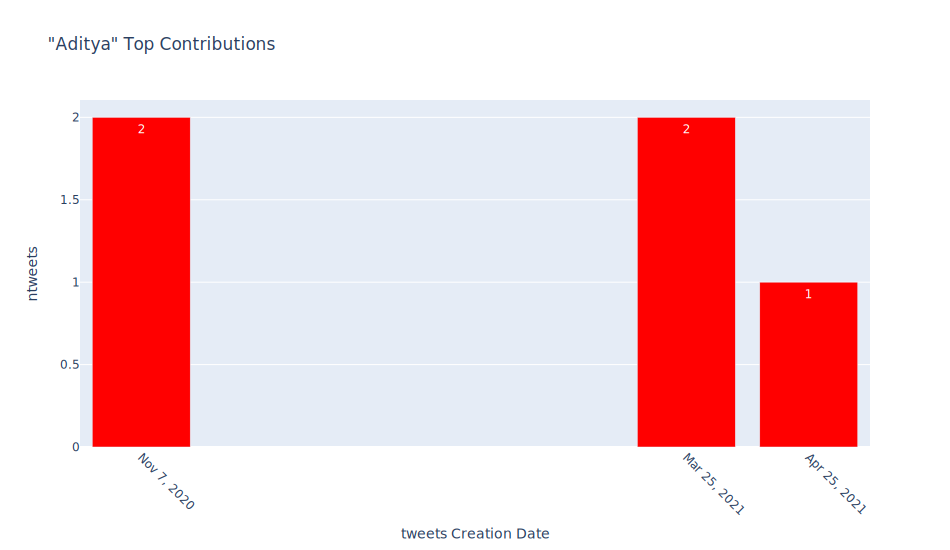

In [111]:
helpers.contr_peaks(df_tweets, "Aditya", n=3, threshold=0)

In [112]:
df_threat.query(" username == 'Aditya' ").text.value_counts().head()

okk so warner bros think they have removed jhonny depp hahaa\nlisten guys you all lost a gem and you are no more worth of it....go to hell😏\n#justiceforjohnnydepp                                                                                                               1
if y'all make this into another johnny depp-amber heard thing, and brad loses his career over nothing just because the "people decided", i swear i will pray to god every morning that all these cancel culture cunts suffer the most painful tortures when they are in hell.    1
i wish amber heard a very torturous and painful afterlife in hell.                                                                                                                                                                                                               1
Name: text, dtype: int64

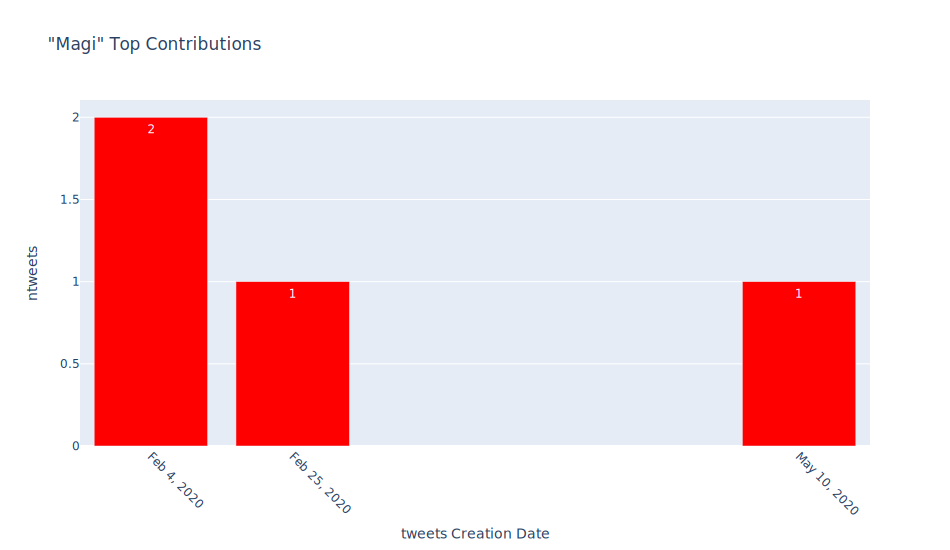

In [113]:
helpers.contr_peaks(df_tweets, "Magi", n=3, threshold=0)

In [114]:
df_threat.query(" username == 'Magi' ").text.value_counts().head()

go to hell, shit amber...🤮🤮🤮🤮🤮 burn in hell\n#justiceforjohnnydep\n\ndc entertainment: remove amber heard from aquaman 2 - ¡firma la petición! https://t.co/zwrv4kalou от @change_es                                                                            1
please sign! let the bitch pay for causing this to johnny and generating untrust in actual victims of violence with her lies! \n@realamberheard  go to hell!!!!\n#justiceforjohnnydepp https://t.co/kskivlhtdp                                                  1
@deppsamarrx @winonasrider johnny is such a sweetheart ❤️❤️❤️❤️ that vampire has to pay! @realamberheard 🤮🤮 again, i hope you go to hell!\n#theworldwithdepp #justiceforjohnnydepp                                                                              1
harvey weinstein in jail! excellent work 🙏♥️ now it's amber's turn 🙏🙏🙏🙏🙏 @realamberheard for discrediting actual victims.. go to jail first and after that hell is waiting for you... you are a big nature's mistake! @realamberhe

<br>

<a id='crime_jail'></a>
>>## Crime & Jail
> <ul>
 <li><a href="#kill_death">Kill & Death</a></li>
 <li><a href="#kill_death_more">Kill & Death (More Investigations)</a></li>
 <li><a href="#hell_burn">Hell & Burn</a></li>
 <li><a href="#crime_jail"><b>Crime & Jail</b></a></li>
 <li><a href="#all_threat">All Threat</a></li>
 <li><a href="#threat_users">Threat Users Contributions</a></li>
 </ul>

In [115]:
crime_sub = {'criminal', 'her crime', 'deserve lethal punish', 'be punished', 'deserves every punishment', 
             'punish her', 'her punish', 'punish amber', 'punish the abuser', 'heard being punished', 
             'been punished', 'jail', 'prison', 'heard deserve', 'abuser deserve', 'she deserve', 
             'what you deserve', 'karma'}

In [116]:
df_crime_sub =df_threat[df_threat.text.str.contains('|'.join(crime_sub))]
print(f'{df_crime_sub.shape[0]} contributions, made by {df_crime_sub.username.nunique()} Users')
df_crime_sub.head(1)

9978 contributions, made by 7035 Users


created_at profile_banner_url user_description user_location  \
591 2018-01-08 17:58:57                NaN              NaN           NaN   

                                     profile_image_url lang  \
591  http://pbs.twimg.com/profile_images/8815105094...   en   

                                                  text  n_friends  username  \
591  @iolovesyou @angb2909 video? you mean the one ...        108  goodview   

        user_created_at  ...            tweet_id  user_screen_name  user_url  \
591 2017-06-26 17:20:36  ...  950426613446991872       meanchi0421       NaN   

           date  year month dayofmonth               diff days_diff  \
591  2018-01-08  2018   Jan          8  196 days 00:38:21       196   

     hours_diff  
591    00:38:21  

[1 rows x 23 columns]

### A Heat Map for the "Crime & Jail" tweets (ALL)

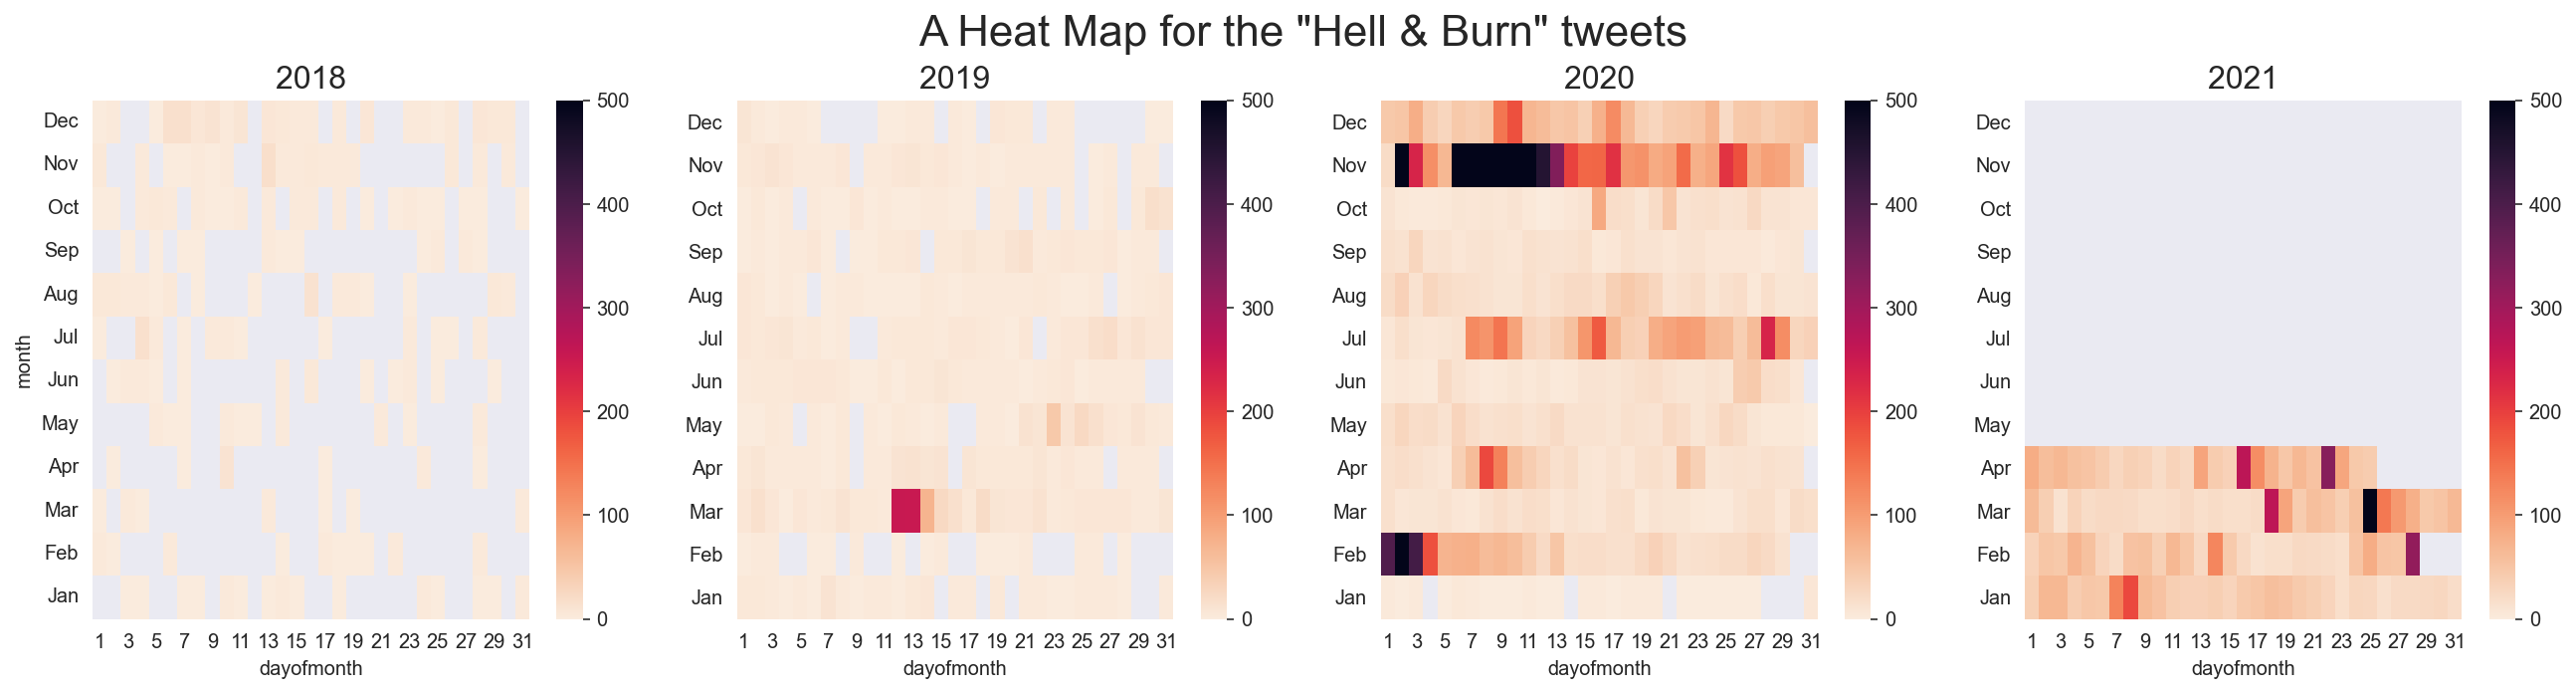

In [117]:
crime_daily = df_crime.groupby(['year', 'dayofmonth', 'month']).size().reset_index(name='ntweets')

title = 'A Heat Map for the "Hell & Burn" tweets'
helpers.facet_heat(crime_daily, title, n_col=4, vmax=500)

### "Crime & Jail" tweets Peak Dates (ALL)

In [118]:
crime_dates = df_crime.groupby(['date']).agg({'text':'count', 'user_id': 'count'}).reset_index(
).rename(columns={'text':'ntweets', 'user_id': 'n_users'}).sort_values('ntweets', ascending=False)

crime_dates.head(15)

date  ntweets  n_users
496  2020-02-02     2007     2007
774  2020-11-06     1058     1058
775  2020-11-07      957      957
770  2020-11-02      905      905
779  2020-11-11      675      675
778  2020-11-10      612      612
913  2021-03-25      563      563
777  2020-11-09      550      550
776  2020-11-08      519      519
780  2020-11-12      453      453
497  2020-02-03      412      412
495  2020-02-01      396      396
781  2020-11-13      336      336
941  2021-04-22      329      329
888  2021-02-28      317      317

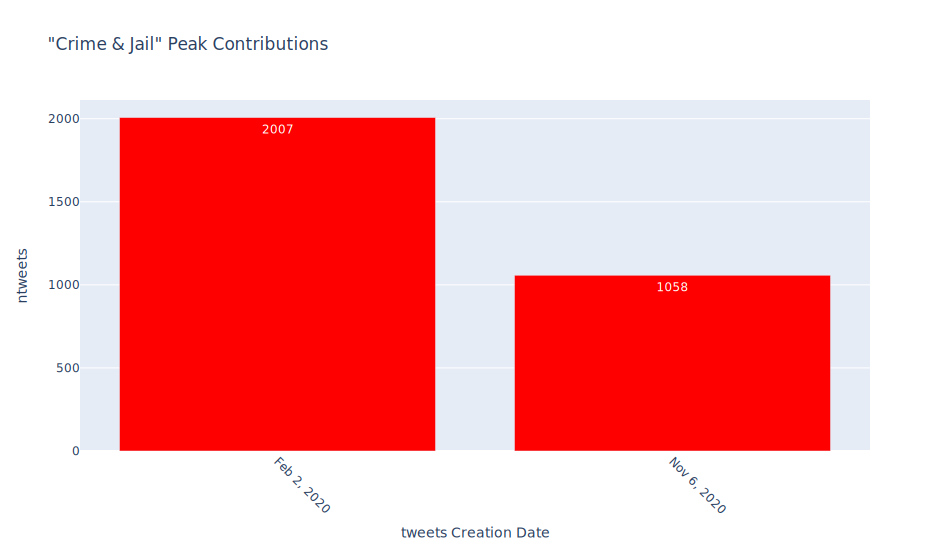

In [119]:
crime_dates = df_crime.date.value_counts().to_frame().reset_index().rename(columns={'index':'date',
                                                                                  'date':'ntweets'})
helpers.bar_peaks(crime_dates.head(2), '"Crime & Jail" Peak Contributions',
                  threshold=0, xlabel='tweets Creation Date')

# Most Repeated "Crime & Jail" tweets

In [120]:
df_crime_sub.text.value_counts().head(10)

@realamberheard @realamberheard jail for amber heard! justice for johnny @marvel @marvelsupport #justiceforjohnny #amberheardisanabuser #amberheardisaliar #amberheardoutofaquaman                                                                                         22
@realamberheard @realamberheard jail for amber heard! justice for johnny @marvel @marvelsupport #justiceforjohnnyf #amberheardisanabuser #amberheardisaliar #amberheardoutofaquaman                                                                                        16
amber heard should be in jail                                                                                                                                                                                                                                              11
@realamberheard i really hope you get what you deserve.\n#justiceforjohnnydepp                                                                                                                

In [121]:
df = df_crime_sub[['created_at', 'days_diff', 'hours_diff', 'text', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True).style.set_properties(**{'text-align': 'left'}))

<br>

# Top Users Commented with "Crime & Jail" keywords

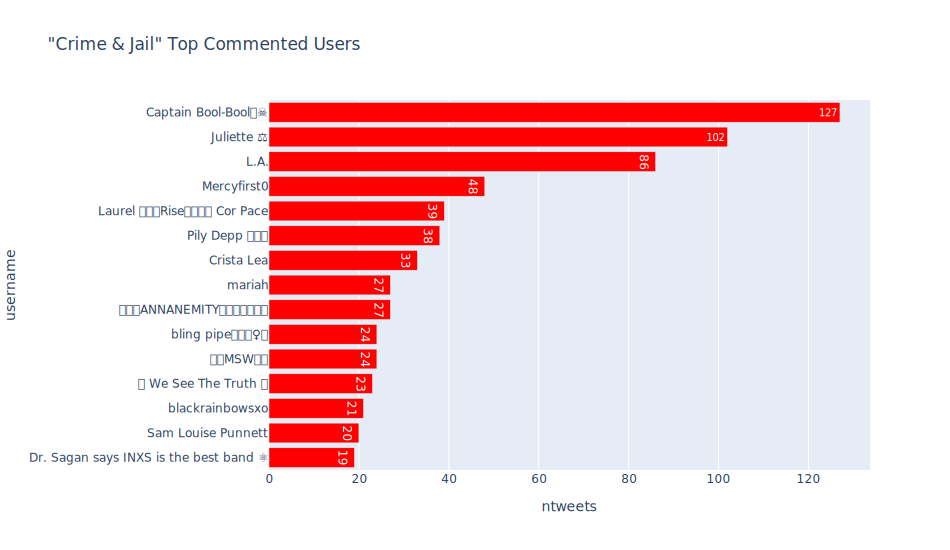

In [122]:
crime_users = df_crime_sub.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ntweets'})
helpers.barh(crime_users.head(15), '"Crime & Jail" Top Commented Users', threshold=0, c=0)

> All the users are investigated in the threat users below 

In [123]:
set_crime_users = set(crime_users.username.head(15))

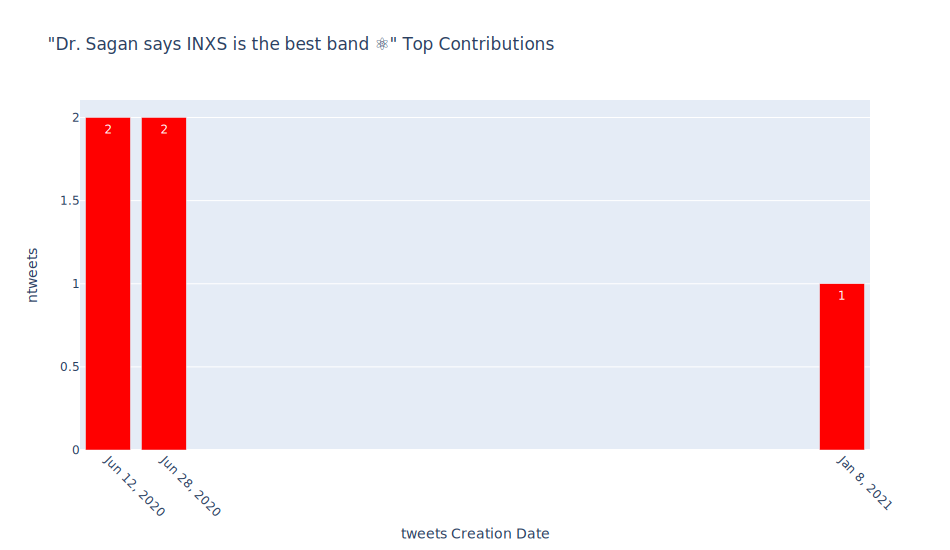

In [124]:
helpers.contr_peaks(df_tweets, "Dr. Sagan says INXS is the best band ⚛️", n=3, threshold=0)

In [125]:
df_threat.query(" username == 'Dr. Sagan says INXS is the best band ⚛️' ").text.value_counts().head()

today is a new day. amber heard should be in prison. thanks for coming to my ted talk.    1
amber heard needs to report to prison. turn yourself in she-devil.                        1
@belladonnamerie it’s january 4th, 2021, and amber heard should be in prison.             1
it’s december 31st, and amber heard should be in prison.                                  1
it’s november 8th, and amber heard should be in prison.                                   1
Name: text, dtype: int64

<br>

<a id='all_threat'></a>
>>## All Threat 
> <ul>
 <li><a href="#kill_death">Kill & Death</a></li>
 <li><a href="#kill_death_more">Kill & Death (More Investigations)</a></li>
 <li><a href="#hell_burn">Hell & Burn</a></li>
 <li><a href="#crime_jail">Crime & Jail</a></li>
 <li><a href="#all_threat"><b>All Threat</b></a></li>
 <li><a href="#threat_users">Threat Users Contributions</a></li>
 </ul>

### We will use only specific keywords to filter only threat tweets 
This get only about one-third of the previous keywords counts (But More Accurate Results)

In [126]:
threat_sub = {'#amberheadrotinhell', '#amberhearddeservestoburninhell', '#amberheardgoingtohell', 
              '#amberheardgotohell', '#burninhellambitch', '#gotohellamber', '#rotinhellamber', '#tohellwithamber',
              'abuser deserve', 'accused amber heard of murder', 'amber can die', 'amber die', 'be punished', 
              'been punished', 'burn amber', 'burn in', 'burn the devil', 'burn the hell', 'burn the witch', 
              'burned to death', 'burns in', 'chose to die', 'circle of hell', 'criminal', 'death to', 'deathto',
              'depths of hell', 'deserve lethal punish', 'deserves burned in', 'deserves every punishment', 
              'deserves hell', 'deserves to die', 'die a painful death', 'get the karma you deserve', 'go kill',
              'go straight to hell', 'go to hell', 'goes to hell', 'going to hell', 'heard being punished', 
              'heard can die', 'heard deserve', 'heard die', 'heard murdered', 'heard needs to die', 
              'heard to die', 'her crime', 'her punish', 'hope you die', 'in hell', 'it will kill you', 
              'i’ll kill you', 'jail', 'karma', 'kill amber', 'kill that bitch', 'kill that cunt', 
              'kill that princess', 'kill this amber', 'kill this bitch', 'kill this vampire', 
              'kill your fucking abuser', 'killamber', 'legal to murder amber', 'level of hell', 'levels of hell',
              'like to murder amber', 'mera to die', 'parts of hell', 'pit of hell', 'pits of hell', 
              'please murder amber', 'prison', 'punish amber', 'punish her', 'punish the abuser', 'rots in', 
              'rots to death', 'she deserve', 'should be burned in', 'starves herself to death', 
              'to hell with amber', 'to hell with her', 'what you deserve', 'will murder amber', 'you to die'}

In [127]:
df_threat_sub = df_tweets[df_tweets.text.str.contains('|'.join(threat_sub))]
df_threat_sub.shape[0]

16473

In [128]:
# exclude all the users with positive tweets
df_threat_sub = df_threat_sub[~df_threat_sub.username.isin(remove_users)]
print(f'{df_threat_sub.shape[0]} contributions, made by {df_threat_sub.username.nunique()} Users')
df_threat_sub.head(2)


11071 contributions, made by 7854 Users


created_at                                 profile_banner_url  \
591 2018-01-08 17:58:57                                                NaN   
802 2018-01-10 14:05:23  https://pbs.twimg.com/profile_banners/17424031...   

                                      user_description user_location  \
591                                                NaN           NaN   
802  to truly love another person is to accept that...           NaN   

                                     profile_image_url lang  \
591  http://pbs.twimg.com/profile_images/8815105094...   en   
802  http://pbs.twimg.com/profile_images/1384583158...   en   

                                                  text  n_friends  \
591  @iolovesyou @angb2909 video? you mean the one ...        108   
802  i forgot that amber heard was in criminal mind...        158   

            username     user_created_at  ...            tweet_id  \
591         goodview 2017-06-26 17:20:36  ...  950426613446991872   
802  phoebe • #bruna 2010-08-03 13:01:39  ...  951092611670003712   

     user_screen_name                 user_url        date  year month  \
591       meanchi0421                      NaN  2018-01-08  2018   Jan   
802          zarijiwe  https://t.co/L5a7TM7SMw  2018-01-10  2018   Jan   

    dayofmonth                diff days_diff  hours_diff  
591          8   196 days 00:38:21       196    00:38:21  
802         10  2717 days 01:03:44      2717    01:03:44  

[2 rows x 23 columns]

<br>

### A Heat Map for the Threat tweets (ALL)

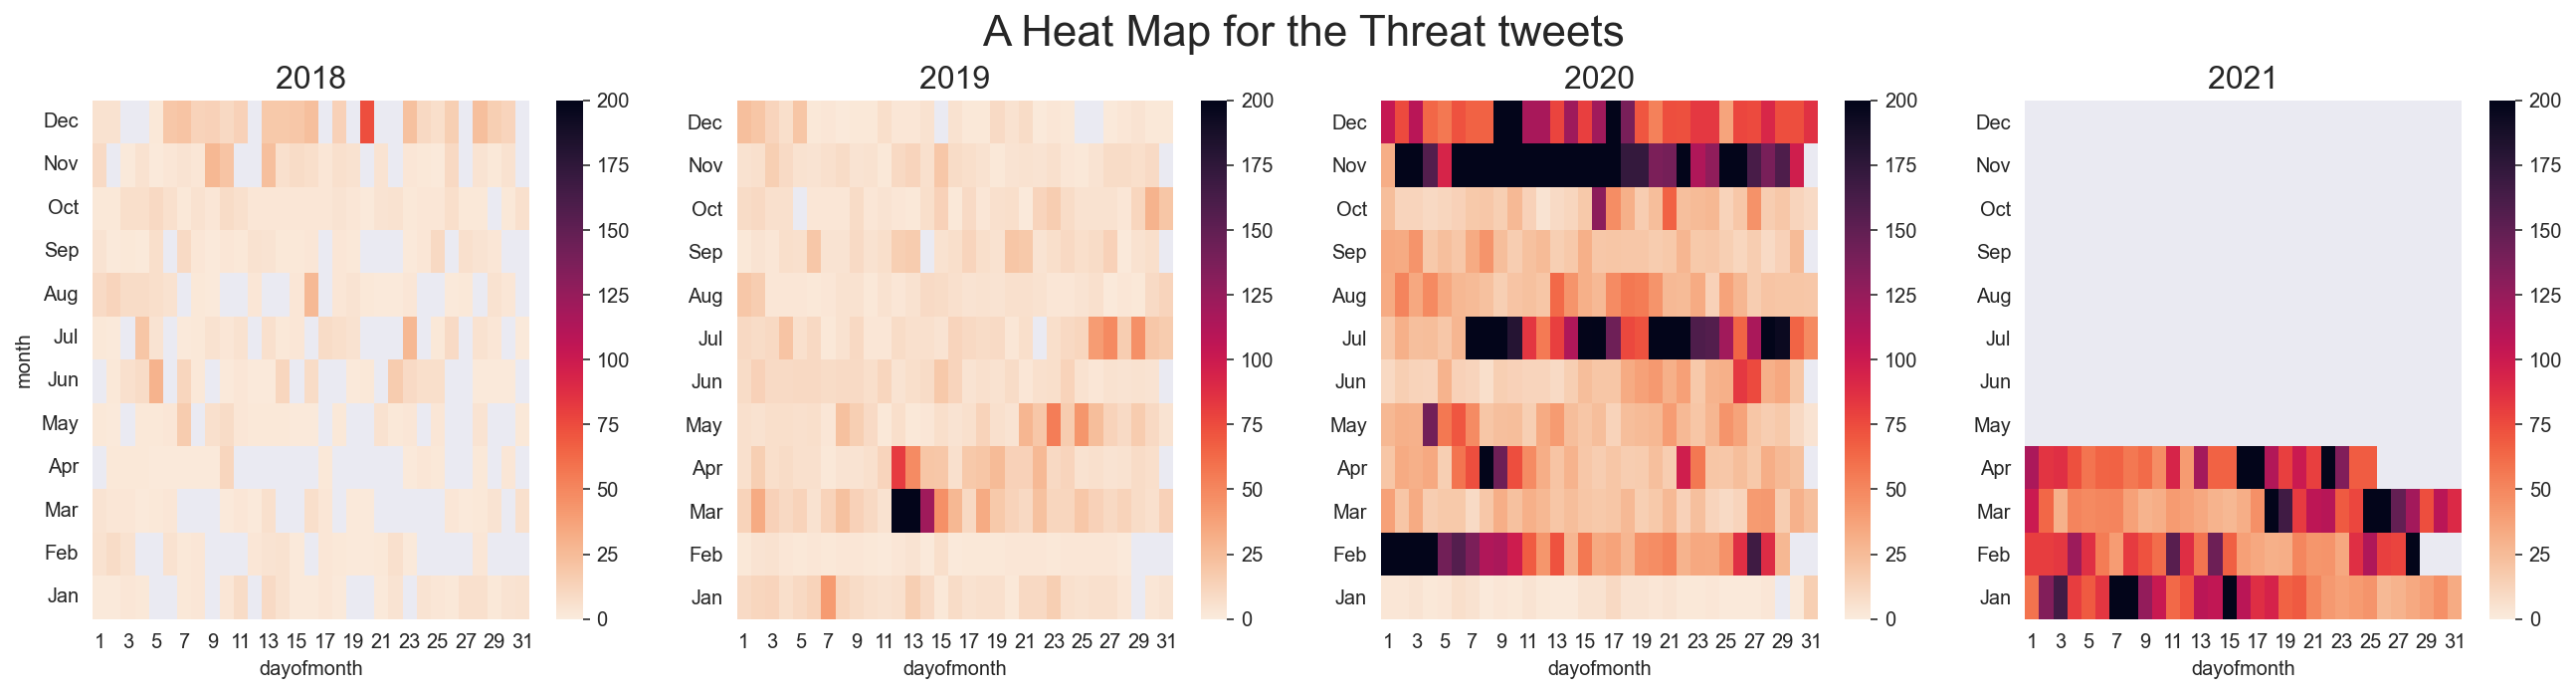

In [129]:
threat_daily = df_threat.groupby(['year', 'dayofmonth', 'month']).size().reset_index(name='ntweets')

title = 'A Heat Map for the Threat tweets'
helpers.facet_heat(threat_daily, title, n_col=4, vmax=200)

### Threat tweets Peak Dates (ALL)

In [130]:
threat_dates = df_threat.groupby(['date']).agg({'text':'count', 'user_id': 'count'}).reset_index(
).rename(columns={'text':'ntweets', 'user_id': 'n_users'}).sort_values('ntweets', ascending=False)

threat_dates.head(15)

date  ntweets  n_users
648   2020-02-02     3441     3441
926   2020-11-06     1768     1768
927   2020-11-07     1562     1562
922   2020-11-02     1440     1440
931   2020-11-11      956      956
1065  2021-03-25      863      863
930   2020-11-10      796      796
817   2020-07-20      792      792
929   2020-11-09      758      758
928   2020-11-08      722      722
649   2020-02-03      722      722
932   2020-11-12      592      592
647   2020-02-01      565      565
933   2020-11-13      492      492
1040  2021-02-28      479      479

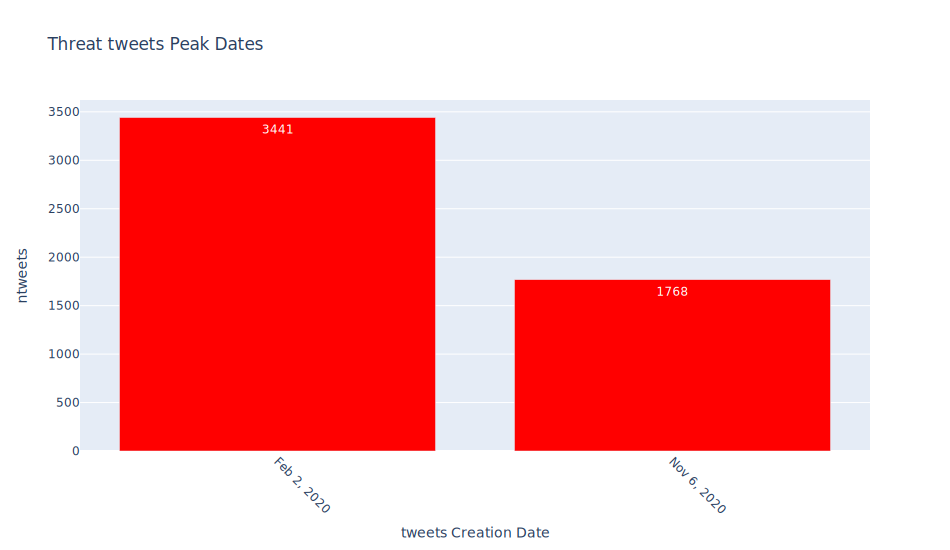

In [131]:
helpers.bar_peaks(threat_dates[['date', 'ntweets']].head(2), 
                  'Threat tweets Peak Dates')

# Most Repeated Threat tweets

In [132]:
# df = df_threat_sub[['text', 'username','created_at']].head(60)
# with pd.option_context('display.max_colwidth', None):
#   display(df.reset_index(drop=True).style.set_properties(**{'text-align': 'left'}))

In [133]:
df_threat_sub.text.value_counts().head(60)

@realamberheard @realamberheard jail for amber heard! justice for johnny @marvel @marvelsupport #justiceforjohnny #amberheardisanabuser #amberheardisaliar #amberheardoutofaquaman                                                                                                     22
@realamberheard @realamberheard jail for amber heard! justice for johnny @marvel @marvelsupport #justiceforjohnnyf #amberheardisanabuser #amberheardisaliar #amberheardoutofaquaman                                                                                                    16
amber heard should be in jail                                                                                                                                                                                                                                                          11
@realamberheard i really hope you get what you deserve.\n#justiceforjohnnydepp                                                                            

In [134]:
df_threat_sub.text.value_counts()[60:].head(60)

amber heard is a liar, a manipulator, and an abuser who publicly lied about johnny depp abusing her physically when it was actually her. now that the evidence in the audio has come out-she deserves to be charged. #justiceforjohnnydepp #justiceforjohnnydepp                                                                    2
amber heard belongs in jail.                                                                                                                                                                                                                                                                                                        2
amber heard deserves to lose everything                                                                                                                                                                                                                                                                                             2
@realamberheard @nytim

### All text containing "go to hell"

In [135]:
df_all_hell = df_threat_sub[df_threat_sub.text.str.contains('go to hell')]
print(f'{df_all_hell.shape[0]} contributions, made by {df_all_hell.username.nunique()} Users')
df_all_hell.head()


172 contributions, made by 166 Users


created_at                                 profile_banner_url  \
46265 2019-02-05 14:24:17  https://pbs.twimg.com/profile_banners/91919598...   
60614 2019-03-12 20:23:36  https://pbs.twimg.com/profile_banners/51929309...   
66086 2019-03-13 01:12:15  https://pbs.twimg.com/profile_banners/28707943...   
67806 2019-03-13 06:40:44  https://pbs.twimg.com/profile_banners/61933746...   
67586 2019-03-13 16:05:53  https://pbs.twimg.com/profile_banners/24352621...   

                                        user_description user_location  \
46265  #JohnnyDepp 😻 #IBelieveJohnnyDepp ❤\n#DeppHead...           NaN   
60614  Med student. Contributor. Digital marketer. Ho...      Pakistan   
66086                                             ♈︎ | 🤎         paris   
67806                            Writer, Host, VO Artist           NaN   
67586  #HomeIsHere ♡ 😎🇺🇸 #GetYourVaccineToEndCOVID19❗...      Chicago!   

                                       profile_image_url lang  \
46265  http://pbs.twimg.com/profile_images/1323749027...   en   
60614  http://pbs.twimg.com/profile_images/1383756306...   en   
66086  http://pbs.twimg.com/profile_images/1383564641...   en   
67806  http://pbs.twimg.com/profile_images/1370704282...   en   
67586  http://pbs.twimg.com/profile_images/1350254550...   en   

                                                    text  n_friends  \
46265        i just want amber heard\ngo to hell 😡😡😡😡😡😡😡       1140   
60614  amber heard and all the women who use #metoo f...        996   
66086                         amber heard can go to hell        461   
67806  amber heard can go to hell. she just made it h...        432   
67586  i got plenty of shit on twitter for defending ...        286   

                     username     user_created_at  ...             tweet_id  \
46265  Depp ☪♊ IBelieveHim 🇮🇹 2017-10-14 13:39:35  ...  1092791023862980609   
60614                   Manal 2012-03-09 08:07:47  ...  1105565022481272834   
66086            melany 🧚🏽‍♀️ 2014-11-10 16:52:31  ...  1105637665397981197   
67806            Sam Valmonte 2009-08-01 02:03:32  ...  1105720330197262336   
67586                    ☆𝕊𝕂𝕐 2011-01-27 07:05:00  ...  1105862555472416769   

       user_screen_name                 user_url        date  year month  \
46265        deppfamily                      NaN  2019-02-05  2019   Feb   
60614          meemelif  https://t.co/8y8OO0yNU3  2019-03-12  2019   Mar   
66086         jcssmelaa                      NaN  2019-03-13  2019   Mar   
67806       samvalmonte  https://t.co/1RS2VttDh4  2019-03-13  2019   Mar   
67586      ___ItsJustMe                      NaN  2019-03-13  2019   Mar   

      dayofmonth                diff days_diff  hours_diff  
46265          5   479 days 00:44:42       479    00:44:42  
60614         12  2559 days 12:15:49      2559    12:15:49  
66086         13  1583 days 08:19:44      1583    08:19:44  
67806         13  3511 days 04:37:12      3511    04:37:12  
67586         13  2967 days 09:00:53      2967    09:00:53  

[5 rows x 23 columns]

In [136]:
df_all_hell.text.value_counts().head(60)

amber heard can go to hell                                                                                                                                                                                                                                                                                  2
i just want amber heard\ngo to hell 😡😡😡😡😡😡😡                                                                                                                                                                                                                                                                 1
amber heard can literally go to hell.                                                                                                                                                                                                                                                                       1
and a big fuck you to @realamberheard for ruining the next fantastic beasts movie and slanderi

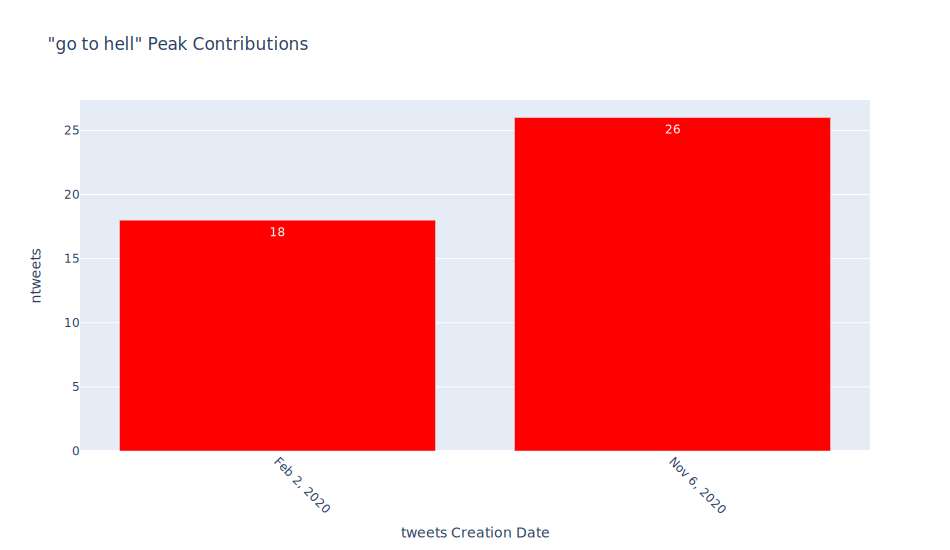

In [137]:
helpers.text_all_peaks(df_threat, 'go to hell', n=2, threshold=0)

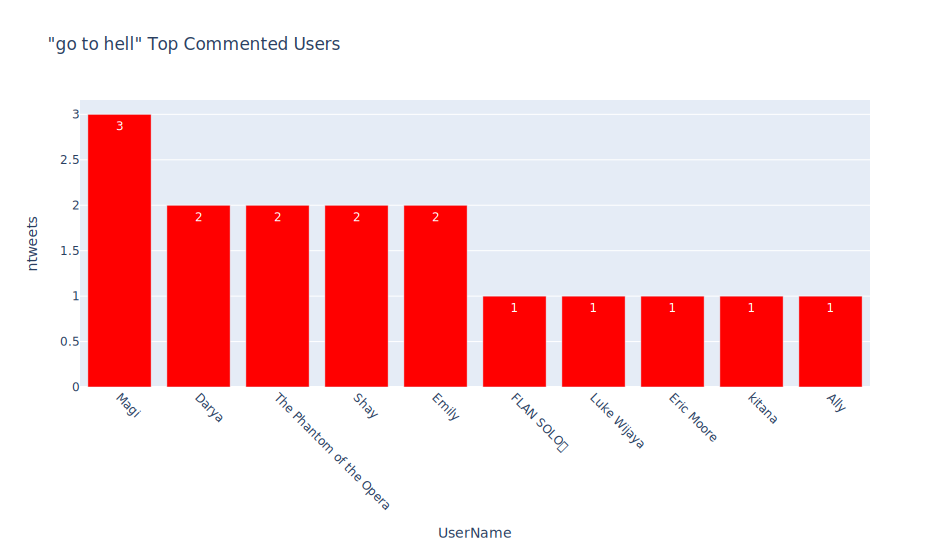

In [138]:
helpers.users_all_peaks(df_threat_sub, 'go to hell', n=10, threshold=0)

<b>

### All text containing "burn in hell"

In [139]:
df_all_burn = df_threat_sub[df_threat_sub.text.str.contains('burn in hell')]
print(f'{df_all_burn.shape[0]} contributions, made by {df_all_burn.username.nunique()} Users')
df_all_burn.head()


77 contributions, made by 76 Users


created_at                                 profile_banner_url  \
69847  2019-03-14 22:28:28  https://pbs.twimg.com/profile_banners/74363268...   
51947  2019-03-15 04:11:54  https://pbs.twimg.com/profile_banners/26562577...   
71066  2019-03-30 01:16:47                                                NaN   
89869  2019-05-21 19:51:28  https://pbs.twimg.com/profile_banners/10686872...   
169355 2020-02-02 02:32:37  https://pbs.twimg.com/profile_banners/69119545...   

                                         user_description  \
69847   Just another average person on Twitter! Please...   
51947                           Love God. Hate showering.   
71066                                                 NaN   
89869                             Questioning life itself   
169355  The 1 & Only. I came, I saw, and I conquered. ...   

                    user_location  \
69847            USA all the way!   
51947   Where the Wild Things Are   
71066                       Chile   
89869      Rio de Janeiro, Brasil   
169355                         Oz   

                                        profile_image_url lang  \
69847   http://pbs.twimg.com/profile_images/7436342947...   en   
51947   http://pbs.twimg.com/profile_images/1224338927...   en   
71066   http://pbs.twimg.com/profile_images/4391474965...   en   
89869   http://pbs.twimg.com/profile_images/1068690589...   en   
169355  http://pbs.twimg.com/profile_images/1334766976...   en   

                                                     text  n_friends  \
69847   i'm not a fan of johnny depp, but what happene...        298   
51947   only love for you, johnny depp! so proud of yo...        320   
71066   @realamberheard liar, abuser, racist! burn in ...         37   
89869   @mirrorceleb this z list actress is an abuser!...         50   
169355  let this woman burn in hell. #timesup #justice...       1592   

                          username     user_created_at  ...  \
69847   Oldschool1990/gunandfunguy 2016-06-17 02:33:42  ...   
51947                  Dill Pickle 2011-03-13 22:05:44  ...   
71066                       esther 2014-01-19 11:10:27  ...   
89869                 Jane Vishous 2018-12-01 02:04:26  ...   
169355                 ᴮᴱDullahan⁷ 2009-08-26 22:40:43  ...   

                   tweet_id  user_screen_name                 user_url  \
69847   1106321221170483201   oldschoolquimby                      NaN   
51947   1106407648289873920        dillrussjo                      NaN   
71066   1111799399422853120   Lady_Hamilton88                      NaN   
89869   1130924085775609856       EveSalander                      NaN   
169355  1223796334164992001        lycanwoman  https://t.co/YgIfECcAvv   

              date  year month dayofmonth                diff days_diff  \
69847   2019-03-14  2019   Mar         14  1000 days 19:54:46      1000   
51947   2019-03-15  2019   Mar         15  2923 days 06:06:10      2923   
71066   2019-03-30  2019   Mar         30  1895 days 14:06:20      1895   
89869   2019-05-21  2019   May         21   171 days 17:47:02       171   
169355  2020-02-02  2020   Feb          2  3811 days 03:51:54      3811   

        hours_diff  
69847     19:54:46  
51947     06:06:10  
71066     14:06:20  
89869     17:47:02  
169355    03:51:54  

[5 rows x 23 columns]

In [140]:
df_all_burn.text.value_counts().head(60)

i'm not a fan of johnny depp, but what happened to him is just horrible. amber heard is about to get what she deserves and she can burn in hell for it. 😠                                                                                                                                                                 1
#amberheardisanabuser  she will pay for this shit. johnny is innocent and he faced violence. she's trying to impose some fake feminism here. hurting men in the name of feminism is shit. may you burn in hell miss heard.\n#justiceforjohnnydepp                                                                         1
@realamberheard you’re an absolutely disgusting and vile human being!! you know god damn good and well that you are the abuser and not johnny!! i hope you burn in hell. you’re an evil bitch!! #amberheardisaliar #westandwithjohnny                                                                                     1
fuck this cunt amber heard fucking bitch burn in hel

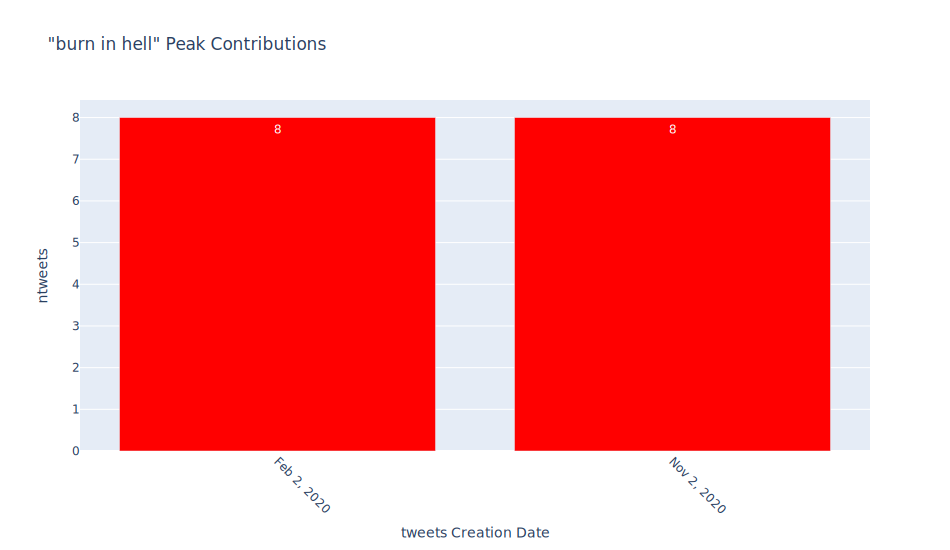

In [141]:
helpers.text_all_peaks(df_threat, 'burn in hell', n=2, threshold=0)

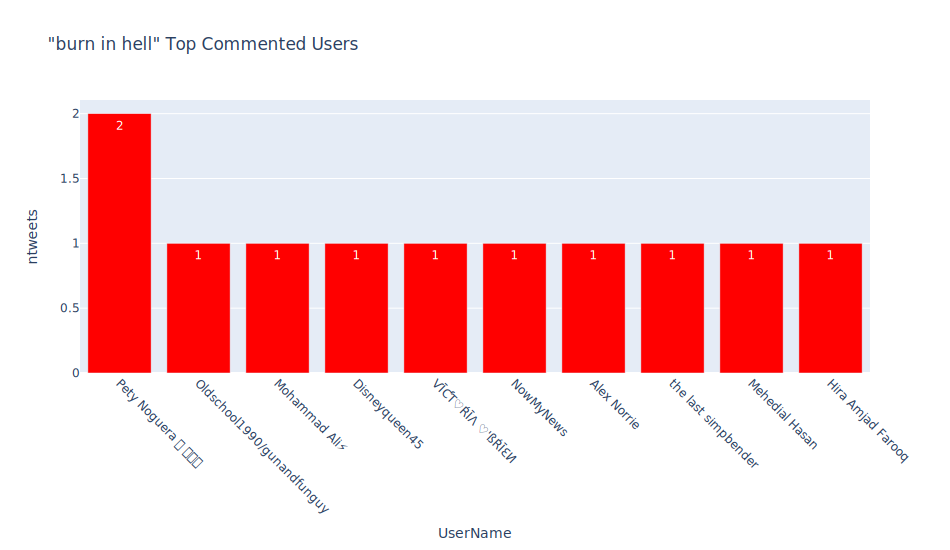

In [142]:
helpers.users_all_peaks(df_threat_sub, 'burn in hell', n=10, threshold=0)

# Top Users Commented with Threat keywords

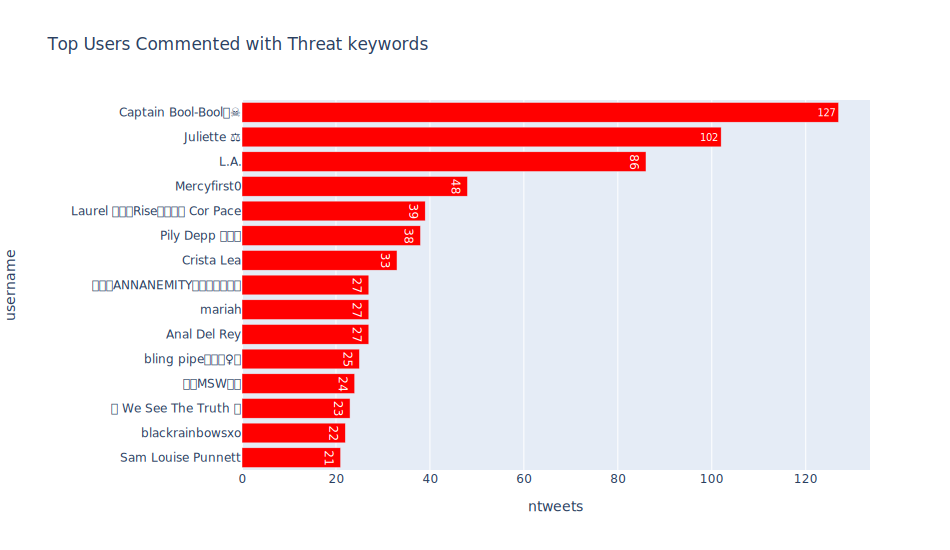

In [143]:
threat_sub_users = df_threat_sub.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ntweets'})
helpers.barh(threat_sub_users.head(15), 'Top Users Commented with Threat keywords', threshold=0, c=0)

In [144]:
set_threat_users = set(threat_sub_users.username.head(15))

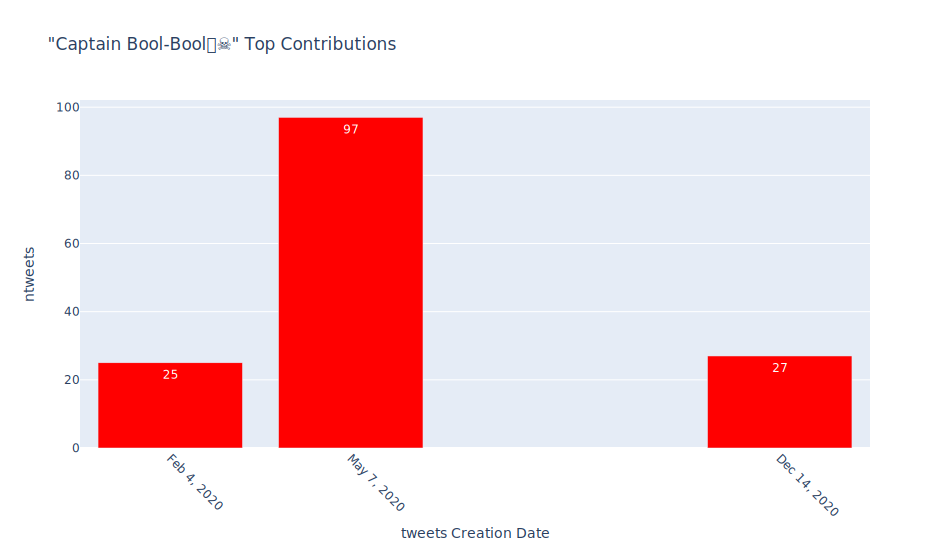

In [145]:
helpers.contr_peaks(df_tweets, "Captain Bool-Bool🏴‍☠️", n=3, threshold=0)

In [146]:
user = "Captain Bool-Bool🏴‍☠️"
df_threat.query(" username == @user ").text.value_counts().head()

#amberheardisanabuser #justiceforjohnnydepp \nhttps://t.co/j5lxkiv8o5\n451 k \nwe will not glorify the criminal, abuser, slanderer, liar amber heard in the entertainment industry.                                                                                                2
#justiceforjohnnydepp #johnnydeppismygrindelwald \nburn hollywood burn. 🔥                                                                                                                                                                                                          2
#amberheardisanabuser #justiceforjohnnydepp \nhttps://t.co/j5lxkiv8o5\n437 k \nwe will not glorify the criminal, abuser, slanderer, liar amber heard in the entertainment industry.                                                                                                2
@deadline depp is suing the liar, abuser and slanderer amber heard because his career was harmed. now he is going to star in the film, and shooting coincides with the da

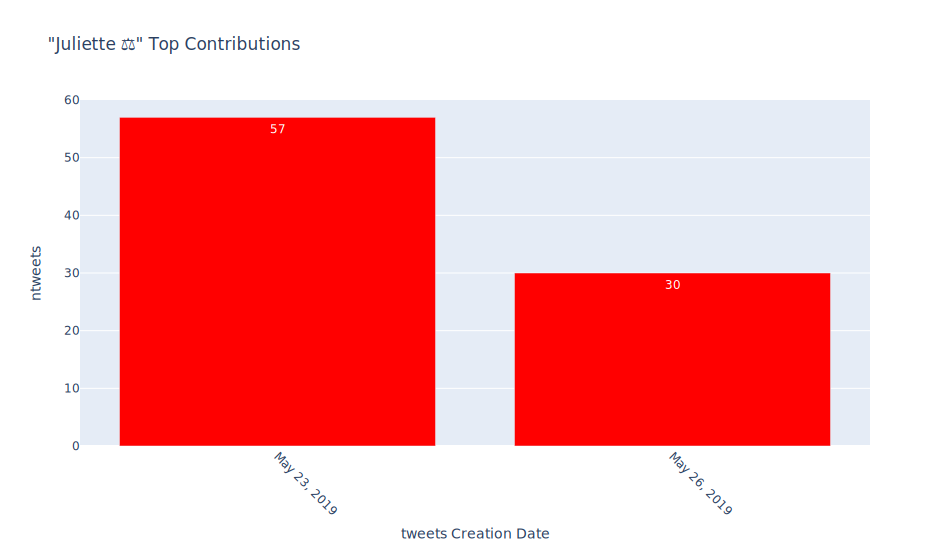

In [147]:
helpers.contr_peaks(df_tweets, "Juliette ⚖️", n=2, threshold=0)

In [148]:
df_threat.query(" username == 'Juliette ⚖️' ").text.value_counts().head()

listen to the people and stop endorsing and enabling evil amber heard and her criminal ways. \n@lorealparisusa\n@ungeneva\n@aclu\n@aclu_mass\n@sams_usa\n@nlatun\n@argentinaun                                                                                                                                                                                                                                                                                                        2
@doughtystpublic @realamberheard are you effing crazy for endorsing this admitted multiple abuser?! of course amber heard will be promoting empathy. for herself. she just got hit with the lawsuit she has long deserved and hopes that you will help her. wake up! you are an embarrassment! https://t.co/erxydwlkyv                                                                                                                                                                1
@superbitchtoyou @thoughtfulmandz @thenamesq @adam_waldm

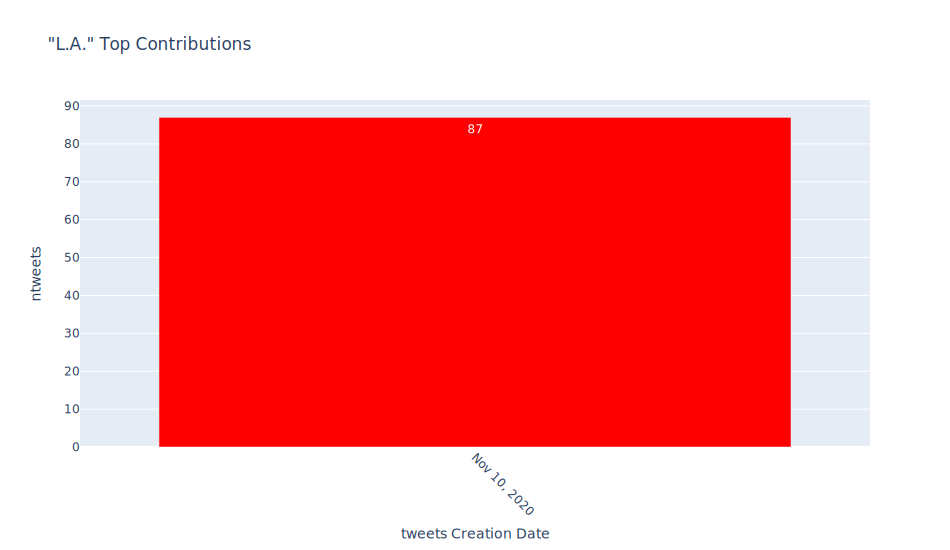

In [149]:
helpers.contr_peaks(df_tweets, "L.A.", n=3, threshold=0)

In [150]:
df_threat.query(" username == 'L.A.' ").text.value_counts().head()

@realamberheard @realamberheard jail for amber heard! justice for johnny @marvel @marvelsupport #justiceforjohnny #amberheardisanabuser #amberheardisaliar #amberheardoutofaquaman                   22
@realamberheard @realamberheard jail for amber heard! justice for johnny @marvel @marvelsupport #justiceforjohnnyf #amberheardisanabuser #amberheardisaliar #amberheardoutofaquaman                  16
@realamberheard @realamberheard jail for amber heard! justice for johnny @marvel @marvelsupport  @aquamanmovie #justiceforjohnny #amberheardisanabuser #amberheardisaliar #amberheardoutofaquaman     7
@realamberheard @kamalaharris @realamberheard jail for amber heard! justice for johnny @marvel @marvelsupport #justiceforjohnnyf #amberheardisanabuser #amberheardisaliar #amberheardoutofaquaman     2
@realamberheard @nytimes @realamberheard jail for amber heard! justice for johnny @marvel @marvelsupport #justiceforjohnny #amberheardisanabuser #amberheardisaliar #amberheardoutofaquaman           2


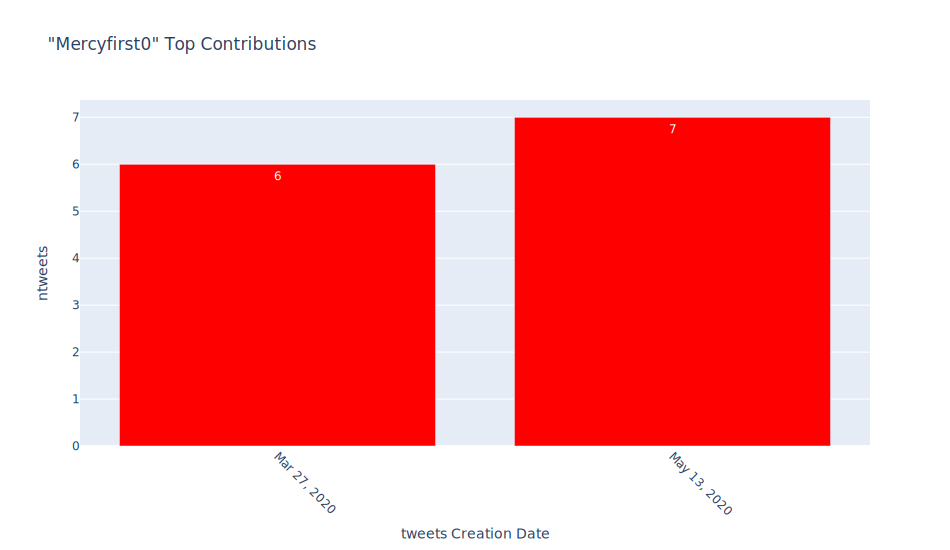

In [151]:
helpers.contr_peaks(df_tweets, "Mercyfirst0", n=2, threshold=0)

In [152]:
df_threat.query(" username == 'Mercyfirst0' ").text.value_counts().head()

#justiceforjohnnydepp #jailforamberheard                                                                                                                                                                                                                                  2
support for johnny d. he deserves justice. we must boycott any project amber herd is associated with! that includes the upcoming sequel to aquqman due out dec 2022.... either recast mera or boycott the movie! let it be known we want justice!#justiceforjohnnydepp    1
@theinfamousone6 yep day stupidier than a sack of hammers! 🤪🤣😂#justiceforjohnnydepp                                                                                                                                                                                       1
@theinfamousone6 @xhyuck @thenamesq yes , blood is thicker than water... is the saying...   #justiceforjohnnydepp #jailforamberheard                                                                

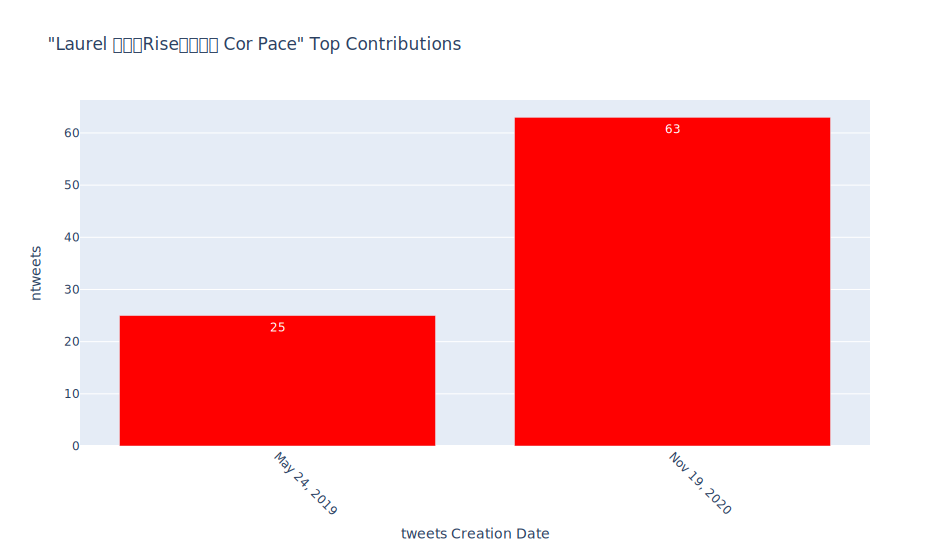

In [153]:
helpers.contr_peaks(df_tweets, "Laurel 🍩🍩🍩Rise🦇🌠🤗🌠 Cor Pace", n=2, threshold=0)

In [154]:
df_threat.query(" username == 'Laurel 🍩🍩🍩Rise🦇🌠🤗🌠 Cor Pace' ").text.value_counts().head()

i want amber heard in prison for abusing &amp; defaming an innocent person. do you?                                                                                                                                                                                                                                                                                                                                    2
@suigenerisjen @realamberheard @unhumanrights @aclu @doughtystcrime @doughtystreet @doughtystintl @doughtystpublic it's women like you &amp; amber heard who make the world a sadder place for genuine survivors of violence. you're not impressive, you're not believable, you're not my spokespersons &amp; you're never going to be. you side with an abuser whose smug face says it all: lies. can't trust you.    1
@laurabockov karma is coming for you ah nothing can stop it...you harmed an innocent. recompense by your own hand used in flagrance. not my will. divinity's. \n\nburning out i guess 

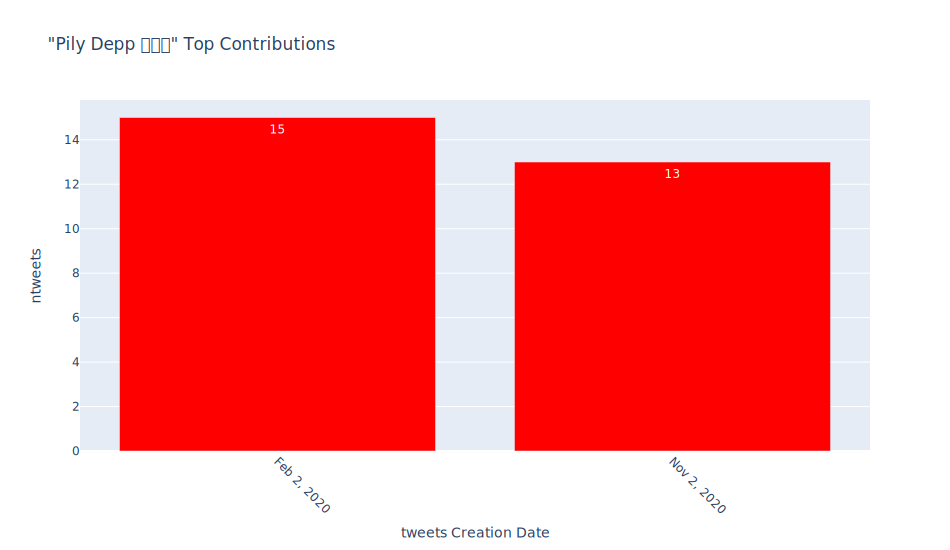

In [155]:
helpers.contr_peaks(df_tweets, "Pily Depp 🍩🤖🍓", n=2, threshold=0)

In [156]:
df_threat.query(" username == 'Pily Depp 🍩🤖🍓' ").text.value_counts().head()

amber heard abused and defamed johnny depp, she mocked real dv victims, she was arrested for dv in 2009, she used real and important causes to save face, she can’t properly act, she’s disgusting and she doesn’t deserve to be mera anymore. \n\n300k people want her out!\n\n#recastmera                                                       2
ay no, siguen con la tontera, pensé que había disminuido el ataque 😒😒 idiotas sin oficio 😐😒 pero no piden boicotear aquaman donde verdaderamente hay una abusadora😡😡 amber heard es una abusiva, mentirosa compulsiva, y nadie dice nada porque es mujer, malditos hipócritas😡😡 https://t.co/vzppsdls9b                                           1
no superare nunca el hecho que la payasa de amber heard y sus payasos "abogados" crean que el equipo de johnny depp le paga a los fans para que lo defiendan... yo seria la mujer mas feliz del mundo si johnny me paga con su cuerpo, plata no quiero 😈😝😝😈 https://t.co/jqpwcqvyrk                                             

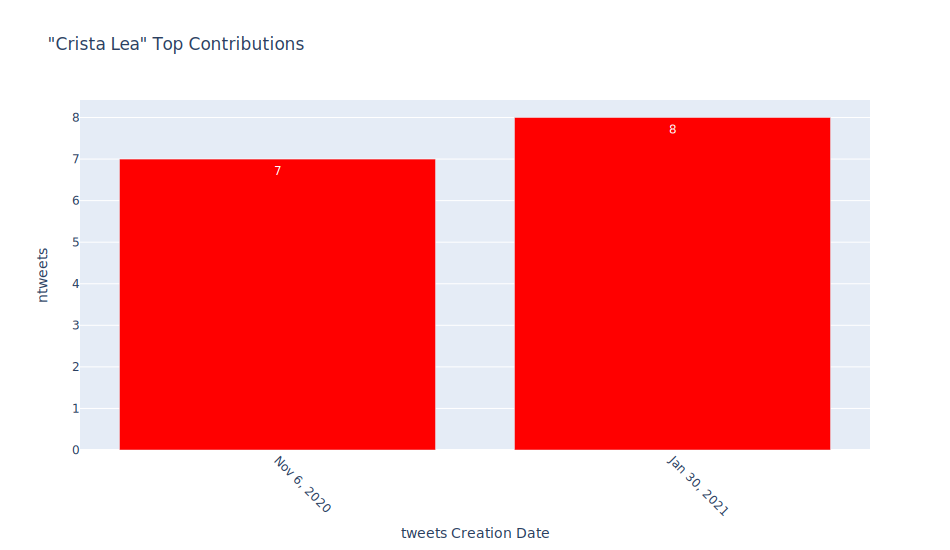

In [157]:
helpers.contr_peaks(df_tweets, "Crista Lea", n=2, threshold=0)

In [158]:
user = "Crista Lea"
df_threat.query(" username == @user ").text.value_counts().head()

@izzy_theycallme @piscesmoon63 @jameelajamil @realamberheard perfectly said, @izzy_theycallme!she's the very careless,immoral media we need to banish from the spotlight! media who harm instead of report true facts! ruining lives for gain is criminal! #canceloitillerwright #canceljameelajamil #amberheardisanabuser #justiceforjohnnydepp                                                                                                                                                                   1
#amberheardisnotwellread #intelligencecantbefaked #amberheardisaliar #amberheardisanabuser  #amberheardisagolddigger #ambershitthebed #amberheardcutjohnnyfingeroff #ambercheatedwithnastydudes #amberneverdeservedjohnny #amberishatefilled #amberheardhasabusedmany #ah4prison                                                                                                                                                                                                                                   

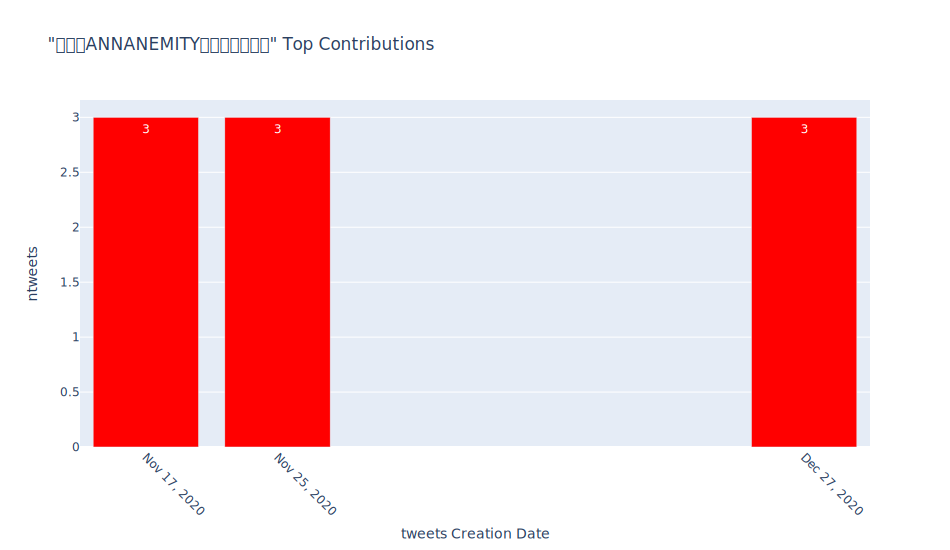

In [159]:
helpers.contr_peaks(df_tweets, "🐣🐤🥚ANNANEMITY🥚🥚🐰🐤🐥🐣🥚", n=3, threshold=0)

In [160]:
df_threat.query(" username == '🐣🐤🥚ANNANEMITY🥚🥚🐰🐤🐥🐣🥚' ").text.value_counts().head()

@theblastnews fans believe the grass is green too, uh it's on there the snake admitting she hits him, calling a baby, she is so ike turner a disgrace! why the f*ck isn't she in jail? this is just disgusting 🤬#justiceforjohnnydepp                                                                                                   1
so @etcanada, others still wanna think amber💩heard's a victim not the victimiser #johnnydepp got abused nearly killed but who cares water under the bridge move on who knows what happened right? disgusting!🤬   https://t.co/ngy30gcgaj #johnnydeppisinnocent #amberheardisanabuser                                                    1
@lorealparisusa i wish 💩amber heard a known convicted criminal being supported as a serial abuser was a myth #amberheardisanabuser                                                                                                                                                                                                      1
@lorealpar

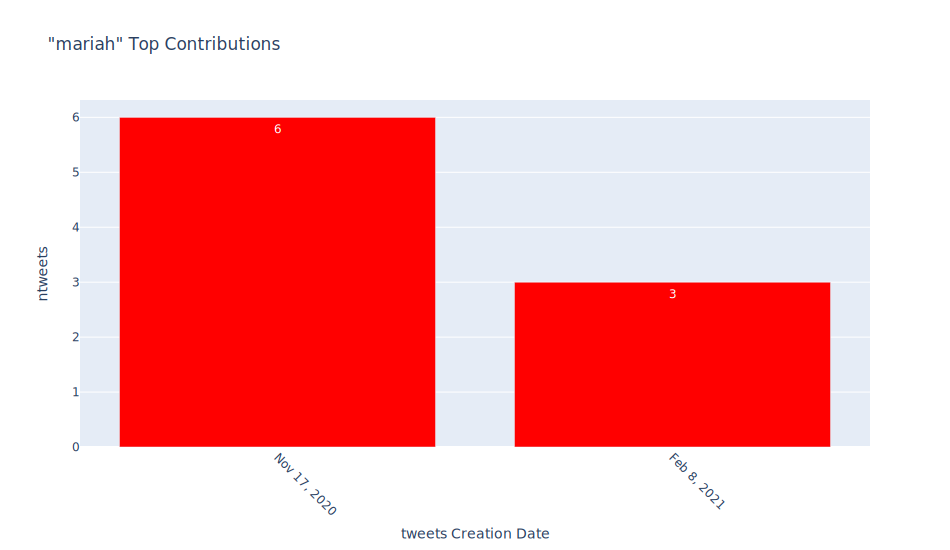

In [161]:
helpers.contr_peaks(df_tweets, "mariah", n=2, threshold=0)

In [162]:
df_tweets.query(" username == 'mariah' ").text.value_counts().head()

fuck amber heard                                                                                                                                                                                                                                                                        15
also fuck amber heard                                                                                                                                                                                                                                                                    4
prison for amber heard                                                                                                                                                                                                                                                                   4
fuck amber heard fuck amber heard fuck amber heard fuck amber heard fuck amber heard fuck amber heard fuck amber heard fuck amber heard fuck amber hear

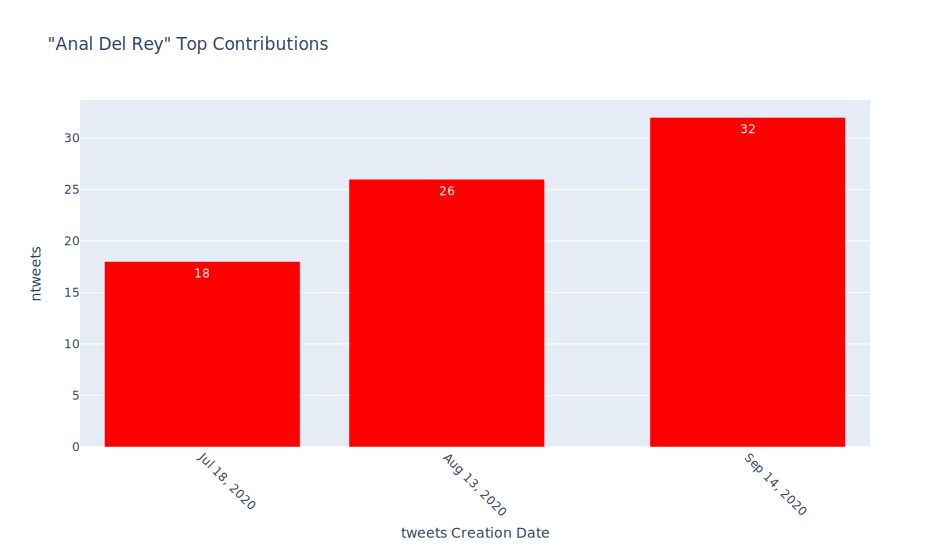

In [163]:
helpers.contr_peaks(df_tweets, "Anal Del Rey", n=3, threshold=0)

In [164]:
df_threat.query(" username == 'Anal Del Rey' ").text.value_counts().head()

@nickwallis wow so an fbi agent accused amber heard of murder and extortion in the us case and literally nobody but this paralegal on youtube are talking about it.. pls share to spread awareness!!! youtube won’t promote these videos https://t.co/zrhnz8jraf         3
@thenamesq wow so an fbi agent accused amber heard of murder and extortion in the us case and literally nobody but this paralegal on youtube are talking about it.. pls share to spread awareness!!! youtube won’t promote these videos https://t.co/zrhnz8jraf          2
@johnnyhellodepp crowd boos amber heard!! share pls                                                                                                                                                                                                                      1
@nosanityallowed wow so an fbi agent accused amber heard of murder and extortion in the us case and literally nobody but this paralegal on youtube are talking about it.. pls share to spread awareness

<br>

<br>

<a id='threat_users'></a>
>>## Threat Users Contributions (All Contributions)
> <ul>
 <li><a href="#kill_death">Kill & Death</a></li>
 <li><a href="#kill_death_more">Kill & Death (More Investigations)</a></li>
 <li><a href="#hell_burn">Hell & Burn</a></li>
 <li><a href="#crime_jail">Crime & Jail</a></li>
 <li><a href="#all_threat">All Threat</a></li>
 <li><a href="#threat_users"><b>Threat Users Contributions</b></a></li>
 </ul>

In [165]:
len(set(df_threat.username))

27817

In [166]:
threat_users = list(df_threat.username)
df_threat_users = df_tweets.query(' username == @threat_users ')
df_threat_users = df_threat_users[~df_threat_users.username.isin(remove_users)]
print(f'{df_threat_users.shape[0]} contributions, made by {df_threat_users.username.nunique()} Users')
df_threat_users.head(2)


353117 contributions, made by 27817 Users


created_at                                 profile_banner_url  \
1873 2018-01-01 01:40:18  https://pbs.twimg.com/profile_banners/74497825...   
1838 2018-01-01 02:16:00  https://pbs.twimg.com/profile_banners/10562024...   

                                       user_description    user_location  \
1873  a dc fan who hates dc ... who is also unactive...      themiscyira   
1838  28. dark and twisty♡ taking it sleazy✌🏻 tv sho...  Santiago, Chile   

                                      profile_image_url lang  \
1873  http://pbs.twimg.com/profile_images/1385690792...   en   
1838  http://pbs.twimg.com/profile_images/1378557216...   es   

                                                   text  n_friends username  \
1873  me: wow i cant belive its almost 2018 \neveryb...        543   sophie   
1838                     amber heard anduvo en chilito?       3556     Caro   

         user_created_at  ...            tweet_id  user_screen_name  \
1873 2016-06-20 19:40:31  ...  947643613156134912        nightwinxg   
1838 2010-01-16 23:16:06  ...  947652598630404101         iCaaroooh   

                     user_url        date  year month dayofmonth  \
1873                      NaN  2018-01-01  2018   Jan          1   
1838  https://t.co/pIQHZbRYeQ  2018-01-01  2018   Jan          1   

                    diff days_diff  hours_diff  
1873   559 days 05:59:47       559    05:59:47  
1838  2906 days 02:59:54      2906    02:59:54  

[2 rows x 23 columns]

In [167]:
df = df_threat_users.groupby('username').agg({'text':'count', 'user_id': 'count'}).reset_index(
).rename(columns={'text':'ntweets', 'user_id': 'n_users'})

print(df.shape)
df.sort_values('ntweets', ascending=False).head(15)

(27817, 3)


username  ntweets  n_users
10547    Libby ♿️🏴‍☠️🇺🇸 #JusticeForJohnnyDepp     2480     2480
6055                     Ewinters Wald-Mignon     1793     1793
9130                              Juliette ⚖️     1585     1585
27475                             💜Mellie💜 🇦🇺     1561     1561
17853                              TinaFarrar     1474     1474
14708        Raúl Sobas #JusticeForJohnnyDepp     1443     1443
10231                               Lakota Di     1318     1318
10329             Laurel 🍩🍩🍩Rise🦇🌠🤗🌠 Cor Pace     1269     1269
2417                               Belinda 🇬🇧     1246     1246
16429                                 Soledad     1192     1192
3246                    Captain Bool-Bool🏴‍☠️     1185     1185
18000                           Tracey Brooks     1120     1120
2688                  Blue Gansey is on break     1103     1103
26611  𝕷𝖎𝖙𝖙𝖑𝖊 𝕻𝖊𝖊𝖕𝖘 🏴‍☠️#JusticeForJohnnyDepp     1088     1088
8703                           Joanna Woodley     1083     1083

### A Heat Map for the Threat Users tweets 

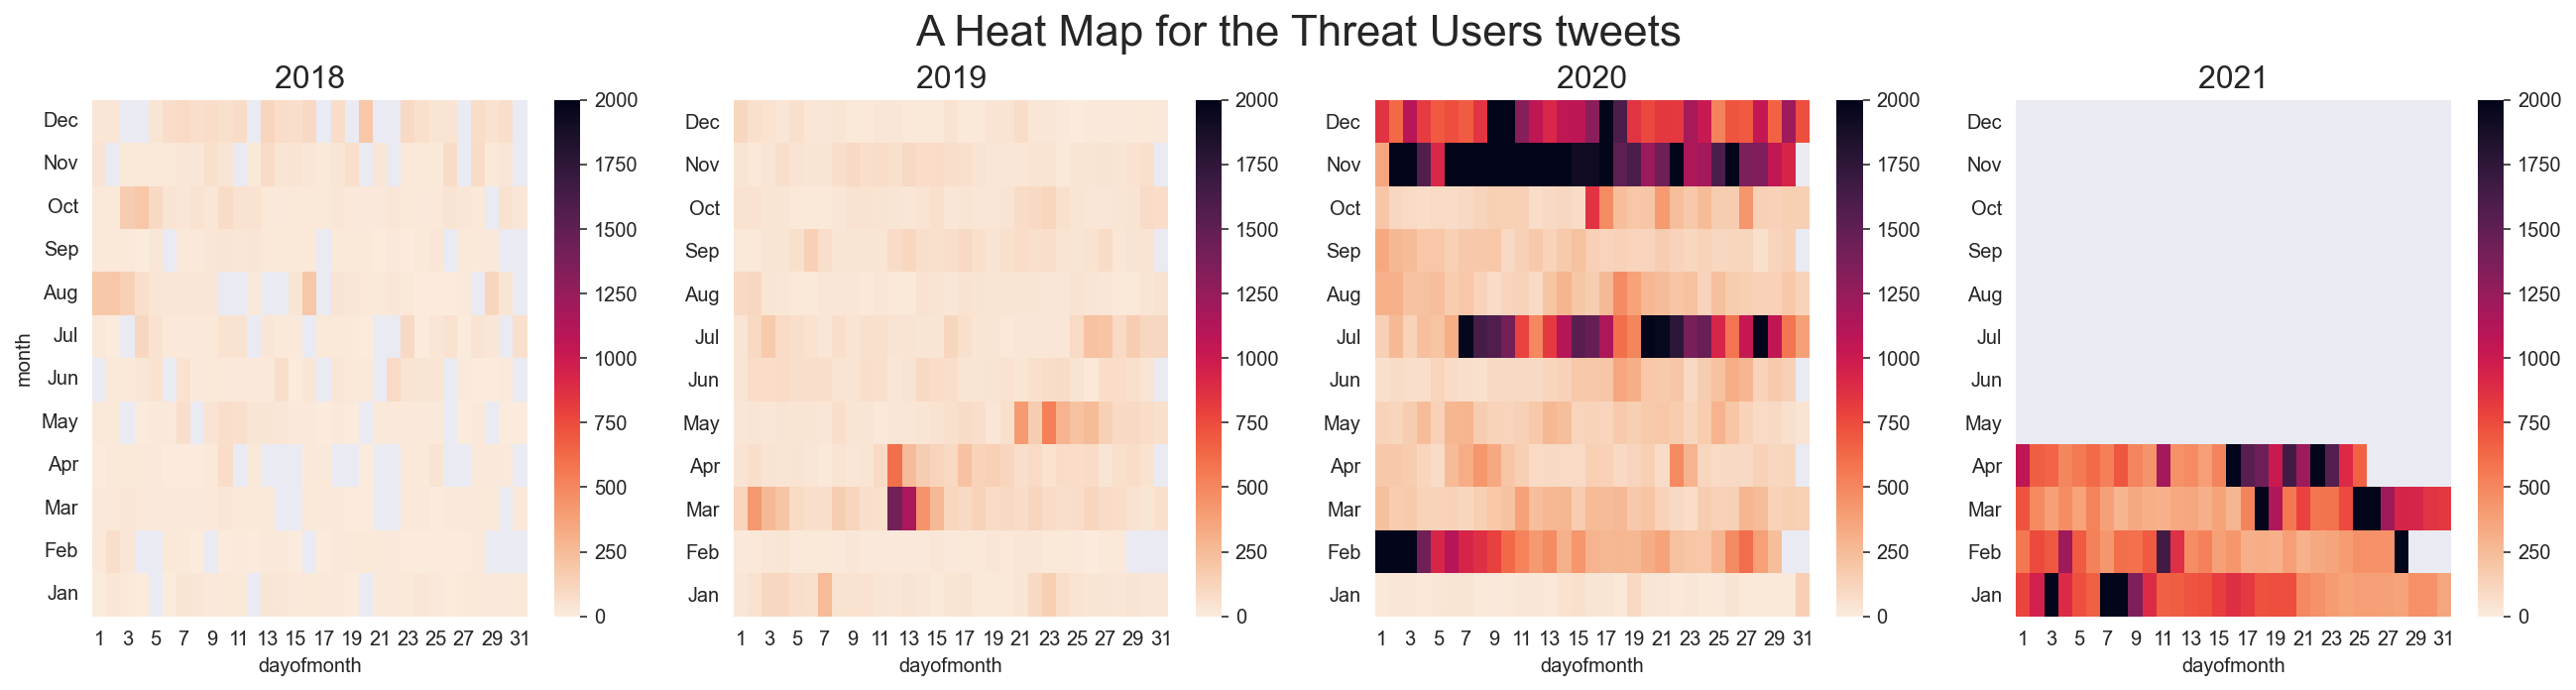

In [168]:
threat_users_daily = df_threat_users.groupby(['year', 'dayofmonth', 'month']).size().reset_index(name='ntweets')

title = 'A Heat Map for the Threat Users tweets'
helpers.facet_heat(threat_users_daily, title, n_col=4, vmax=2000)

### Threat Users tweets Peak Dates

In [169]:
threat_users_dates = df_threat_users.groupby(['date']).agg({'text':'count', 'user_id': 'count'}).reset_index(
).rename(columns={'text':'ntweets', 'user_id': 'n_users'}).sort_values('ntweets', ascending=False)

threat_users_dates.head(15)


date  ntweets  n_users
698   2020-02-02    10452    10452
976   2020-11-06     9635     9635
977   2020-11-07     8662     8662
972   2020-11-02     8185     8185
1115  2021-03-25     6042     6042
1143  2021-04-22     5355     5355
978   2020-11-08     5034     5034
979   2020-11-09     4934     4934
981   2020-11-11     4676     4676
982   2020-11-12     4412     4412
980   2020-11-10     3893     3893
1017  2020-12-17     3777     3777
1039  2021-01-08     3775     3775
1108  2021-03-18     3714     3714
983   2020-11-13     3450     3450

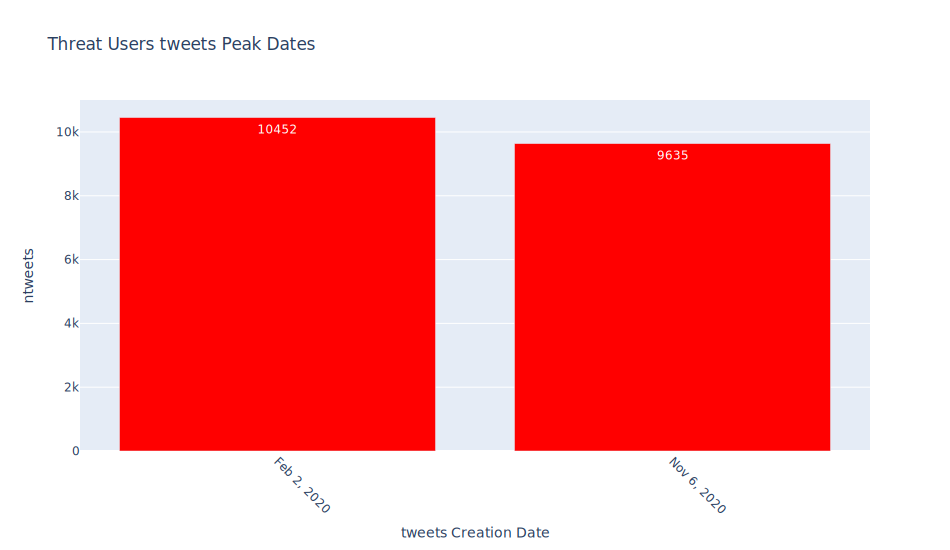

In [170]:
helpers.bar_peaks(threat_users_dates[['date', 'ntweets']].head(2), 
                  'Threat Users tweets Peak Dates')

# Most Repeated Threat Users tweets

In [171]:
threat_users_sub = list(df_threat_sub.username)
df_threat_users_sub = df_tweets.query(' username == @threat_users_sub ')
df_threat_users_sub = df_threat_users_sub[~df_threat_users_sub.username.isin(remove_users)]
print(f'{df_threat_users_sub.shape[0]} contributions, made by {df_threat_users_sub.username.nunique()} Users')
df_threat_users_sub.head(1)


192670 contributions, made by 7854 Users


created_at                                 profile_banner_url  \
1873 2018-01-01 01:40:18  https://pbs.twimg.com/profile_banners/74497825...   

                                       user_description user_location  \
1873  a dc fan who hates dc ... who is also unactive...   themiscyira   

                                      profile_image_url lang  \
1873  http://pbs.twimg.com/profile_images/1385690792...   en   

                                                   text  n_friends username  \
1873  me: wow i cant belive its almost 2018 \neveryb...        543   sophie   

         user_created_at  ...            tweet_id  user_screen_name  user_url  \
1873 2016-06-20 19:40:31  ...  947643613156134912        nightwinxg       NaN   

            date  year month dayofmonth               diff days_diff  \
1873  2018-01-01  2018   Jan          1  559 days 05:59:47       559   

      hours_diff  
1873    05:59:47  

[1 rows x 23 columns]

In [172]:
df_threat_users_sub.text.value_counts().head(60)

#justiceforjohnnydepp                                                                                                                                                                  10362
#justiceforjohnnydepp #amberheardisanabuser                                                                                                                                              554
#amberheardisanabuser                                                                                                                                                                    441
#amberheardisaliar                                                                                                                                                                       434
#justiceforjohnnydepp \n#amberheardisanabuser                                                                                                                                            162
#justiceforjohnnydepp \n#amberheardisaliar             

In [173]:
# df_threat_users_sub.text.value_counts()[60:].head(60)

### Text Contains "not a victim" --> 260

In [174]:
df_no_pos = df_tweets[~df_tweets.username.isin(remove_users)]

In [175]:
df_victim = df_no_pos[df_no_pos.text.str.contains('not a victim')]
df_victim.shape

(260, 23)

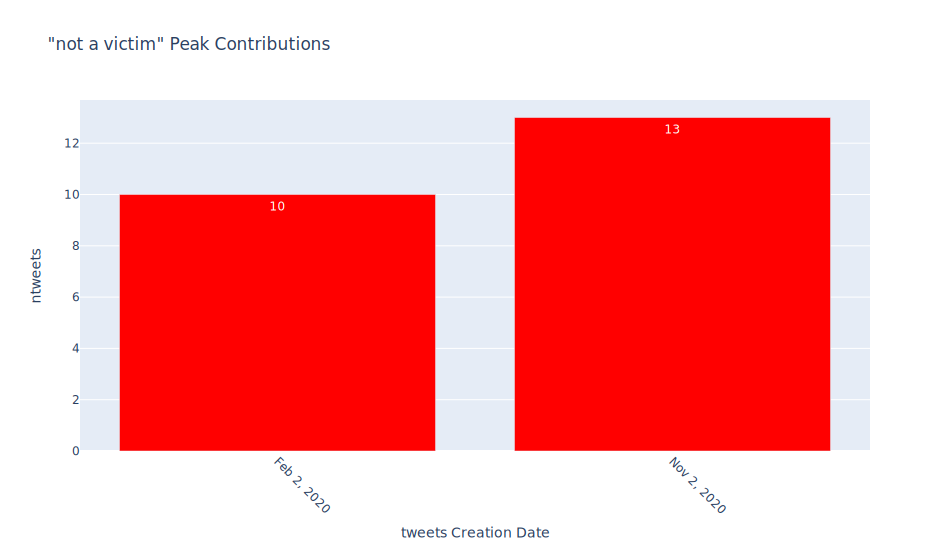

In [176]:
helpers.text_all_peaks(df_no_pos, "not a victim", n=2, threshold=0)

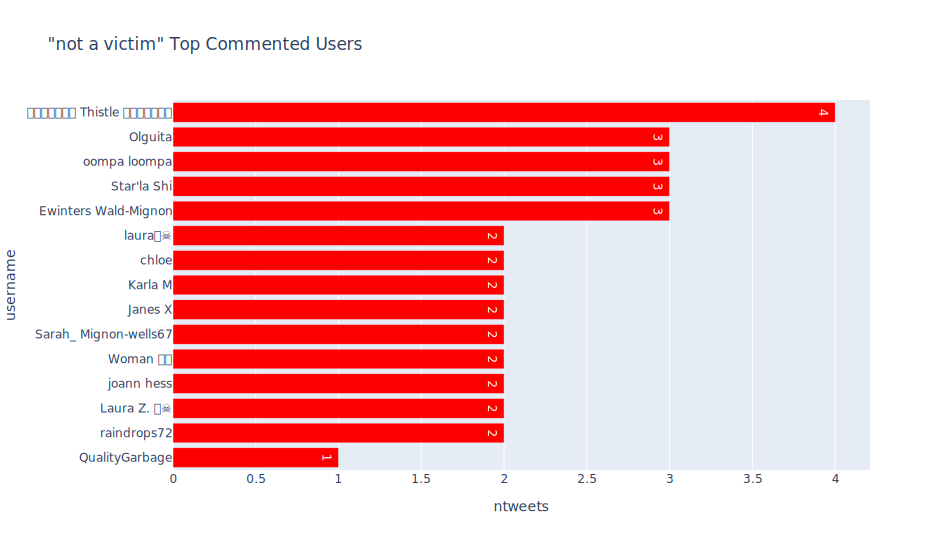

In [177]:
victim_users = df_victim.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ntweets'})
helpers.barh(victim_users.head(15), '"not a victim" Top Commented Users', threshold=0, c=0)

**NOTE:** Most of these users only commented with "not a victim" tweets!!!

<br>

# Top Users Commented with "not a victim" 

In [178]:
df_victim.username.value_counts().head(10)

🏴󠁧󠁢󠁳󠁣󠁴󠁿 Thistle 🏴󠁧󠁢󠁳󠁣󠁴󠁿    4
Olguita                    3
oompa loompa               3
Star'la Shi                3
Ewinters Wald-Mignon       3
laura🏴‍☠️                  2
chloe                      2
Karla M                    2
Janes X                    2
Sarah_ Mignon-wells67      2
Name: username, dtype: int64

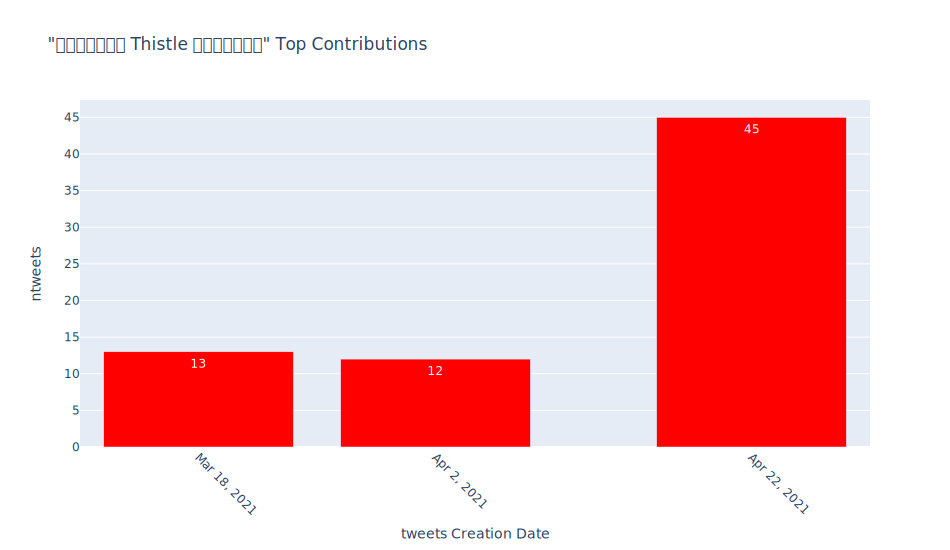

In [179]:
helpers.contr_peaks(df_tweets, "🏴󠁧󠁢󠁳󠁣󠁴󠁿 Thistle 🏴󠁧󠁢󠁳󠁣󠁴󠁿", n=3, threshold=0)

In [180]:
df_tweets.query(" username == '🏴󠁧󠁢󠁳󠁣󠁴󠁿 Thistle 🏴󠁧󠁢󠁳󠁣󠁴󠁿' ").text.value_counts().head()

#justiceforjohnnydepp                                                                                                                                                                                     19
#amberheardisaliar                                                                                                                                                                                         3
@tralalalumbum 💩💩💩💩💩\n\n#amberheardisanabuser https://t.co/mveurpftac                                                                                                                                      1
literally struggling here with utter amberassment and cringe. \n\nhave some discretion! 🤣😂🤣😂 \n\n#amberheardisanabuser                                                                                     1
not ok.\n\ndepp supporters provide evidence. turd stans insult and wish harm. who's the victim again?\n\n#amberheardisaliar \n#amberheardisanabuser\n#justiceforjohnnydepp\n#johnnyd

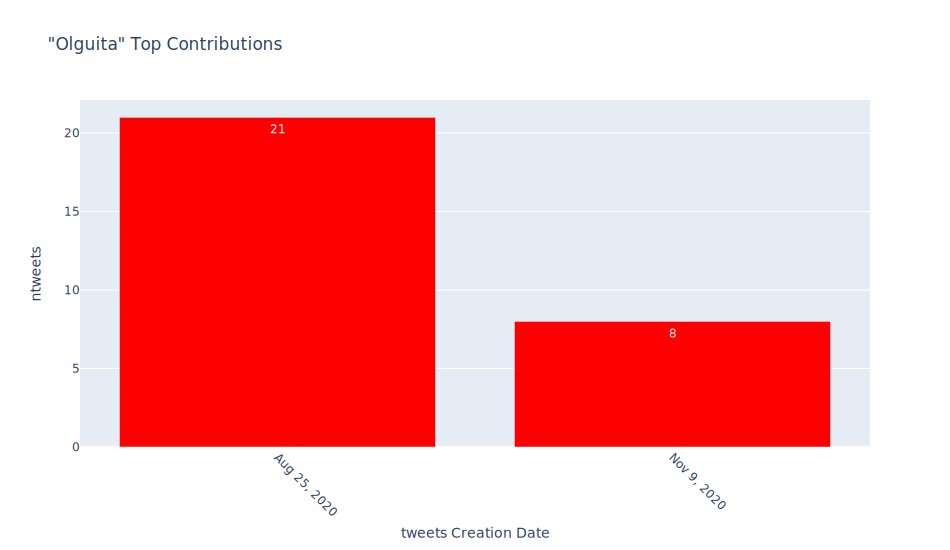

In [181]:
helpers.contr_peaks(df_tweets, "Olguita", n=2, threshold=0)

In [182]:
df_tweets.query(" username == 'Olguita' ").text.value_counts().head()

#justiceforjohnnydepp                                                                                                                          4
@thenamesq all the evidence is there\n#amberheardisanabuser \nthe truth will prevail \n#justiceforjohnnydepp                                   2
#justiceforjohnnydepp \n#amberheardisanabuser                                                                                                  2
ohhh la mina loca #justiceforjohnnydepp                                                                                                        1
@na0_av @sbarrbrisebois @wbpictures @jasonkilar wb needs to understand that the jury has spoken, loudly and clearly.\n#justiceforjohnnydepp    1
Name: text, dtype: int64

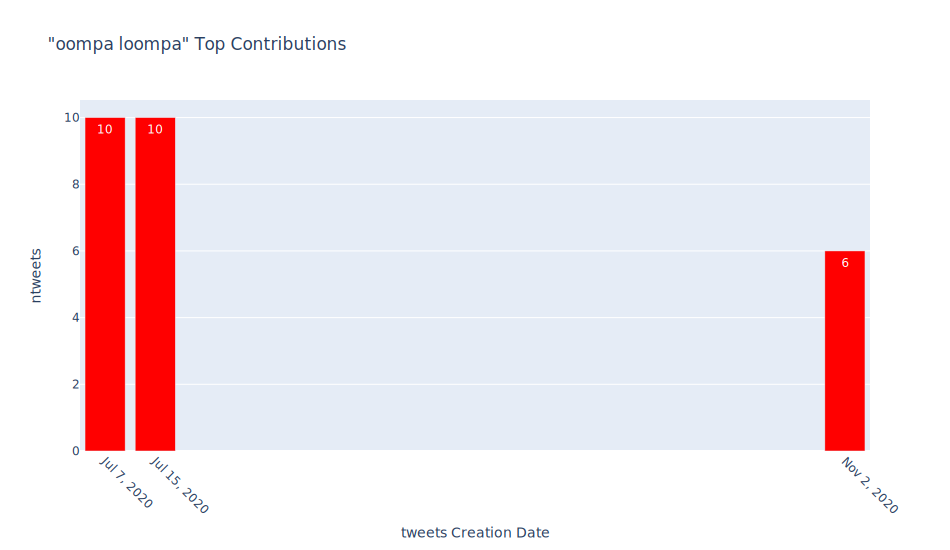

In [183]:
helpers.contr_peaks(df_tweets, "oompa loompa", n=3, threshold=0)

In [184]:
df_victim.query(" username == 'oompa loompa' ").text.value_counts().head()

@thetimes this is, once again, an attempt to paint johnny depp as the bad guy. \namber heard is not a victim.                      1
amber heard is not a victim                                                                                                        1
amber heard is the biggest liar ever. you are not a victim. you are not a survivor. \n\n#fireamberheard https://t.co/muqgacwkfe    1
Name: text, dtype: int64

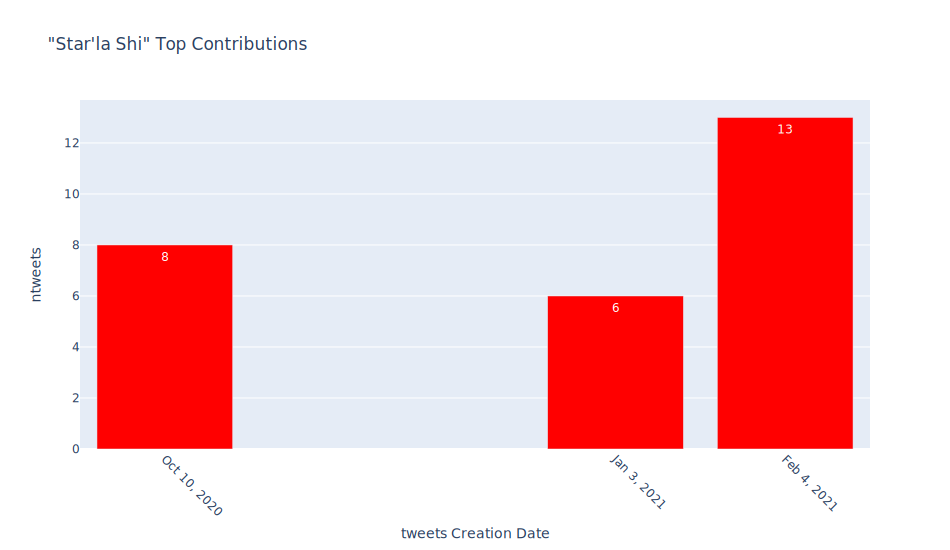

In [185]:
helpers.contr_peaks(df_tweets, "Star'la Shi", n=3, threshold=0)

In [186]:
user = "Star'la Shi"
df_tweets.query(" username == @user ").text.value_counts().head()

@mikenactor i never stfu about it. \n\nthe public court of opinion did johnny depp dirty. \n\nalso fuck amber heard. \n\nthat last part could have been classier but...no regrets.                                                                                                                                                                 1
+ have that hot hot cup of java in my hands, i will slowly drink it while just lying to myself that i was never on social media tonight/this morning...because some da-da-dumb fucker who is an amber  heard supporter; so that speaks volumes  about that person's character. +                                                                   1
growing up in the system.  bouncing  from battered women's  shelter to another shelter,  hiding,  while trying to get on our feet. a lot of my friends ended up in foster care. #amberheardisanabuser #drugabuse she has zero right to speak for these children. stop @realamberheard                                         

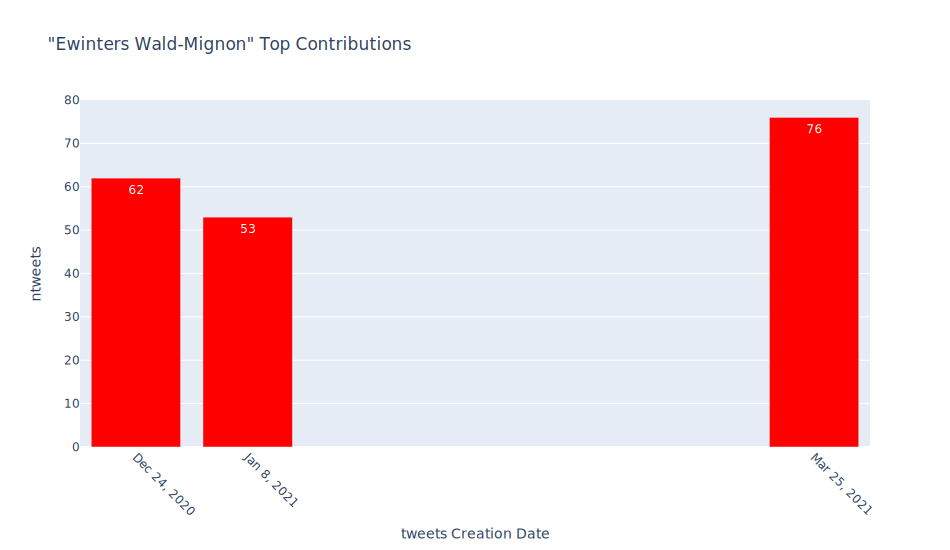

In [187]:
helpers.contr_peaks(df_tweets, "Ewinters Wald-Mignon", n=3, threshold=0)

In [188]:
df_tweets.query(" username == 'Ewinters Wald-Mignon' ").text.value_counts().head()

#justiceforjohnnydepp                               69
#johnnydepp #justiceforjohnnydepp                    5
#justiceforjohnnydepp #grantdeppappealpermission     5
#justiceforjohnnydepp #adamwaldman                   4
#cityoflies #justiceforjohnnydepp                    4
Name: text, dtype: int64

<br>

<a id='hate_speech'></a>
>## Hate-Speech tweets
> <ul>
 <li><a href="#threat_tweets">Threat tweets</a></li>
 <li><a href="#hate_speech"><b>Hate-Speech tweets</b></a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 <li><a href="#same_youtube">Same YouTube Users</a></li>
 <li><a href="#primarly">Primarly Text Investigations</a></li>
 </ul>

In [189]:
neg_text = neg_text | all_threat | hate_speech

In [190]:
len(neg_text)

168

In [191]:
print(f'{df_hate.shape[0]} contributions, made by {df_hate.username.nunique()} Users')
df_hate.head(2)

299601 contributions, made by 118517 Users


created_at                                 profile_banner_url  \
1873 2018-01-01 01:40:18  https://pbs.twimg.com/profile_banners/74497825...   
1080 2018-01-02 05:08:07  https://pbs.twimg.com/profile_banners/16627801...   

                                       user_description user_location  \
1873  a dc fan who hates dc ... who is also unactive...   themiscyira   
1080   i'm robin and being robin gives me a death wish.           NaN   

                                      profile_image_url lang  \
1873  http://pbs.twimg.com/profile_images/1385690792...   en   
1080  http://pbs.twimg.com/profile_images/1088924728...   en   

                                                   text  n_friends  \
1873  me: wow i cant belive its almost 2018 \neveryb...        543   
1080  amber heard is in rio???? bitch was in copacab...        162   

          username     user_created_at  ...            tweet_id  \
1873        sophie 2016-06-20 19:40:31  ...  947643613156134912   
1080  ⛧ hellbabe ⛧ 2010-07-13 19:30:17  ...  948058298833612801   

      user_screen_name  user_url        date  year month dayofmonth  \
1873        nightwinxg       NaN  2018-01-01  2018   Jan          1   
1080         timdrrake       NaN  2018-01-02  2018   Jan          2   

                    diff days_diff  hours_diff  
1873   559 days 05:59:47       559    05:59:47  
1080  2729 days 09:37:50      2729    09:37:50  

[2 rows x 23 columns]

### A Heat Map for the Hate-Speech tweets 


Note: The Peaks on Feb, July, Dec 2020



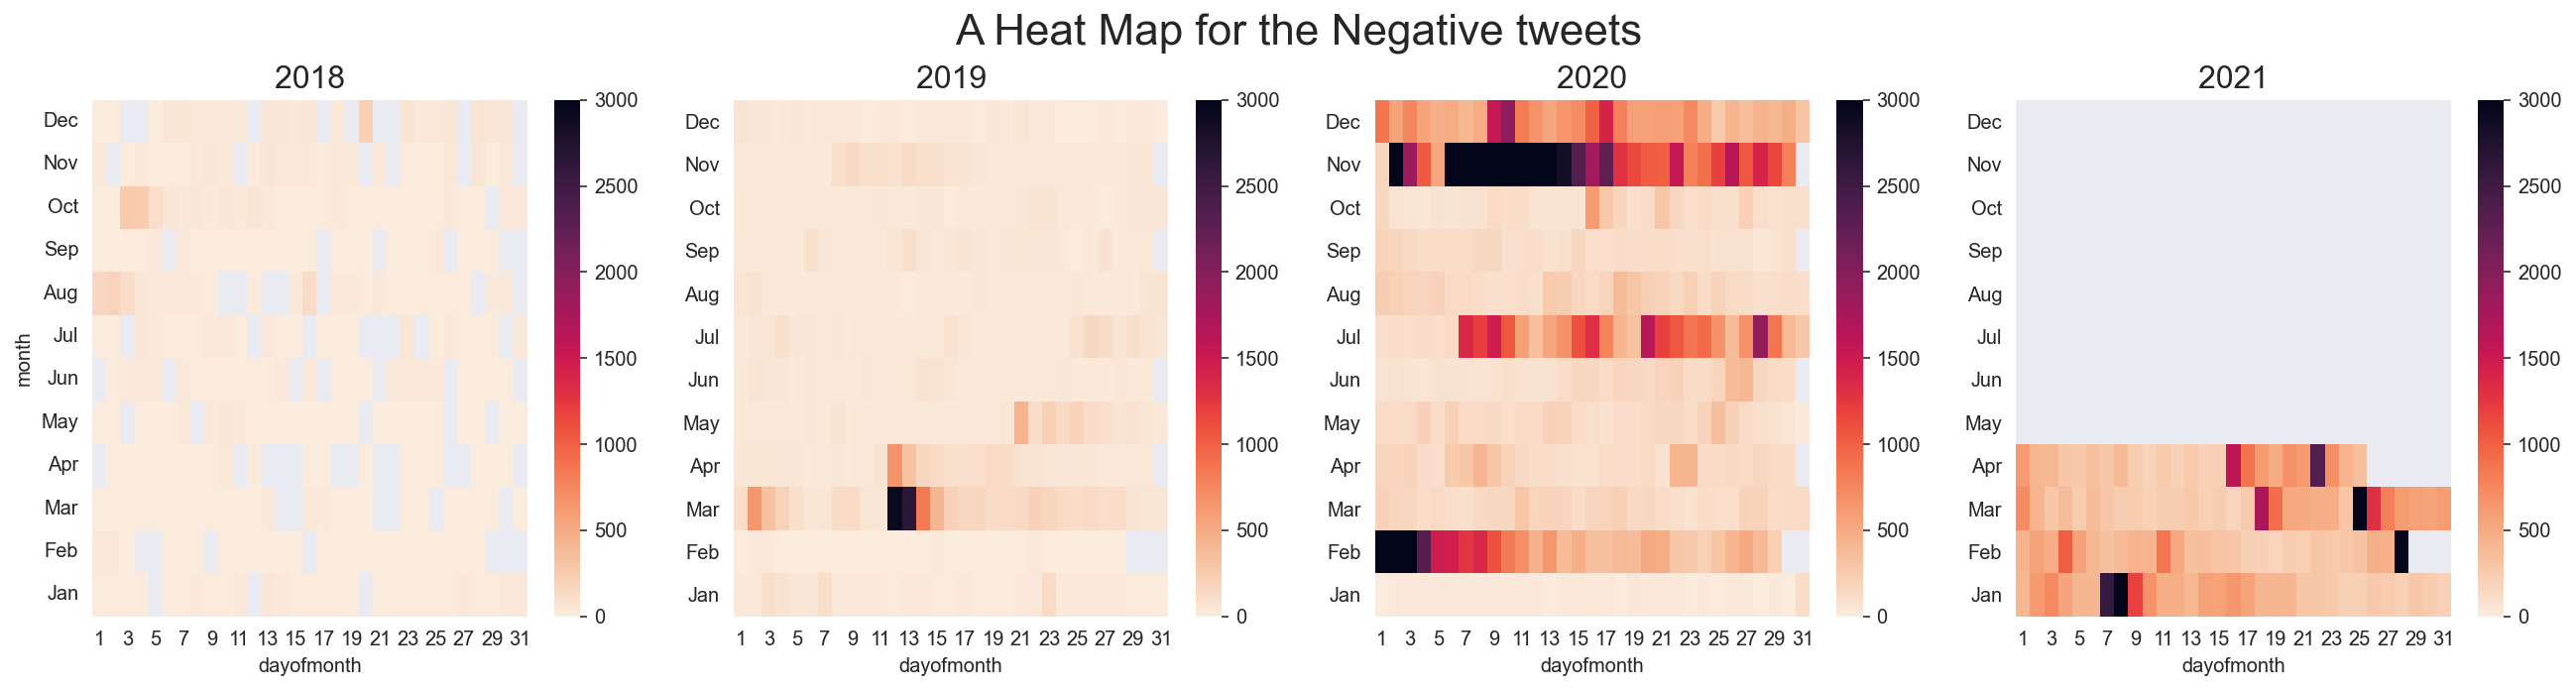

In [192]:
hate_daily = df_hate.groupby(['year', 'dayofmonth', 'month']).size().reset_index(name='ntweets')

print('\nNote: The Peaks on Feb, July, Dec 2020\n')
title = 'A Heat Map for the Negative tweets'
helpers.facet_heat(hate_daily, title, n_col=4, vmax=3000)

### Hate-Speech tweets Peak Dates

In [193]:
hate_dates = df_hate.groupby(['date']).agg({'text':'count', 'user_id': 'count'}).reset_index(
).rename(columns={'text':'ntweets', 'user_id': 'n_users'}).sort_values('ntweets', ascending=False)

hate_dates.head(15)

date  ntweets  n_users
692   2020-02-02    17211    17211
970   2020-11-06     9939     9939
971   2020-11-07     9685     9685
966   2020-11-02     7075     7075
976   2020-11-12     6390     6390
972   2020-11-08     6343     6343
973   2020-11-09     6045     6045
975   2020-11-11     5333     5333
977   2020-11-13     5210     5210
974   2020-11-10     5072     5072
693   2020-02-03     4506     4506
1033  2021-01-08     4254     4254
1109  2021-03-25     3519     3519
691   2020-02-01     3181     3181
1084  2021-02-28     2961     2961

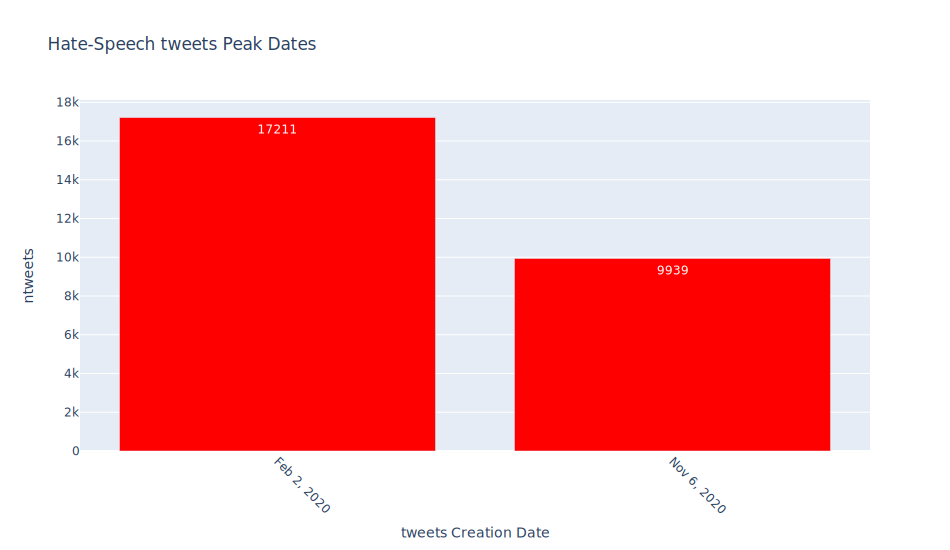

In [194]:
helpers.bar_peaks(hate_dates[['date', 'ntweets']].head(2), 
                  'Hate-Speech tweets Peak Dates')

# Most Repeated Hate-Speech tweets

In [195]:
df_hate.text.value_counts().head(60)

fuck amber heard                                                                                                                                                                                                                                                                        1819
#amberheardisanabuser                                                                                                                                                                                                                                                                   1158
#justiceforjohnnydepp #amberheardisanabuser                                                                                                                                                                                                                                             1026
#amberheardisaliar                                                                                                                               

## "i will be downvoting all your videos"

In [196]:
text0 = "i will be downvoting all your videos"
df_downvoting = df_hate[df_hate.text.str.contains(text0)]
df_downvoting.username.value_counts()

Potami    350
Name: username, dtype: int64

In [309]:
df_downvoting.head()

created_at                                 profile_banner_url  \
700910 2020-12-23 16:20:28  https://pbs.twimg.com/profile_banners/13412901...   
700909 2020-12-23 16:20:33  https://pbs.twimg.com/profile_banners/13412901...   
700908 2020-12-23 16:20:38  https://pbs.twimg.com/profile_banners/13412901...   
700907 2020-12-23 16:20:41  https://pbs.twimg.com/profile_banners/13412901...   
700906 2020-12-23 16:20:44  https://pbs.twimg.com/profile_banners/13412901...   

       user_description user_location  \
700910              NaN           NaN   
700909              NaN           NaN   
700908              NaN           NaN   
700907              NaN           NaN   
700906              NaN           NaN   

                                        profile_image_url lang  \
700910  http://pbs.twimg.com/profile_images/1341292206...   en   
700909  http://pbs.twimg.com/profile_images/1341292206...   en   
700908  http://pbs.twimg.com/profile_images/1341292206...   en   
700907  http://pbs.twimg.com/profile_images/1341292206...   en   
700906  http://pbs.twimg.com/profile_images/1341292206...   en   

                                                     text  n_friends username  \
700910  @accessonline i will be downvoting all your vi...         27   Potami   
700909  @accessonline i will be downvoting all your vi...         27   Potami   
700908  @accessonline @tayshia i will be downvoting al...         27   Potami   
700907  @accessonline i will be downvoting all your vi...         27   Potami   
700906  @accessonline @90dayfiance i will be downvotin...         27   Potami   

           user_created_at  ...             tweet_id  user_screen_name  \
700910 2020-12-22 07:51:21  ...  1341780726136619008           Potami6   
700909 2020-12-22 07:51:21  ...  1341780743819845636           Potami6   
700908 2020-12-22 07:51:21  ...  1341780765709922308           Potami6   
700907 2020-12-22 07:51:21  ...  1341780777831428098           Potami6   
700906 2020-12-22 07:51:21  ...  1341780793815949320           Potami6   

        user_url        date  year month dayofmonth             diff  \
700910       NaN  2020-12-23  2020   Dec         23  1 days 08:29:07   
700909       NaN  2020-12-23  2020   Dec         23  1 days 08:29:12   
700908       NaN  2020-12-23  2020   Dec         23  1 days 08:29:17   
700907       NaN  2020-12-23  2020   Dec         23  1 days 08:29:20   
700906       NaN  2020-12-23  2020   Dec         23  1 days 08:29:23   

       days_diff  hours_diff  
700910         1    08:29:07  
700909         1    08:29:12  
700908         1    08:29:17  
700907         1    08:29:20  
700906         1    08:29:23  

[5 rows x 23 columns]

> - **350 Tweets by the same user "Potami" within days from account creation**
> - **user_created_at:** 2020-12-22 

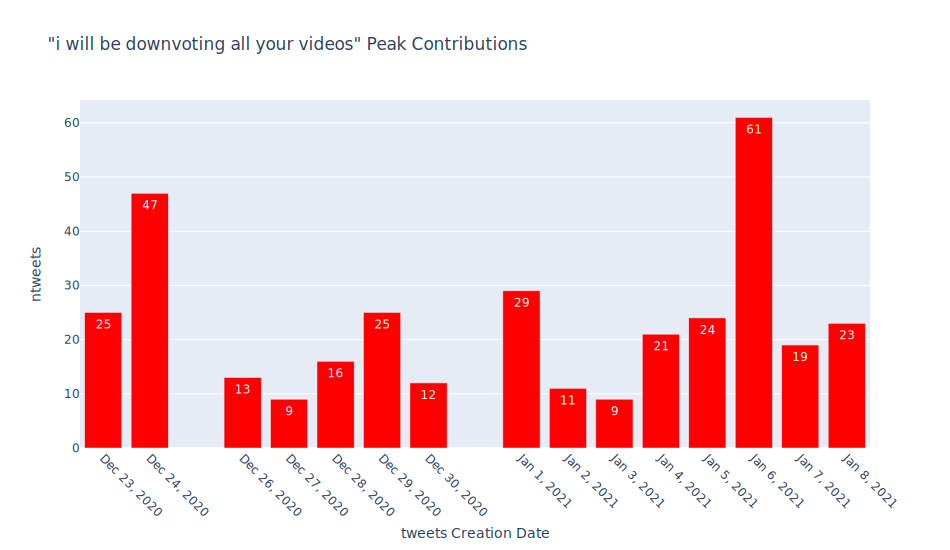

In [198]:
helpers.text_all_peaks(df_tweets, text0, n=15, threshold=0)

In [199]:
df = df_downvoting[['created_at', 'days_diff', 'hours_diff', 'text', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True).style.set_properties(**{'text-align': 'left'}))

In [200]:
df = df_downvoting[['created_at', 'days_diff', 'hours_diff', 'text', 'username']][60:].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True).style.set_properties(**{'text-align': 'left'}))

In [201]:
df_hate.text.value_counts()[60:].head(60)

#amberheardisaliar \n#amberheardisanabuser                                                                                                                                                                                                                                                      35
fuck a bitch named amber heard                                                                                                                                                                                                                                                                  34
#justiceforjohnnydepp  #amberheardisanabuser                                                                                                                                                                                                                                                    33
@wbpictures @hbomax #justiceforjohnnydepp #amberheardisanabuser                                                                

# Top Users Commented with Hate-Speech keywords

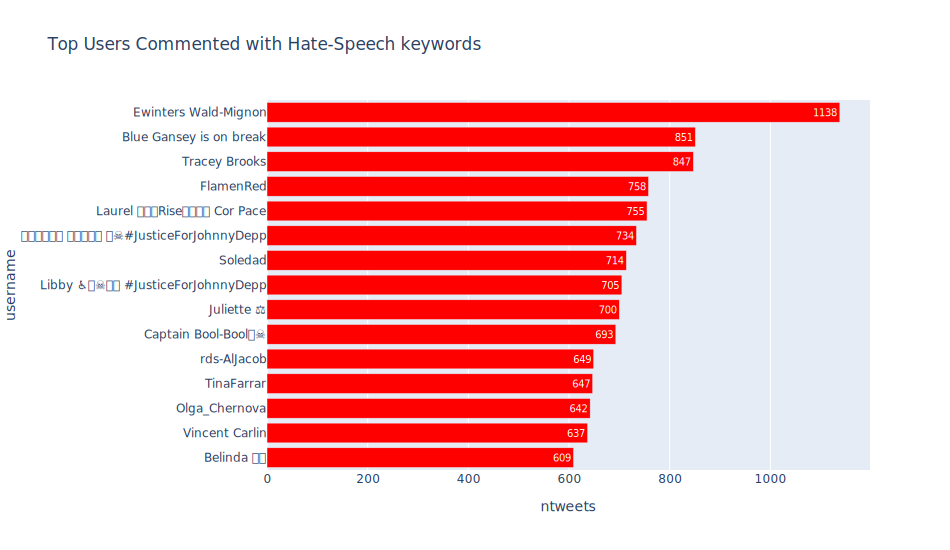

In [202]:
hate_users = df_hate.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ntweets'})
helpers.barh(hate_users.head(15), 'Top Users Commented with Hate-Speech keywords', threshold=0, c=0)

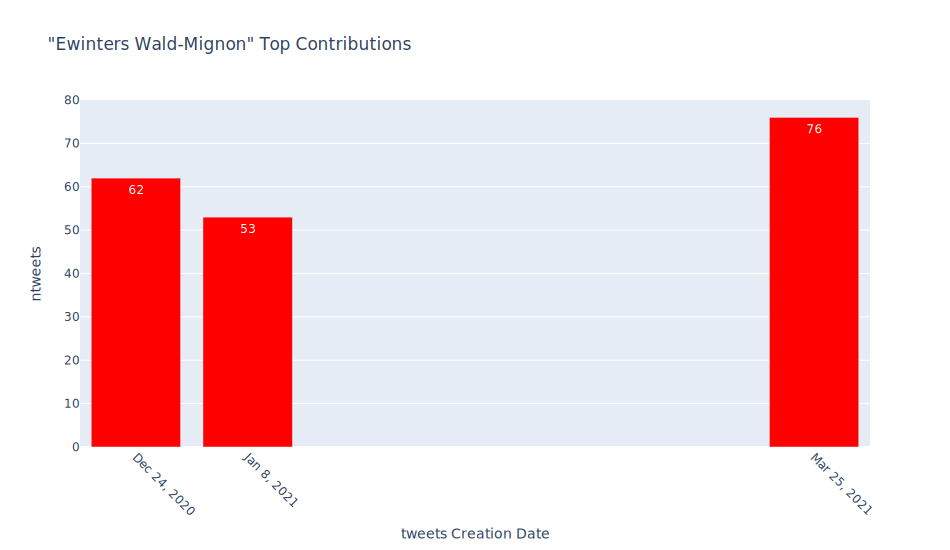

In [203]:
helpers.contr_peaks(df_tweets, "Ewinters Wald-Mignon", n=3, threshold=0)

In [204]:
df_hate.query(" username == 'Ewinters Wald-Mignon' ").text.value_counts().head()

#cityoflies #justiceforjohnnydepp                           4
#justiceforjohnnydepp #grantjohnnydeppappeal #cityoflies    3
#justiceforjohnnydepp #cityoflies                           3
#amberheardisaliar                                          3
#cityoflies #justiceforjohnnydepp #grantjohnnydeppappeal    2
Name: text, dtype: int64

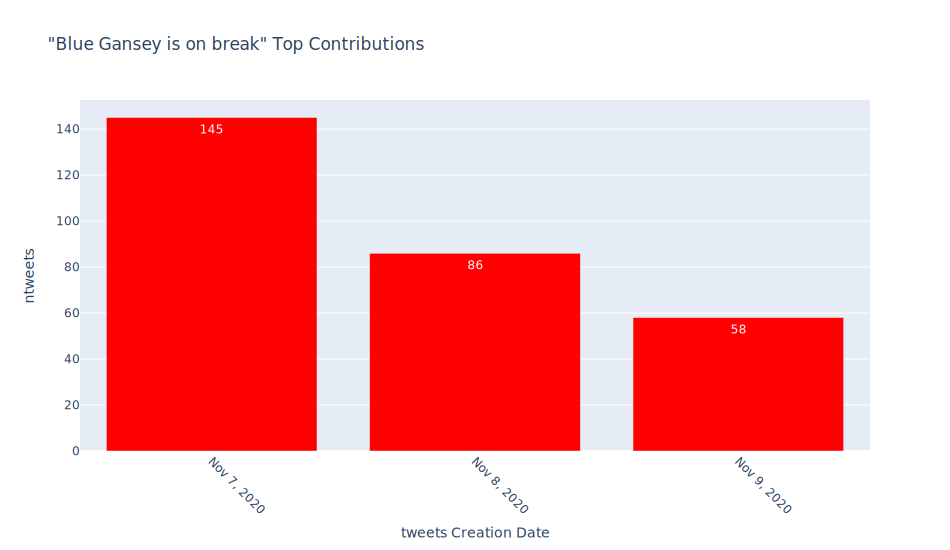

In [205]:
helpers.contr_peaks(df_tweets, "Blue Gansey is on break", n=3, threshold=0)

In [206]:
df_hate.query(" username == 'Blue Gansey is on break' ").text.value_counts().head()

#justiceforjohnnydepp #johnnydeppisgrindelwald #johnnydeppismygrindelwald #amberheardisanabuser  #amberheardisaliar \n#amberheardisoverparty \n#amberheardisawifebeater \n#amberheardyouareanabuser \n#johnnydeppisinnocent \n#shameonwarnerbros  \n#wejustdontlikeyouamber    25
#justiceforjohnnydepp #amberheardisaliar #amberheardisanabuser                                                                                                                                                                                                                 18
#boycottwarnerbrothers #boycottfantasticbeasts #justiceforjohnnydepp #amberheardisanabuser \n#johnnydeppismygrindelwald                                                                                                                                                        17
#justiceforjohnnydepp #johnnydeppisgrindelwald #johnnydeppismygrindelwald #amberheardisanabuser  #amberheardisaliar                                                               

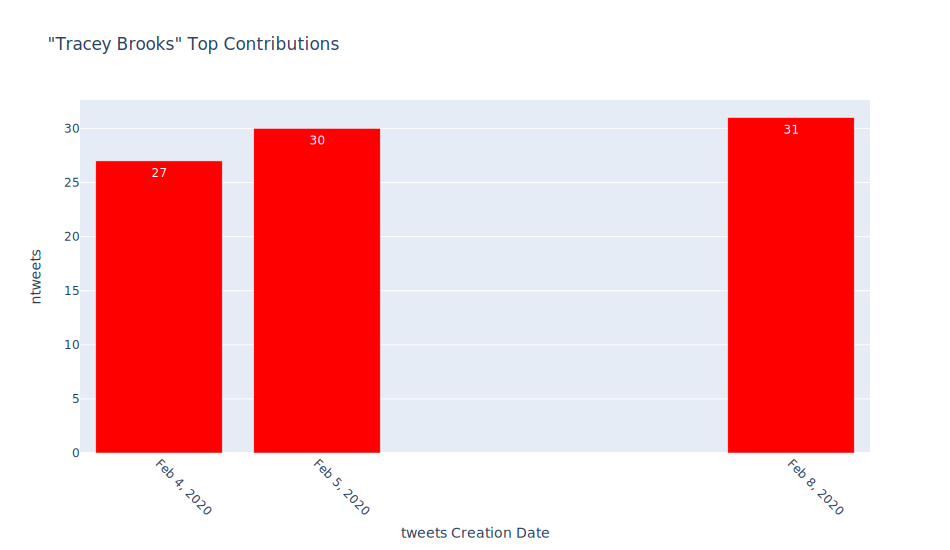

In [207]:
helpers.contr_peaks(df_tweets, "Tracey Brooks", n=3, threshold=0)

In [208]:
df_hate.query(" username == 'Tracey Brooks' ").text.value_counts().head()

#justiceforjohnnydepp #ibelievehim #amberheardisanabuser                                                                                                                                       87
#johnnydepp #johnnydeppisinnocent #ibelievehim #abusehasnogender #justiceforjohnnydepp #amberheardisanabuser #amberheardisaliar #cancelamberheard #boycottamberheard                           46
#johnnydepp #johnnydeppisinnocent #ibelievehim #abusehasnogender #justiceforjohnnydepp #amberheardisanabuser #amberheardisaliar #cancelamberheard #boycottamberheard #boycottloreal            37
#johnnydepp #johnnydeppisinnocent #ibelievehim #abusehasnogender #justiceforjohnnydepp #amberheardisanabuser #amberheardisaliar #cancelamberheard #boycottamberheard #boycottlorealparisusa    19
#johnnydeppisinnocent #ibelievehim #abusehasnogender #justiceforjohnnydepp #amberheardisanabuser #amberheardisaliar #cancelamberheard #boycottamberheard #boycottlorealparisusa                17
Name: text, dtype: int64

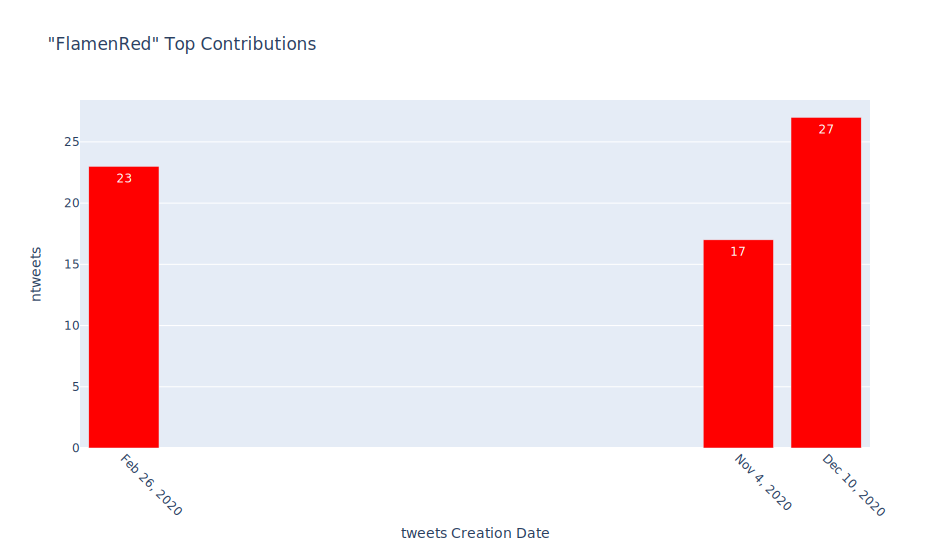

In [209]:
helpers.contr_peaks(df_tweets, "FlamenRed", n=3, threshold=0)

In [210]:
df_hate.query(" username == 'FlamenRed' ").text.value_counts().head()

#justiceforjohnnydepp #amberheardisanabuser #abusehasnogender                                              28
#justiceforjohnnydepp #amberheardisanabuser                                                                19
#abusehasnogender #amberheardisanabuser #amberheard #johnnydepp #abusehasnogender #justiceforjohnnydepp     9
#amberheardisanabuser #amberheard #abusehasnogender                                                         6
#justiceforjohnnydepp #amberheardisanabuser #amberheardisaliar                                              5
Name: text, dtype: int64

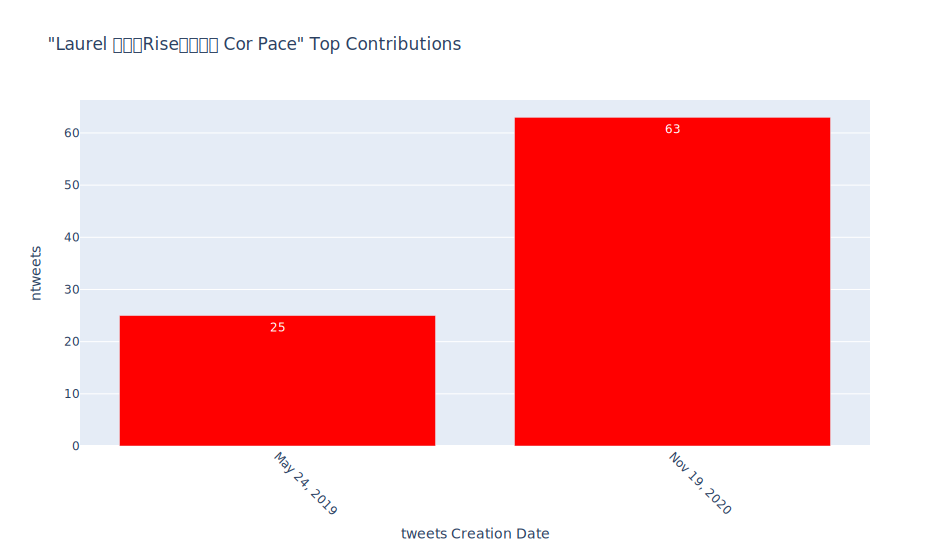

In [211]:
helpers.contr_peaks(df_tweets, "Laurel 🍩🍩🍩Rise🦇🌠🤗🌠 Cor Pace", n=2, threshold=0)

In [212]:
df_hate.query(" username == 'Laurel 🍩🍩🍩Rise🦇🌠🤗🌠 Cor Pace' ").text.value_counts().head()

new meaning to aerosmith's #love in an elevator: somebody is definitely going down 😉\n\n#rise #johnnydepp ❤❤❤ #justiceforjohnnydepp #respectforjohnnydepp #wearewithyoujohnnydepp #everystepoftheway #spreadtheword #mentoo #abuseisnotagender #truth #respect #love ❤❤❤                    2
amber heard will never represent the survivors she claims to support. once everyone opens their eyes to her abusive masterpieces, they'll appreciate the real monster speaking at the podium. \n#johnnydeppisinnocent \n#ibelievehim #istandontherightsideoftheroaringrapidswithyoujd       2
team johnny and his supporters will have the last laugh. the truth can't be changed by lies. justice is coming.\npass it on.\n #johnnydepphasevidence #johnnydeppisasurvivor #thetruthiscomingout #whoslaughingnow #justiceforjohnnydepp https://t.co/dlri3mdsd4                            2
#metoo  and #timesup  have failed to protect an actual victim of abuse #johnnydepp, but instead been instrumentalized to abuse him through mal

<br>

<a id='same'></a>
>## Same Text Same Date
> <ul>
 <li><a href="#threat_tweets">Threat tweets</a></li>
 <li><a href="#hate_speech">Hate-Speech tweets</a></li>
 <li><a href="#same"><b>Same Text Same Date</b></a></li>
 <li><a href="#same_youtube">Same YouTube Users</a></li>
 <li><a href="#primarly">Primarly Text Investigations</a></li>
 </ul>

In [213]:
df_threat.head(1)

created_at                                 profile_banner_url  \
1873 2018-01-01 01:40:18  https://pbs.twimg.com/profile_banners/74497825...   

                                       user_description user_location  \
1873  a dc fan who hates dc ... who is also unactive...   themiscyira   

                                      profile_image_url lang  \
1873  http://pbs.twimg.com/profile_images/1385690792...   en   

                                                   text  n_friends username  \
1873  me: wow i cant belive its almost 2018 \neveryb...        543   sophie   

         user_created_at  ...            tweet_id  user_screen_name  user_url  \
1873 2016-06-20 19:40:31  ...  947643613156134912        nightwinxg       NaN   

            date  year month dayofmonth               diff days_diff  \
1873  2018-01-01  2018   Jan          1  559 days 05:59:47       559   

      hours_diff  
1873    05:59:47  

[1 rows x 23 columns]

In [214]:
df_threat.date

1873      2018-01-01
1095      2018-01-02
1626      2018-01-03
1571      2018-01-03
1620      2018-01-03
             ...    
961531    2021-04-25
961530    2021-04-25
961526    2021-04-25
961522    2021-04-25
961491    2021-04-25
Name: date, Length: 51025, dtype: object

In [215]:
# print('\nThe Amplifications in the counts and number of likes on #justiceforjohnnydepp is quite obvious!!')
df_same = df_threat.groupby(["text", "date"]).agg({'tweet_id':'count'}).reset_index()
df_same.rename(columns={'tweet_id': 'ntweets'}, inplace=True)
df_same["date"] = pd.to_datetime(df_same["date"])
# to remove the 00:00:00
df_same["date"] = df_same.date.dt.date

df = df_same.sort_values(["ntweets", 'date'], ascending=[False, True]).head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True).style.set_properties(**{'text-align': 'left'}))

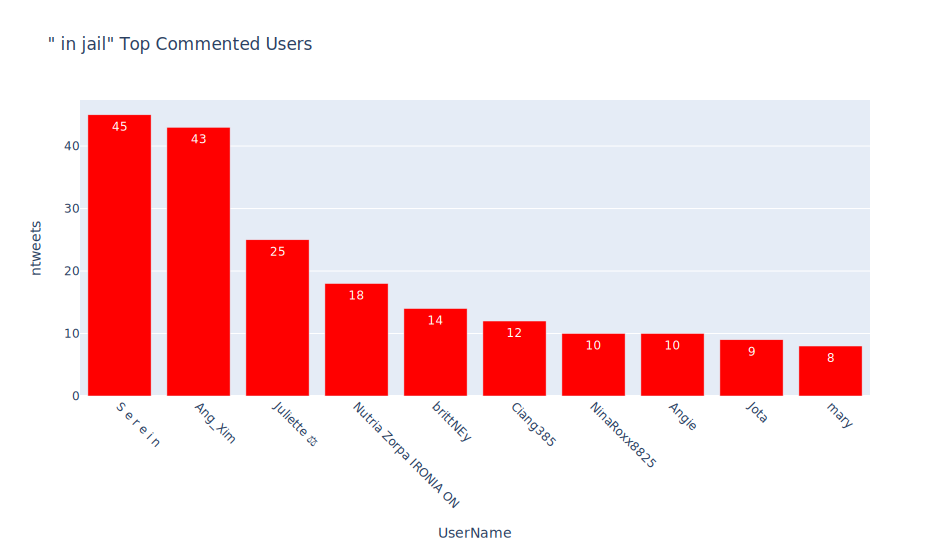

In [216]:
# importlib.reload(helpers)
helpers.users_all_peaks(df_tweets, ' in jail', n=10, threshold=0)

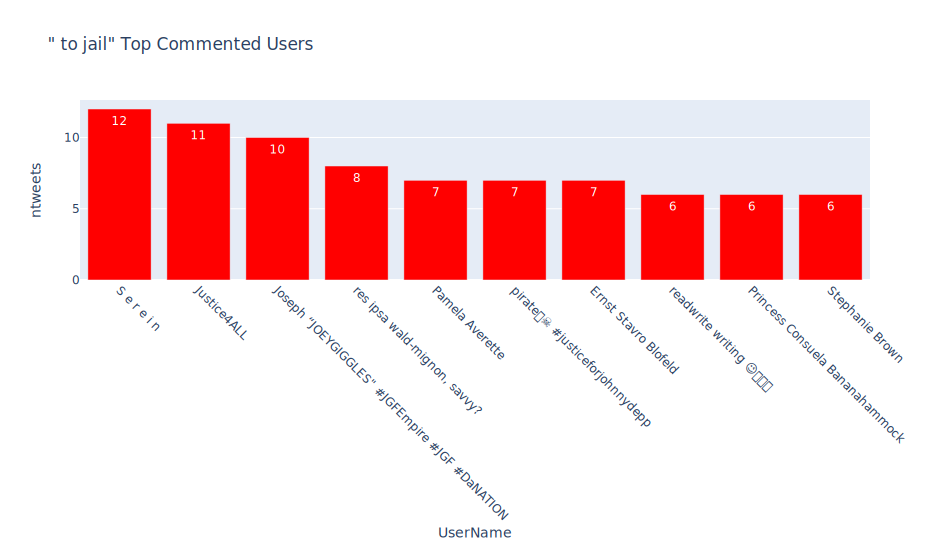

In [217]:
helpers.users_all_peaks(df_tweets, ' to jail', n=10, threshold=0)

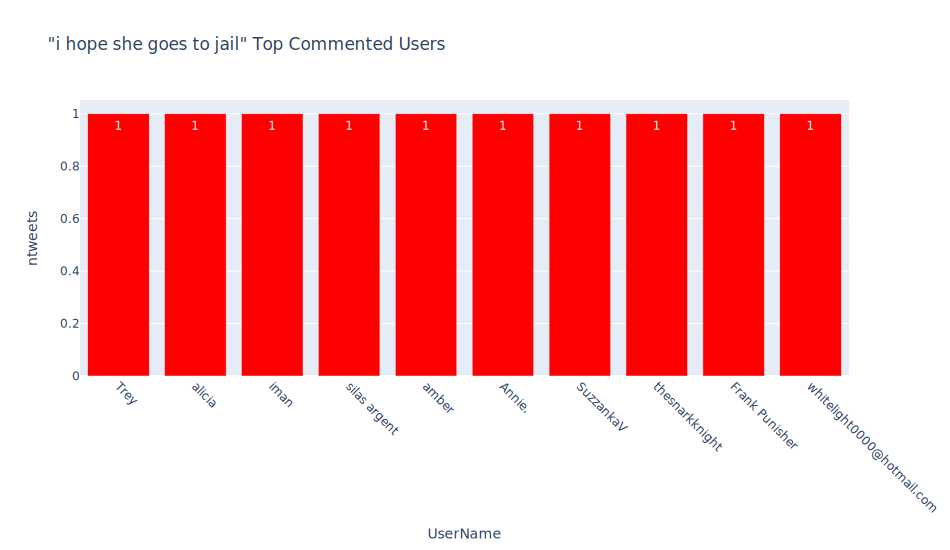

In [218]:
helpers.users_all_peaks(df_tweets, 'i hope she goes to jail', n=10, threshold=0)

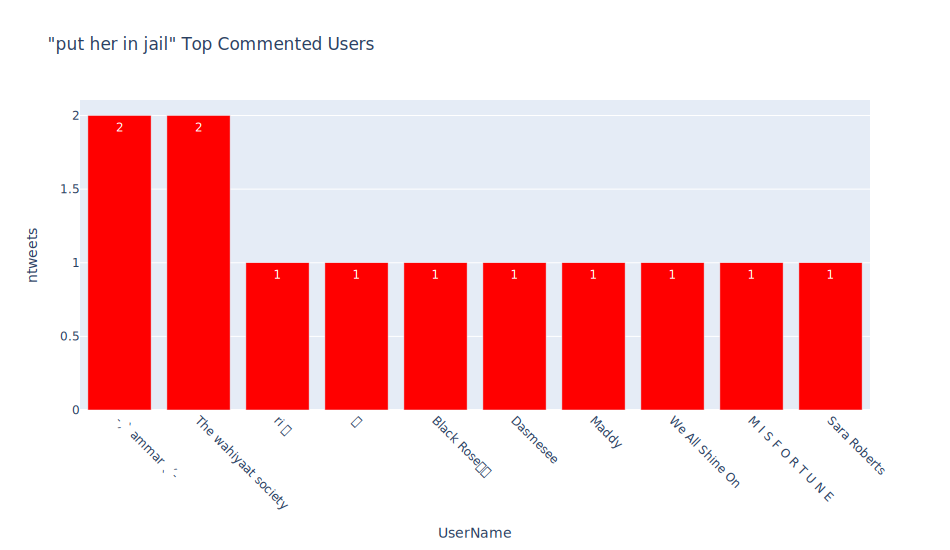

In [219]:
helpers.users_all_peaks(df_tweets, 'put her in jail', n=10, threshold=0)

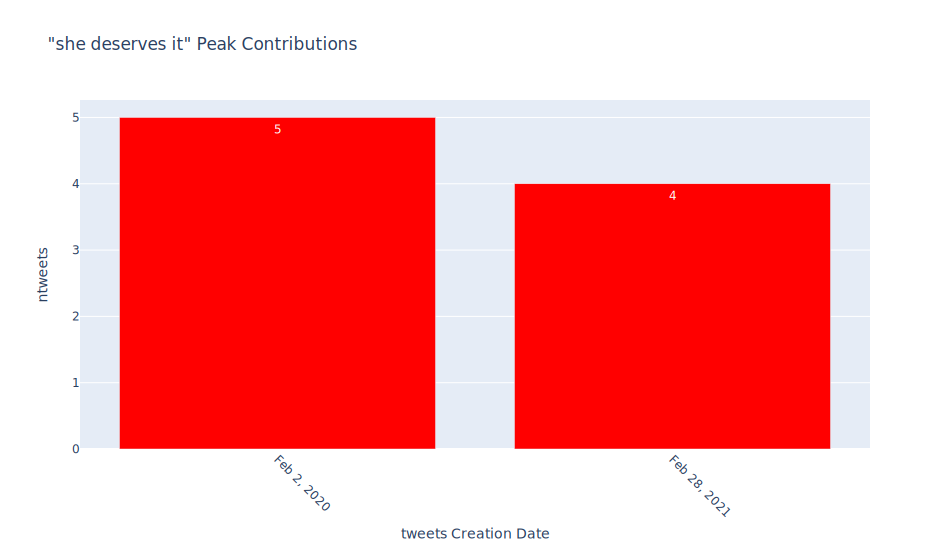

In [220]:
helpers.text_all_peaks(df_tweets, 'she deserves it', n=2, threshold=0)

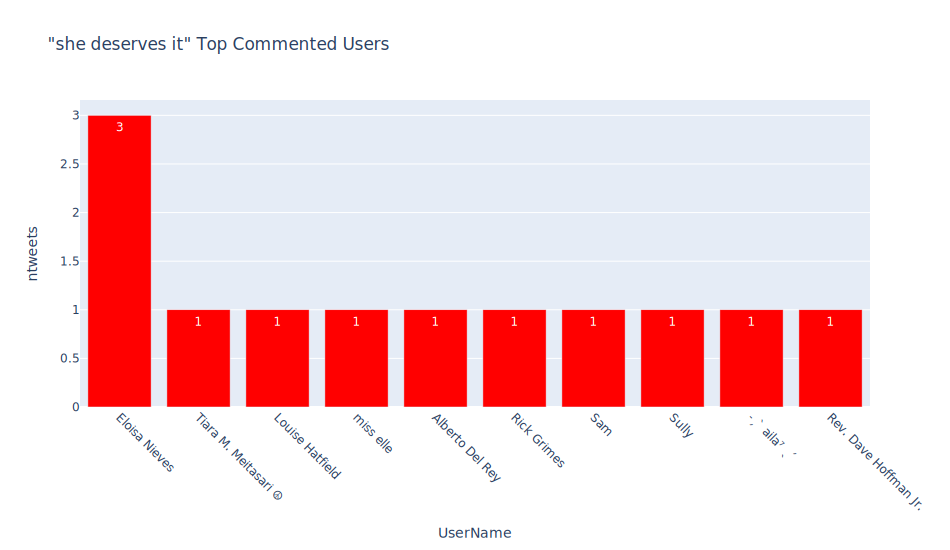

In [221]:
helpers.users_all_peaks(df_tweets, 'she deserves it', n=10, threshold=0)

### Text Contains "jail" --> 17962

In [222]:
df_all_jail = df_threat[df_threat.text.str.contains('jail')]
print(f'{df_all_jail.shape[0]} contributions, made by {df_all_jail.username.nunique()} Users')
df_all_jail.head(2)


3795 contributions, made by 2964 Users


created_at                                 profile_banner_url  \
591  2018-01-08 17:58:57                                                NaN   
1923 2018-01-31 03:40:52  https://pbs.twimg.com/profile_banners/88150238...   

                                       user_description  user_location  \
591                                                 NaN            NaN   
1923  He’s been there for everyone and he deserves J...  United States   

                                      profile_image_url lang  \
591   http://pbs.twimg.com/profile_images/8815105094...   en   
1923  http://pbs.twimg.com/profile_images/9586353146...   en   

                                                   text  n_friends  username  \
591   @iolovesyou @angb2909 video? you mean the one ...        108  goodview   
1923  @deppthroating that’s so dam true. she’s right...       1055   Rah Rah   

         user_created_at  ...            tweet_id  user_screen_name  user_url  \
591  2017-06-26 17:20:36  ...  950426613446991872       meanchi0421       NaN   
1923 2017-07-02 13:18:41  ...  958545593156202497        rocky_depp       NaN   

            date  year month dayofmonth               diff days_diff  \
591   2018-01-08  2018   Jan          8  196 days 00:38:21       196   
1923  2018-01-31  2018   Jan         31  212 days 14:22:11       212   

      hours_diff  
591     00:38:21  
1923    14:22:11  

[2 rows x 23 columns]

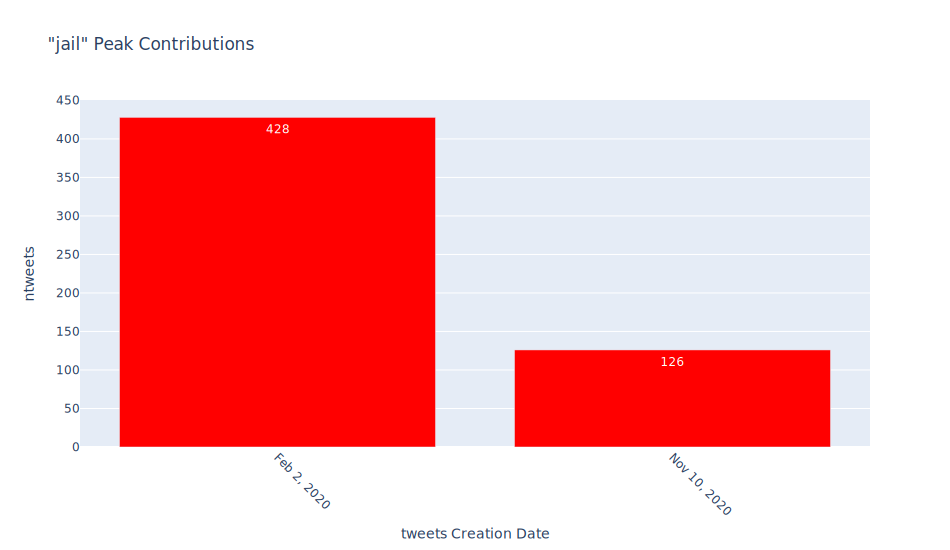

In [223]:
helpers.text_all_peaks(df_tweets, 'jail', n=2, threshold=0)

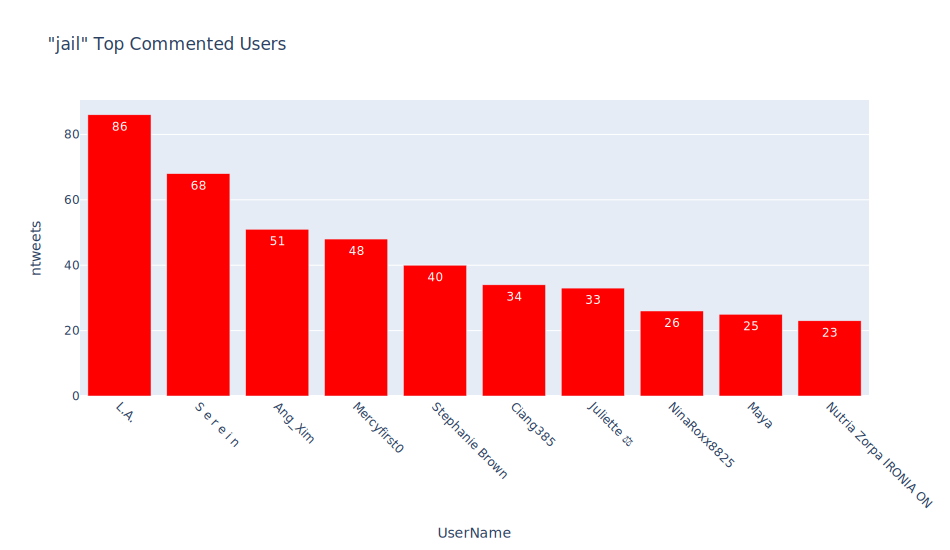

In [224]:
helpers.users_all_peaks(df_tweets, 'jail', n=10, threshold=0)

In [225]:
df_all_hell = df_threat[df_threat.text.str.contains('go to hell')]
print(f'{df_all_hell.shape[0]} contributions, made by {df_all_hell.username.nunique()} Users')
df_all_hell.head()


172 contributions, made by 166 Users


created_at                                 profile_banner_url  \
46265 2019-02-05 14:24:17  https://pbs.twimg.com/profile_banners/91919598...   
60614 2019-03-12 20:23:36  https://pbs.twimg.com/profile_banners/51929309...   
66086 2019-03-13 01:12:15  https://pbs.twimg.com/profile_banners/28707943...   
67806 2019-03-13 06:40:44  https://pbs.twimg.com/profile_banners/61933746...   
67586 2019-03-13 16:05:53  https://pbs.twimg.com/profile_banners/24352621...   

                                        user_description user_location  \
46265  #JohnnyDepp 😻 #IBelieveJohnnyDepp ❤\n#DeppHead...           NaN   
60614  Med student. Contributor. Digital marketer. Ho...      Pakistan   
66086                                             ♈︎ | 🤎         paris   
67806                            Writer, Host, VO Artist           NaN   
67586  #HomeIsHere ♡ 😎🇺🇸 #GetYourVaccineToEndCOVID19❗...      Chicago!   

                                       profile_image_url lang  \
46265  http://pbs.twimg.com/profile_images/1323749027...   en   
60614  http://pbs.twimg.com/profile_images/1383756306...   en   
66086  http://pbs.twimg.com/profile_images/1383564641...   en   
67806  http://pbs.twimg.com/profile_images/1370704282...   en   
67586  http://pbs.twimg.com/profile_images/1350254550...   en   

                                                    text  n_friends  \
46265        i just want amber heard\ngo to hell 😡😡😡😡😡😡😡       1140   
60614  amber heard and all the women who use #metoo f...        996   
66086                         amber heard can go to hell        461   
67806  amber heard can go to hell. she just made it h...        432   
67586  i got plenty of shit on twitter for defending ...        286   

                     username     user_created_at  ...             tweet_id  \
46265  Depp ☪♊ IBelieveHim 🇮🇹 2017-10-14 13:39:35  ...  1092791023862980609   
60614                   Manal 2012-03-09 08:07:47  ...  1105565022481272834   
66086            melany 🧚🏽‍♀️ 2014-11-10 16:52:31  ...  1105637665397981197   
67806            Sam Valmonte 2009-08-01 02:03:32  ...  1105720330197262336   
67586                    ☆𝕊𝕂𝕐 2011-01-27 07:05:00  ...  1105862555472416769   

       user_screen_name                 user_url        date  year month  \
46265        deppfamily                      NaN  2019-02-05  2019   Feb   
60614          meemelif  https://t.co/8y8OO0yNU3  2019-03-12  2019   Mar   
66086         jcssmelaa                      NaN  2019-03-13  2019   Mar   
67806       samvalmonte  https://t.co/1RS2VttDh4  2019-03-13  2019   Mar   
67586      ___ItsJustMe                      NaN  2019-03-13  2019   Mar   

      dayofmonth                diff days_diff  hours_diff  
46265          5   479 days 00:44:42       479    00:44:42  
60614         12  2559 days 12:15:49      2559    12:15:49  
66086         13  1583 days 08:19:44      1583    08:19:44  
67806         13  3511 days 04:37:12      3511    04:37:12  
67586         13  2967 days 09:00:53      2967    09:00:53  

[5 rows x 23 columns]

In [226]:
df_all_hell.text.value_counts().head(60)

amber heard can go to hell                                                                                                                                                                                                                                                                                  2
i just want amber heard\ngo to hell 😡😡😡😡😡😡😡                                                                                                                                                                                                                                                                 1
amber heard can literally go to hell.                                                                                                                                                                                                                                                                       1
and a big fuck you to @realamberheard for ruining the next fantastic beasts movie and slanderi

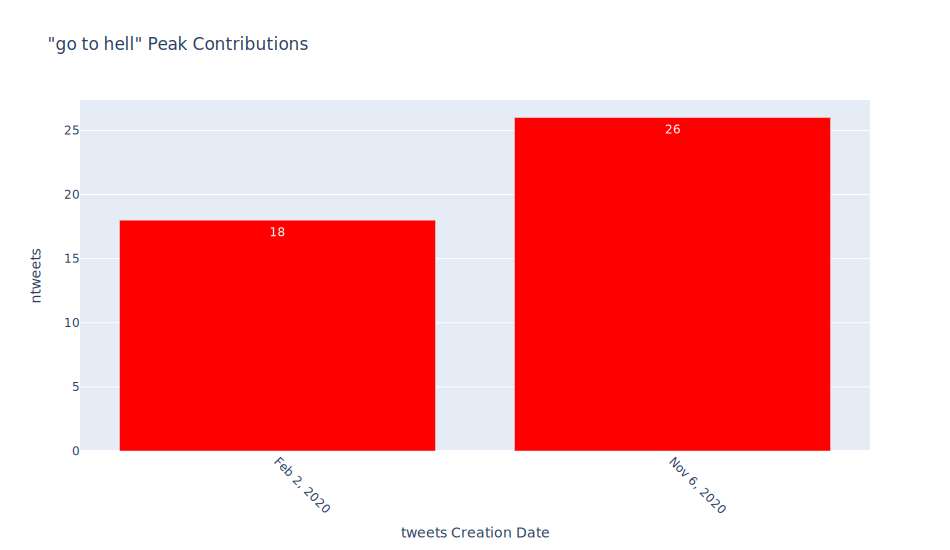

In [227]:
helpers.text_all_peaks(df_threat, 'go to hell', n=2, threshold=0)

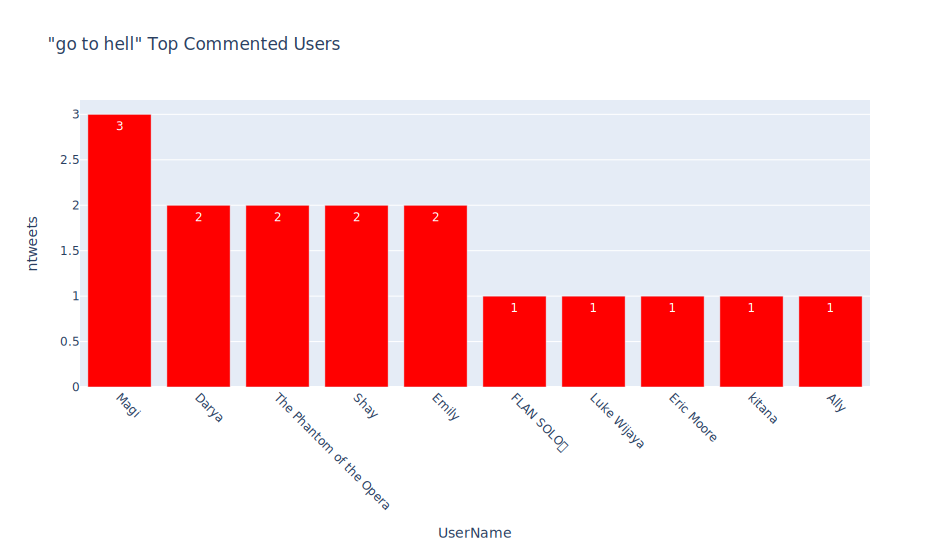

In [228]:
helpers.users_all_peaks(df_threat, 'go to hell', n=10, threshold=0)

<a id='same_youtube'></a>
> ## Same YouTube Users
> <ul>
 <li><a href="#threat_tweets">Threat tweets</a></li>
 <li><a href="#hate_speech">Hate-Speech tweets</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 <li><a href="#same_youtube"><b>Same YouTube Users</b></a></li>
 <li><a href="#primarly">Primarly Text Investigations</a></li>
 </ul>

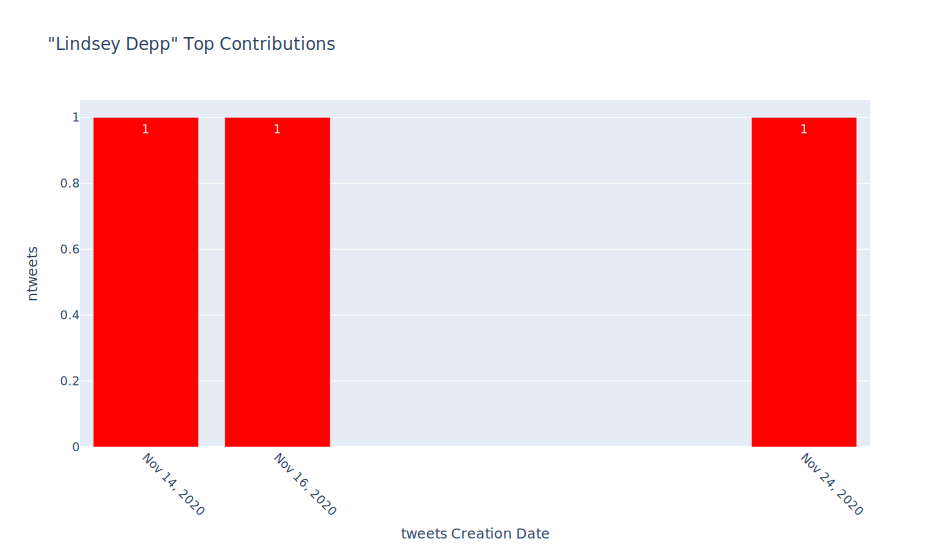

In [229]:
helpers.contr_peaks(df_tweets, "Lindsey Depp", n=3, threshold=0)

In [230]:
df_tweets.query(" username == 'Lindsey Depp' ").text.value_counts().head()

@dior dear dior regarding my husband to be's future of the amazing sauvage ad please keep him employed as the face of sauvage.  what happened in the  barrack result of his libel case against the sun and dan wootton and amber heard are just ganging up on him.    1
amber heard promises to reveal bombshell new evidence about wife beater johnny depp in us case https://t.co/vfkjsacsph, don't you fucking dare scamber you've done enough damage to my darling husband johnny career. bitch                                           1
amber heard condemns ‘paid campaign’ to remove her from aquaman sequel https://t.co/i8nbikgilk grow the fuck up amber no one fucking likes you fuck  off back texas                                                                                                   1
amber heard comments on aquaman role as johnny depp fans call for axing https://t.co/g8lvxpsawu via @metrouk  it's about time this poisonus witch is put out of her misery. so she doesn't destroy anymore lives

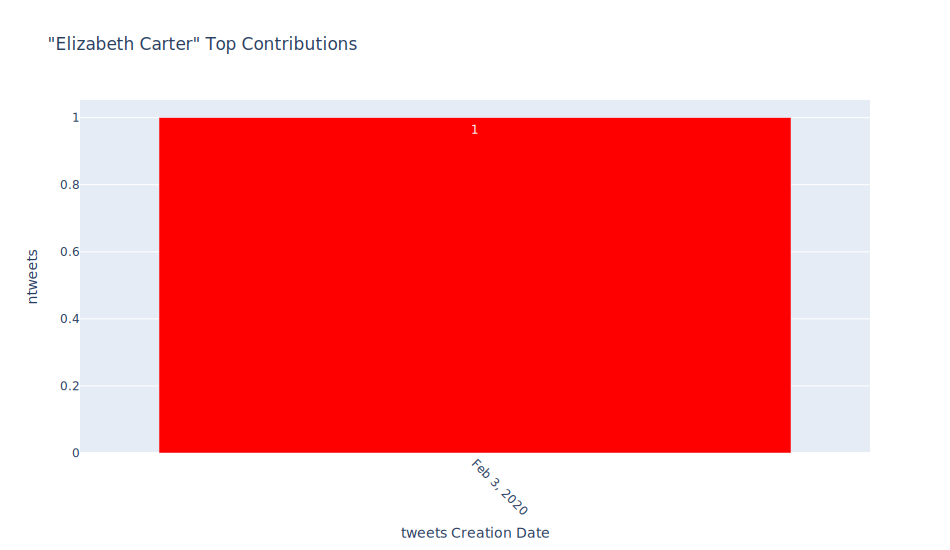

In [231]:
helpers.contr_peaks(df_tweets, "Elizabeth Carter", n=2, threshold=0)

In [232]:
df_tweets.query(" username == 'Elizabeth Carter' ").text.value_counts().head()

and the proof of domestic violence is right here. \n\namber heard you're such a jerk to what you did to johnny depp. stuff you!!!🖕😡😡😡😡    1
Name: text, dtype: int64

<a id='primarly'></a>
> ## Primarly Text Investigations
> <ul>
 <li><a href="#threat_tweets">Threat tweets</a></li>
 <li><a href="#hate_speech">Hate-Speech tweets</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 <li><a href="#same_youtube">Same YouTube Users</a></li>
 <li><a href="#primarly"><b>Primarly Text Investigations</b></a></li>
 </ul>

## NOTE: "These areas are extracted from the text to help in extracting the keywords to be used in the analysis"

- deathtoHeard
- death to amber heard
- amber heard needs to die 
- you will die a painful death and rot in hell b**ch!
- I hope amber heard dies
- I hope all of you get the karma you deserve
- amber heard can die
- amber heard, i want you to die
- amber heard literally deserves to die
- amber heard needs to die
- i can't wait for amber heard to die as an actress and social activist
- amber heard’s abusing scumbag ass is the weirdest hill to die on and brag
- heard die
- amber die
- i hope amber heard rots to death
- i hope amber heard starves herself to death
- burned to death
<br>
- kill amber
- killamber
- go kill
- kill this vampire!
- kill this bitch
- kill this amber heard bitch
- kill that princess mera
- kill that bitch
- kill that cunt
- just kill your fucking abuser.
- it will kill you
- retweet one more amber heard tweet i’ll kill you
- we all know if johnny depp doesn’t win , someone is going to be out to kill amber heard , better get your armed police baby girl you’re dead!
- accused amber heard of murder
- i will murder amber heard for breakfast
- if it was legal to murder amber heard would be 6ft in the ground
- someone please murder amber heard
- i would like to murder amber heard
- can we make it legal to murder amber heard and her fans yet?? 
- @dc_connections amber heard murdered by gal gadot we all love to see it

In [233]:
df_amber = df_tweets[df_tweets.text.str.contains('amber')]

In [234]:
death_sub = {'deathto', "death to", 'heard needs to die', 'deserves to die', 'die a painful death', 'heard die',
             'amber die', 'heard die', 'heard can die', 'amber can die', 'get the karma you deserve', 
             'rots to death', 'you to die', 'hope you die', 'chose to die', 'heard to die', 'mera to die', 
             'rots to death', 'starves herself to death', 'burned to death', 'kill amber', 'killamber', 'go kill', 
             'kill this vampire', 'kill this bitch', 'kill this amber', 'kill that princess', 'kill that bitch', 
             'kill that cunt', 'kill your fucking abuser', 'it will kill you', 'i’ll kill you', 
             'accused amber heard of murder', 'will murder amber', 'legal to murder amber', 'please murder amber', 
             'like to murder amber', 'heard murdered'}

In [235]:
threat_sub = death_sub | burn_sub | crime_sub

In [236]:
# threat_sub 

# Death, Die, Kill & Murder

In [237]:
df_tweets[df_tweets.text.str.contains('to die')].text.value_counts().head(60)

@ahrosemc @realamberheard when i found out that i have terminal cancer and i just wanted to die. amber heard was on tv talking about abuse her strength and courage gave me the strength to battle with cancer everyday                                                                                                                               1
both poki and amber heard need to die in a hole.                                                                                                                                                                                                                                                                                                      1
fuck this bitch and fuck warner bros for keeping this abuser but removing depp from fantastic beast.\ni want her career to die. \n\n#amberheardisanabuser #fireamberheard                                                                                                                                               

In [238]:
df_tweets[df_tweets.text.str.contains('heard needs to die')].text.value_counts().head(60)

@snowyboymedia i know lol. but fr tho, amber heard needs to die         1
@alanhiggins4 @realamberheard @kamalaharris amber heard needs to die    1
Name: text, dtype: int64

In [239]:
df_tweets[df_tweets.text.str.contains('hope you die')].text.value_counts().head(60)

if you’re a trophy hunter, i hope you die by the hands of the animals you’ve hunted. leave animals the fvck alone! i couldn’t even watch madagascar 2 because of the beginning. we offer you amber heard instead😖    1
amber heard, i hope you die unloved and in pain with your remains left to rot for the rest of humanity to laugh at your pathetic excuse of a woman.                                                                  1
#happybirthdayamberheard\ni hope you die in prison 🥰🥰🥰\n#justiceforjohnnydepp                                                                                                                                        1
Name: text, dtype: int64

In [240]:
df_tweets[df_tweets.text.str.contains('murder')].text.value_counts().head(60)

@nickwallis wow so an fbi agent accused amber heard of murder and extortion in the us case and literally nobody but this paralegal on youtube are talking about it.. pls share to spread awareness!!! youtube won’t promote these videos https://t.co/zrhnz8jraf                                                                                        3
@fosteraction @karenbasstweets @realamberheard @repkarenbass #amberheardisanabuser #amberheardisaliar  educate yourself  before associating with a cruel, abusive and lying person. she is sued for abuse. she almost murdered her ex-husband and is a terrible example for the youth. tell me who you hang out with and i'll know who you are !        2
@thenamesq wow so an fbi agent accused amber heard of murder and extortion in the us case and literally nobody but this paralegal on youtube are talking about it.. pls share to spread awareness!!! youtube won’t promote these videos https://t.co/zrhnz8jraf                                                     

In [241]:
df_tweets[df_tweets.text.str.contains('murder amber')].text.value_counts().head(60)

i will murder amber heard for breakfast                                                                                                                                                                                                                                                                      1
shocking: johnny depp wanted to murder amber heard and burn her corpse the news international - entertainment https://t.co/qvp6gugjyb  johnny depp sent a text to his friend paul bettany stating, "let’s burn amber heard. ”\n\nfrom the news international - … https://t.co/x8aqlqjkx3                     1
@drugproblem @ryanleone85 your side/depp’s (see how it’s done?) has been threatening to beat up and murder amber heard on social media for years. her own husband threatened to rape and murder her over his drug use! because she dared to tell the truth and shatter their captain jack fantasy/shrine.    1
was it anything like his adorable response to johnny depp’s suggestion that they murder amb

In [242]:
df_tweets[df_tweets.text.str.contains('you are dead')].text.value_counts().head(60)

@m1che11epearl @queenbpip been saying this from the get go. also you forgot to tell your friend that jd was drinking copious amounts of alcohol. when you do x you have to regulate your temperature and water consumption as your kidneys shutdown.  13 pills with alcohol? you are dead. #justiceforjohnnydepp    1
at this point if you read tabloids you are dead to me. #justiceforjohnnydepp                                                                                                                                                                                                                                        1
@todotired you are dead-on with this! i am a dv survivor &amp; you ate absolutely correct. i thought the same thing seeing these clips - #nowayisamberheardavictim #amberheardisanabuser                                                                                                                            1
just unfollowed someone i really like because of her terrible take abo

In [243]:
df_amber[df_amber.text.str.contains('kys')].text.value_counts().head(60)

amber heard talks feminism, manhood and hollywood. https://t.co/ham8mr0kys https://t.co/urrrctcnsl                                                                                                                                                                                                                                                                                     1
@kaplanrobbie #ibelieve #amberheardisanabuser https://t.co/hkysyvafuv                                                                                                                                                                                                                                                                                                                  1
@vikkysrosenmond @flippsnews es geht ja aber mehr darum, dass es unglaublich lächerlich ist johnny depp zu feuern, welcher, stand jetzt meines wissens, sogar unschudligerer ist, aber amber heard geschieht nichts. \namber heard feuern zu wollen is

In [244]:
df_tweets[df_tweets.text.str.contains('kill amber')].text.value_counts().head(60)

oi america, that politician who wanted to kill amber heard’s dogs is caught up in a massive scandal https://t.co/r5h3e785ch                                                                                                                                                                                                                          1
fuck megan good, marry rihanna, kill amber heard                                                                                                                                                                                                                                                                                                     1
dear god, please kill amber heard. that’s all i ask of you🥺                                                                                                                                                                                                                                                               

In [245]:
df_tweets[df_tweets.text.str.contains('killamber')].text.value_counts().head(60)

#justiceforjohnnydepp \n#killamberheard https://t.co/amkmgrcqsc                                                                                                                                                                                                                     1
@spookqween no one said anything about who i was? you said i haven’t spoke up bout depp but yet i literally just told you why..... that’s not the point though. the point was bout amber heard #boycottamberheard #killamberheard #amberhearddeservesdeath #amberheardneedstodie    1
Name: text, dtype: int64

In [246]:
df_tweets[df_tweets.text.str.contains('kill heard')].text.value_counts().head(60)

Series([], Name: text, dtype: int64)

In [247]:
df_tweets[df_tweets.text.str.contains('kill her')].text.value_counts().head(60)

amber heard says she feared johnny depp would kill her, denies drug use claims https://t.co/4vxrqjpikk via @justjared                                                                                                                                                                                             2
amber heard says johnny depp threatened to kill her https://t.co/s9lkuygek1                                                                                                                                                                                                                                       2
amber heard alleges she was afraid johnny depp was going to kill her https://t.co/xib1nmmkgk via @variety                                                                                                                                                                                                         1
amber heard tells court she feared depp would kill her https://t.co/1gmohktd

In [248]:
df_tweets[df_tweets.text.str.contains('to kill ')].text.value_counts().head(60)

“ you are fucking killing me. your f**king people are trying to kill me. you've turned me into a.... \nmy boy has to go to school, my boy goes to school and has kids go 'so your f**king dad's a wifebeater'? you don't think about that amber? “ \n\n- johnny depp \n#justiceforjohnnydepp    4
amber heard tried to kill johnny depp and people still support her. amber heard tried to kill johnny depp and people still support her. amber heard tried to kill johnny depp and people still support her. amber heard tried to kill johnny depp and people still support her.                 3
3 days to kill official trailer #1 (2014) - kevin costner, amber heard m... https://t.co/f4hdcgkerl via @youtube                                                                                                                                                                                2
amber heard says johnny depp threatened to kill her https://t.co/s9lkuygek1                                                       

In [249]:
df_tweets[df_tweets.text.str.contains('kill')].text.value_counts().head(60)

johnny depp contacted mrsa three times as a result of abuse by amber heard.\nmrsa is a serious infection in the body that antibiotics can't always help. \nmrsa can kill.\nthat said:\njohnny depp could have died because of abuse by amber heard.\n#justiceforjohnnydepp \n\npass it on.                                              19
“ you are fucking killing me. your f**king people are trying to kill me. you've turned me into a.... \nmy boy has to go to school, my boy goes to school and has kids go 'so your f**king dad's a wifebeater'? you don't think about that amber? “ \n\n- johnny depp \n#justiceforjohnnydepp                                             4
amber heard tried to kill johnny depp and people still support her. amber heard tried to kill johnny depp and people still support her. amber heard tried to kill johnny depp and people still support her. amber heard tried to kill johnny depp and people still support her.                                                          3
@warner

In [250]:
df_tweets[df_tweets.text.str.contains('kill you')].text.value_counts().head(60)

@jvfriedman as they always are. but like my sister said this morning: kill your darlings. hold these assholes responsible. our adoration is not a get out of jail free card for being a monster. we saw this with johnny depp. we can't let chloe become amber heard.                                                     1
sweeney todd is a psychopath who can explode anytime unpredictable. he’s full of anger. you never know will he kill you or not. not my fave character cos i always scared to see him but that’s proving johnny is amazing in portraying this character #johnnydepp #justiceforjohnnydepp https://t.co/zciq7bcic3          1
@zacksnyder you trying to kill your movie by bringing back amber heard?                                                                                                                                                                                                                                                   1
@fabricationsmm @realamberheard not just the materia

In [251]:
df_tweets[df_tweets.text.str.contains('kill that')].text.value_counts().head(60)

amber heard is cancelled. i hope aquaman 2 will take her out from the film. kill that princess mera (although i love her so much 😭) but that abuser is damn cancelled.                                                                                                    1
captain jack sparrow abused by his wife?? what the f*ck???!!!! kill that bitch!!! #justiceforjohnnydepp                                                                                                                                                                   1
@strikeforcekid @nypost if i had my finger mutilated, contracting a decease 3 times burnt cigars on my face and more i would've already kill that twat. #justiceforjohnnydepp #amberheardiscancelled #amberheardisaliar #recastmera #aquaman2                             1
@discussingfilm i would love to watch the stand, but i will probably get so triggered the minute the abuser amber heard shows up with her mediocre acting skill that it isn't worth watching it. htt

In [252]:
df_tweets[df_tweets.text.str.contains('kill this')].text.value_counts().head(60)

can someone kill this bitch, amber heard?                                                                                                                                                                                                                                                                                        1
to anyone who posted a video, wrote an article, or intentionally went to kill this mans career: you need to publicly apologize now. women can be abusers too and if y’all want equality you need to stick up for the men who have been victims too. #justiceforjohnnydepp                                                        1
i wanna kill this amber heard bitch. protect johnny depp at all cost                                                                                                                                                                                                                                                             1
@roarquette you haven't exagger

In [253]:
df_tweets[df_tweets.text.str.contains('go kill ')].text.value_counts().head(60)

amber heard!! u monster!!!! do us a favor and go kill yoself!! where did u get that audicity earning a job in hollywood after claiming to be a victim of violence? mamatay kanang animal ka!!!! \n#justiceforjohnnydeep #amberheardisaliar #amberheardabusedjohnnydepp    1
@gellertdepp amber heard doesn't care how many people has told her to go kill herself; she only cares about what people think of her only in the sense of what it can do for her or how it can fulfill her own greedy needs.                                              1
Name: text, dtype: int64

In [254]:
df_amber[df_amber.text.str.contains('diecunt')].text.value_counts().head(60)

Series([], Name: text, dtype: int64)

In [255]:
df_tweets[df_tweets.text.str.contains('burned to death')].text.value_counts().head(60)

cage plays a new orleans p.d. lieutenant who attempts to save the son of the devil and his ship is sunk and his crew is terrorized by sharks. in the end, he stung by bees and burned to death. amber heard costars.    1
cage plays an lapd lieutenant who tries to defeat a former bank heist accomplice and takes down the mob. in the end, he stung by bees and burned to death. amber heard costars.                                         1
Name: text, dtype: int64

In [256]:
df_amber[df_amber.text.str.contains('die heard')].text.value_counts().head(60)

amber heard hat ballettuntericht am 6.april, aber ihre füsse wurden im märz durch glas völlig zerschnitten. nun, das ist nur eine der verschiedenen geschichten, die heard vom märz in australien erzählt.                                                                     1
amber heard hat den schlafenden johnny depp fotografiert, das bild dem gericht vorgelegt und viele solcher photos an die medien verkauft. die heard, die öffentlich darüber schimpft, das bilder von berühmtheiten ohne ihre erlaubnis in den medien erscheinen. heuchlerin    1
Name: text, dtype: int64

In [257]:
df_amber[df_amber.text.str.contains('die amber')].text.value_counts().head(60)

@coramelodie amber heard: “tell the world, johnny, tell them, johnny depp, i, a man, i'm a victim too of domestic violence. and see how many people believe or side with you."                                                                                                                                                                       2
@cwroehl die amber heard kam elon teurer als die model 3 produktion                                                                                                                                                                                                                                                                                  1
@coramelodie amber heard is making everything to stop the trial.... she doesnt want it                                                                                                                                                                                                                                    

In [258]:
df_amber[df_amber.text.str.contains('go die')].text.value_counts().head(60)

amber heard can go die 🙅🏻‍♂️                                                                                                                                                                                                                                                                              1
johnny depp fanpage: proof amber heard is an abuser. btw all the proof came from random pics i made up.\n\nall of y’all: ur right. amber heard go die in hell. johnny depp i love u lemme suck ur dick 😔                                                                                                  1
amber heard n pretty.. but thinking of her abuse to johnny depp.. pfff go die amber                                                                                                                                                                                                                       1
good morning to everyone except to amber heard she can go die in a fucking ditch                    

In [259]:
df_amber[df_amber.text.str.contains('heard die')].text.value_counts().head(60)

machete kills fight scene (amber heard dies) https://t.co/kwmiq8vtn3 vía @youtube                                                                                                                                                                                                                                          1
@flonashton i was replying to a guy who said that he wanted to sew amber heard die in the dceu and so i replied with this moment in flashpoint paradox, one where wonder woman kills mera                                                                                                                                  1
@haltdiefressex amber heard die dumme fodse                                                                                                                                                                                                                                                                                1
zombieland is one of the best movies. here's why:

In [260]:
df_amber[df_amber.text.str.contains('amber die')].text.value_counts().head(60)

@nos ff rectificeren.\nin het journaal net over johhny depp.\nwinona en vanessa getuigen voor johhny depp niet tegen hem.\nomdat amber heard hem beschuldigd waar zijn ex vrouw en vriendin zich absoluut niet in kunnen vinden.\nooit de tapes gehoord? \namber die johhny slaat en uitlacht    1
Name: text, dtype: int64

In [261]:
df_amber[df_amber.text.str.contains('die')].text.value_counts().head(60)

@headieone amber heard                                                                                                                                                                                                                                                                                                                      46
johnny depp contacted mrsa three times as a result of abuse by amber heard.\nmrsa is a serious infection in the body that antibiotics can't always help. \nmrsa can kill.\nthat said:\njohnny depp could have died because of abuse by amber heard.\n#justiceforjohnnydepp \n\npass it on.                                                  19
@headieone amber heard.                                                                                                                                                                                                                                                                                                                   

In [262]:
df_tweets[df_tweets.text.str.contains('deathto')].text.value_counts().head(60)

dear christians, these are the kind of pests you defend when you say “only a coward hits a woman”.\nthese are the vermin you speak of when you say: #believewomen\namber heard should be locked up. preferably in a cell of violent offenders.\n#justiceforjohnnydepp #deathtoamberheard https://t.co/rwdivzxp7l    1
@324_b21 @grumpyyetamusin @deathtodickens he didn't, she was exposed as having lied about it and was the actual abuser...like are ya'll living under a rock? i swear, why do you think the hastags\n#justiceforjohnny \n#amberheardisanabuser  trended?                                                             1
@lyttlewyng you didn't exist.\nyou don't exist.\nyou're not there.\nyou're not there.\nyou are a f---ing made up thing in my head.\n\nif it isn't quite true already, it certainly won't be long before #amberheardisirrelevant.\n\n#likedeathtonarcissists\n#justiceforjohnnydepp                                  1
@dccomicsonfilm @rhafaelaseo @aquamanbrasil @aquamantalk @centralaquam

In [263]:
df_tweets[df_tweets.text.str.contains('death to')].text.value_counts().head(60)

@ssupergay are you out of your mind?.did you even bother to read the article?. and also here are his court documents.https://t.co/uxvj9quxqy .more women will testify that they were abused by amber heard. stop trying to silence victims and wishing death to people!!!. https://t.co/olcozulfwz                                                 1
@jfwong @anaheimyet @sklumos amber heard´s fans are the  toxic fandom, they have been bullying johnny depp´s kids for years, lily-rose and jack,they wished death to johnny, they bullied every person who posted a picture online with him and they declared him guilty the first day without a trial.                                            1
we don't wish death to ms nobody, what we wish is for her to pay for her crimes, to be held accountable for everything she did against all her victims. we wish for justice, accountability and karma.\n#justiceforjohnnydepp #amberheardisanabuser                                                                           

<br>

# Hell & Burn

In [264]:
burn_sub =  {'rots in', 'burn amber', 'burns in', 'burn in', 'burn the witch', 'burn the hell', 'burn the devil', 
             'deserves burned in', 'should be burned in', 'in hell', '#burninhellambitch', 
             '#amberhearddeservestoburninhell', '#amberheadrotinhell', '#rotinhellamber', '#amberheardgotohell', 
             '#gotohellamber', '#amberheardgoingtohell', '#tohellwithamber', 'deserves hell', 'going to hell', 
             'go to hell', 'goes to hell', 'to hell with her', "to hell with amber", 'go straight to hell', 
             'pits of hell', 'pit of hell', 'parts of hell', 'depths of hell', 'level of hell', 'levels of hell',
             'circle of hell'}

- burns in hell
- burn in hell
- burn the witch
- burn the hell
- burn the devil
- burn amber
- she's a evil, psychopathic bitch!! she deserves burned in the hell!
- bitch you should be burned in hell

In [265]:
df_tweets[df_tweets.text.str.contains('burn heard')].text.value_counts().head(60)

Series([], Name: text, dtype: int64)

In [266]:
df_tweets[df_tweets.text.str.contains('burn turd')].text.value_counts().head(60)

Series([], Name: text, dtype: int64)

In [267]:
df_tweets[df_tweets.text.str.contains('burn her')].text.value_counts().head(60)

#justiceforjohnnydepp \nwhat hell amber thinks she did??\nburn her!!!!! https://t.co/pzxsfapige                                                                                                                                                                                                                                         1
i have a good feeling johnny will win his defamation suit in va against amber heard this time. she’s going into a real unbiased court now. the judge is already denying things amber asked for. i hope they burn her a** up in court.  i can’t wait for this one. she should be worried                                                 1
amber heard is a witch burn her                                                                                                                                                                                                                                                                                                         1
i think no

In [268]:
df_tweets[df_tweets.text.str.contains('burn amber')].text.value_counts().head(60)

one article says this happened and were ready to burn amber heard at stake. have some shame                                                                                                                                                                                                                              1
@thenamesq it’s after 3 am here in san francisco and i’m literally trying not to fall asleep and not miss this because i want to hear him burn amber heard                                                                                                                                                               1
"johnny depp is a wife beater." so says a british court.  read what i wrote 4 years ago on our bias confirmation, and the update on the british court's ruling and the details of depp texting paul bettany he wanted to drown and burn amber heard: https://t.co/z5w6qam5tg                                             1
can we burn amber heard                                

In [269]:
df_tweets[df_tweets.text.str.contains('burn the')].text.value_counts().head(60)

https://t.co/rudwrqcysh pistol and boo, and johnny depp @realdepp, and amber heard (who for the record are no longer 'partners' under the @turnbullmalcolm definition) must be loving the thought of @barnaby_joyce standing in dog shit. burn the shoe, and the smell still lingers.                                       1
i will never watch anything amber heard stars in nor will i ever buy any product she endorses... and i know for a fact i wont be the only one... anyone who hires that thing might aswell burn their money                                                                                                                  1
@warnerbros @wbpictures i swear to god i’ve never pirated a movie in my life but if this shit keeps up with johnny i’m going to personally download the new aquamarines sequels, burn them on cds, and just give them away for free. #justiceforjohnnydepp                                                                  1
@endingthings yeah, joking with his best frien

In [270]:
df_tweets[df_tweets.text.str.contains('burned in')].text.value_counts().head(60)

they really have amber heard on here like her names not about to be burned in the industry                                                                                                                                                                                                                         1
amber heard unicorns and rainbows- nothing to see…: https://t.co/u3f49xlowv i have eperienced physical abuse on more than one occasion and i have ptsd because of it. those events become burned in your mind and i can still give a blow by blow of those events. amber heard is lying                            1
omfg  she's a evil, psychopathic bitch!! she deserves burned in the hell! #justiceforjohnnydepp                                                                                                                                                                                                                    1
i never believe amber whenever the first day that she started to told abo

In [271]:
df_tweets[df_tweets.text.str.contains('burn')].text.value_counts().head(60)

amber heard burned by the sun - depp winning at closing! https://t.co/sjjv762i25 via @youtube                                                                                                                                                                                                                                       2
i hate amber heard with a burning passion                                                                                                                                                                                                                                                                                           2
i hope amber heard burns in hell                                                                                                                                                                                                                                                                                                    2
and the victims burn p

- in hell
- i hope amber heard rots in hell  
- amber heard can rot in hell
- there’s a special place in hell for amber heard
- amber heard deserves hell
- #burninhellambitch
- #amberhearddeservestoburninhell
- #amberheadrotinhell
- #rotinhellamber
<br>
- #amberheardgotohell
- #gotohellamberturd
- #tohellwithamber
- #gotohellamberheard
- #amberheardgoingtohell
- amber heard is going to hell
- hope amber heard goes to hell
- amber heard can go to hell
- to hell with her
- to hell with amber heard
- i hope amber terd is eternally on the go straight to hell
<br>
- amber heard i hope you rot in the deepest pits of hell.
- amber heard is going to the deepest parts of hell
- fuck amber heard i hope she rots in the deepest depths of hell
- i hope amber heard goes to the top level of hell
- i hereby banish amber heard to the deepest, the hottest pits of hell.
- the deepest circle of hell is reserved for amber
- deepest levels of hell
- i hope amber heard burns in the pits of hell
- i hope amber heard rots in the lowest circle of hell
- drag this bish to the depths of hell
- all i hope, is that you get what you deserve and burn in the furthest pit of hell

In [272]:
df_tweets[df_tweets.text.str.contains(' hell')].text.value_counts().head(60)

i hope amber heard rots in hell                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 7
amber heard can rot in hell                                                                                                                                                                                                                                                                                                                                                                           

In [273]:
df_tweets[df_tweets.text.str.contains('in hell')].text.value_counts().head(60)

i hope amber heard rots in hell                                                                                                                                                                                                                                                             7
amber heard can rot in hell                                                                                                                                                                                                                                                                 4
amber heard can rot in hell.                                                                                                                                                                                                                                                                3
there’s a special place in hell for amber heard                                                                                               

In [274]:
df_tweets[df_tweets.text.str.contains('inhell')].text.value_counts().head(60)

my daily dose of johnny depp\n\n#wearewithyoujohnnydepp\n#johnnydeppisinnocent\n#youcantkeepagoodmandown\n#ibelievejohnnydepp\n#johnnydeppisasurvivor\n#johnnydeppwillnotbeburied\n#amberheardisanabuser\n#ambitch\n#burninhellambitch\n\nphoto credit to rightful owner https://t.co/mkjux4dvzm                                                                                                               1
@gwennafran @tralalalumbum @mayak215 @2020burninhell @lion_witch @brandy01679992 @realamberheard i think everyone's intentions are good and mine as well. \n\ni'd be willing to bet many of amber heard's harshest critics have benefited from the same human reward system as ah.\n\nfalse accusations are no where near as rare as some would like us to believe.                                            1
@mayak215 @gwennafran @tralalalumbum @2020burninhell @lion_witch @brandy01679992 @realamberheard not me.  i'm specifically saying amber heard is a false accuser.                                     

In [275]:
df_tweets[df_tweets.text.str.contains('of hell')].text.value_counts().head(60)

ok, talk time, on the internet new thing johnny depp wants to get back with amber heard and i know it’s probably just a way to scared everyone by making up rumors but you don’t realize how much of hell itself can come into johnny’s life by being with her.                                                         1
keep them going down the the lowest circle of helll...\n\n#justiceforjohnnydepp                                                                                                                                                                                                                                         1
hey @markpoloncarz you’re a fucking clown, @nygovcuomo you’re also a fucking clown. \n\nwhile i’m here, @wendywilliams fuck you too. \n\nlast but not least, amber heard i hope you rot in the deepest pits of hell.  😊                                                                                                 1
@wbpictures @wbhomeent may your entire studio rot from wit

In [276]:
df_tweets[df_tweets.text.str.contains('to hell')].text.value_counts().head(60)

hope amber heard goes to hell                                                                                                                                                                                                                                                                                                                 2
amber heard can go to hell                                                                                                                                                                                                                                                                                                                    2
amber heard is going to hell                                                                                                                                                                                                                                                                                                            

In [277]:
df_tweets[df_tweets.text.str.contains('tohell')].text.value_counts().head(60)

fuck fuckin amber heard\n#amberheardgotohell                                                                                                                                                                                                                                                                  1
tohellandstay: are there any sources for this johnny depp/amber heard thing that aren’t gossip rags? yep... https://t.co/ahpcdzm2jy                                                                                                                                                                           1
one of the best endings in the history of cinema! so haunting! #theninthgate #gotohell #justiceforjohnnydepp ⁦@heelkillerkyle⁩ ⁦@mmmgoodrich⁩  https://t.co/meifogxmdp                                                                                                                                        1
no one cares where you go accept if it’s on your way to prison cell or hell. you are one

<br>

# Punish, Crime, Jail & Prison

In [278]:
crime_sub = {'criminal', 'her crime', 'deserve lethal punish', 'be punished', 'deserves every punishment', 
             'punish her', 'her punish', 'punish amber', 'punish the abuser', 'heard being punished', 
             'been punished', 'jail', 'prison', 'heard deserve', 'abuser deserve', 'she deserve', 
             'what you deserve', 'karma'}

- amber heard is an abuser deserve lethal punishment pass it on
- amber heard should be punished
- she deserves to be punished 
- amber heard deserves every punishment coming to her
- amber heard needs to be punished for all those abuses
- punish her
- punish amber
- why tf isn't amber heard being punished for what she did?
- it's complete bullshit that amber heard hasn't been punished
- where's her punishment?
- let's fucking punish the abuser called amber heard
- god punish amber heard

In [279]:
df_amber[df_amber.text.str.contains('karma')].text.value_counts().head(60)

#justiceforjohnnydepp #amberheardisanabuser #karmaiscoming #amberheardisaliar #amberheardisagolddigger #amberheardisahusbandbeater #loveprotectsupportjd                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            2
how the fuck is it

In [280]:
df_amber[df_amber.text.str.contains('punish')].text.value_counts().head(60)

amber heard is an abuser deserve lethal punishment pass it on                                                                                                                                                                                                                                                          3
#justiceforjohnnydepp\namber heard should be punished                                                                                                                                                                                                                                                                  2
“listen criminal liar @realamberheard  if johnny didnt hit you is because he didnt want to because he really loved you. you're trash mocking of him. god isnt  happy with you. you can't wonder the punishment is waiting for you from god and from human justice #justiceforjohnnydepp”                               2
god punish amber heard                                       

In [281]:
df_amber[df_amber.text.str.contains('punish amber')].text.value_counts().head(60)

god punish amber heard                                                                                                                                                                                                                                                                                     2
nah god punish amber heard. fucking maniac. beast.                                                                                                                                                                                                                                                         1
@nephilimside @banriion @wbpictures they cut depp from the future harry potter spinoffs but have yet to punish amber heard.                                                                                                                                                                                1
@theblastnews i knew the hashtags that were trending didn't go anywhere. the media don't want to 

In [282]:
df_amber[df_amber.text.str.contains('amberfbi')].text.value_counts().head(60)

Series([], Name: text, dtype: int64)

- amber heard has to suffer for her crimes
- we demand that amber be charged for her crimes
- is that all i have to do to get away from crime? call before an investigation?

In [283]:
df_amber[df_amber.text.str.contains('her crime')].text.value_counts().head(60)

@realamberheard #justiceforjohnnydepp. we will  never stop until justice is served. we demand that amber be charged for her crimes- domestic violence, defamation and submitting fake evidence . we will not be silenced.                                                                                                                                2
@karadzorel @realamberheard #justiceforjohnnydepp. we will  never stop until justice is served. we demand that amber be charged for her crimes- domestic violence, defamation, submitting fake evidence and perjury . we will not be silenced. we stand with victims of domestic violence. we stand with johnny depp https://t.co/rg7ikb88jo             1
@kathygriffin #justiceforjohnnydepp. we will  never stop until justice is served. we demand that amber be charged for her crimes- domestic violence, defamation and perjury . we will not be silenced. we stand with victims of domestic violence. we stand with johnny depp                                      

In [284]:
df_amber[df_amber.text.str.contains('criminal')].text.value_counts().head(60)

amber heard uses only instagram these days as she can put her photos there for perverts to stan her because she shows skin &amp; other people thinks she is great as she is doing her fake activism, not knowing that she is a criminal.\n\ntwitter does her no favor\n\n#amberheardisanabuser                                                         2
#amberheardisanabuser #justiceforjohnnydepp \nhttps://t.co/j5lxkiv8o5\n437 k \nwe will not glorify the criminal, abuser, slanderer, liar amber heard in the entertainment industry.                                                                                                                                                                    2
#amberheardisanabuser #justiceforjohnnydepp \nhttps://t.co/j5lxkiv8o5\n451 k \nwe will not glorify the criminal, abuser, slanderer, liar amber heard in the entertainment industry.                                                                                                                                   

In [285]:
df_amber[df_amber.text.str.contains('is criminal')].text.value_counts().head(60)

@mayak215 that documentary was produced by depp himself. so of course those satanists were portrayed as innocent. but why do you all only attack amber heard? why don’t you guys ever attack his criminal buddies: roman polanski, marilyn manson, or hunter s. thompson???                                                                                                                                                     1
the mainstream media has become such a heap of garbage. what they are doing to #johnnydepp is criminal and disgusting. #amberheardisanabuser #amberheardisaliar                                                                                                                                                                                                                                                                 1
@izzy_theycallme @piscesmoon63 @jameelajamil @realamberheard perfectly said, @izzy_theycallme!she's the very careless,immoral media we need to banish from the spotl

In [286]:
df_tweets[df_tweets.text.str.contains('prison')].text.value_counts().head(60)

i want amber heard in prison for abusing &amp; defaming an innocent person. do you?                                                                                                                                                                                                                           7
amber heard should be in prison                                                                                                                                                                                                                                                                               5
prison for amber heard                                                                                                                                                                                                                                                                                        4
amber heard for prison 2020                                                             

In [287]:
df_tweets[df_tweets.text.str.contains('jail')].text.value_counts().head(60)

@realamberheard @realamberheard jail for amber heard! justice for johnny @marvel @marvelsupport #justiceforjohnny #amberheardisanabuser #amberheardisaliar #amberheardoutofaquaman                                                                                                                             22
@realamberheard @realamberheard jail for amber heard! justice for johnny @marvel @marvelsupport #justiceforjohnnyf #amberheardisanabuser #amberheardisaliar #amberheardoutofaquaman                                                                                                                            16
amber heard should be in jail                                                                                                                                                                                                                                                                                  11
@realamberheard @realamberheard jail for amber heard! justice for johnny @marvel @

- amber heard is an abuser deserve lethal punishment pass it on 
- amber heard deserves to lose everything 
- amber heard deserves hell
- she deserve
- get what you deserve

In [288]:
df_tweets[df_tweets.text.str.contains(' deserve')].text.value_counts().head(60)

amber heard abused and defamed johnny depp, she mocked real dv victims, she was arrested for dv in 2009, she used real and important causes to save face, she can’t properly act, she’s disgusting and she doesn’t deserve to be mera anymore. \n\n300k people want her out!\n\n#recastmera    12
@realamberheard i really hope you get what you deserve.\n#justiceforjohnnydepp                                                                                                                                                                                                                  7
he deserves better #justiceforjohnnydepp                                                                                                                                                                                                                                                        5
do i think johnny did nothing wrong? no. did he defend himself? probably. is he an addict who needs help? maybe. did he deserve to

In [289]:
df_amber[df_amber.text.str.contains('trial')].text.value_counts().head(60)

amber heard shares a fan letter as her testimony in johnny depp's trial continues, plus more news - follow @blablahollywood for more celebrity news! https://t.co/purtmwhagh                                                                                                                                                                                              8
it’s the way johnny depp didn’t even look at amber heard during the whole trial. not even a glance. while she kept pointing at him and trying to go see him, he kept his head down and doodled his way through. now that is a power move.                                                                                                                                 6
while johnny depp is trending, a quick reminder that he lost jack sparrow because of false allegations from amber heard, who abused him, severed his finger and shat in his bed.\n\nhis defamation trial against the sun (he’s suing them for calling him a “wifebeater”) is in 

<br>

In [290]:
df_tweets[df_tweets.text.str.contains('heard kidnap')].text.value_counts().head(60)

@thesun amber heard kidnapped yall into her pussy    1
Name: text, dtype: int64

In [291]:
df_tweets[df_tweets.text.str.contains('heardkidnap')].text.value_counts().head(60)

Series([], Name: text, dtype: int64)

In [292]:
df_tweets[df_tweets.text.str.contains('kidnapamber')].text.value_counts().head(60)

Series([], Name: text, dtype: int64)

In [293]:
df_tweets[df_tweets.text.str.contains('kidnap amber')].text.value_counts().head(60)

Series([], Name: text, dtype: int64)

In [294]:
df_tweets[df_tweets.text.str.contains('kidnap her')].text.value_counts().head(60)

Series([], Name: text, dtype: int64)

In [295]:
df_amber[df_amber.text.str.contains('kidnap')].text.value_counts().head(60)

#flashback2010 "and soon the darkness" american mystery thriller remake starring amber heard (3 days to kill), karl urban (doom), &amp; odette annable (cloverfield). 2 young american women who's fun vacation in argentina turns bad when 1 of the women is kidnapped.                                                                            1
@adam_waldman @sunstroke_house \namber heard fairytale of fiction!\nkidnapped, held knifepoint but tough kick ass amber fought the abductor off. \n#justiceforjohnnydepp \n#johnnydepp                                                                                                                                                              1
@thesun amber heard kidnapped yall into her pussy                                                                                                                                                                                                                                                                           

In [296]:
df_tweets[df_tweets.text.str.contains('kidnap')].text.value_counts().head(60)

#flashback2010 "and soon the darkness" american mystery thriller remake starring amber heard (3 days to kill), karl urban (doom), &amp; odette annable (cloverfield). 2 young american women who's fun vacation in argentina turns bad when 1 of the women is kidnapped.                                                                            1
wtf did i just read.\n\namber heard said she was held at knifepoint and kidnapped, but made it back to the hotel at night to have a f—cking drink.                                                                                                                                                                                                  1
self-harm is not the same as faking scars. ah may not have a history of self harm but she has one of being a liar. look at her kidnapping story, love of blues, fluency in spanish. this corrupt nonsense better be rectified at the appeal. #justiceforjohnnydepp                                                          

In [297]:
df_tweets[df_tweets.text.str.contains('bruises')].text.value_counts().head(60)

“ .... i had bruises, primarily the really bad ones were in my hairline, in my scalp, my chin, there were chunks of hair missing, there was pus in the wounds in my hairline .. “\n\n- david sherborne [reading the transcript to amber heard’s cross-examination in court]                                                                                                                                        4
“ i had bruised ribs, bruises all over my body, bruises on my forearms from trying to defend the blows, two black eyes, i had a broken nose, i had a broken lip .... “\n\n- david sherborne [reading the transcript to amber heard’s cross-examination in court] \n#justiceforjohnnydepp                                                                                                                           4
amber heard's cuts and bruises happened 'while she was with elon musk, not johnny depp' https://t.co/7q4fkqczw8                                                                               

In [298]:
df_tweets[df_tweets.text.str.contains('digger')].text.value_counts().head(60)

#amberheardisaliar #amberheardisagolddigger                                                                                                                                                                                                                                                65
#amberheardisaliar #amberheardisanabuser #amberhearddidnotdonate #amberheardisagolddigger #amberheard \n#johnnydeppisinnocent #justiceforjohnnydepp                                                                                                                                        30
#amberheardisanabuser #amberheardisaliar #amberheardisagolddigger #justiceforjohnnydepp she lied she lied she lied she lied she lied she lied perjury perjury                                                                                                                              21
#amberheardisanabuser #amberheardisaliar #amberheardisagolddigger #justiceforjohnnydepp she lied she lied. perjury                            

In [299]:
df_tweets[df_tweets.text.str.contains('ambich')].text.value_counts().head(60)

por favor no voy a permitir que insulten a chuky #johnnydeep #johnnydepp #johnnydeppisinnocent #johnnydeppismygrindelwald #ambich #amberheardisanabuser #amberheard #amberwho https://t.co/hovwgqcfqr                 1
sé la falsità, è la menzogna fossero una persona, quella persona sarebbe amber heard \n#johnnydeppisinnocent\n#ambich                                                                                                 1
very petrified ambich\n#justiceforjohnnydepp                                                                                                                                                                          1
he's not a liar, just a man in love who covered his abuser.f@*k you ambich,you deserve the worse\n#justiceforjohnnydepp                                                                                               1
got it ambich?\n#justiceforjohnnydepp                                                                                                   

In [300]:
df_tweets[df_tweets.text.str.contains('bullies')].text.value_counts().head(60)

@authorndsettemi @burnttautumn @realamberheard ? you are not bullies. amber heard is. and if some true informations are vitriol... ok, i'll spread vitriol everyday everywhere forever. ✌🏻 truth is not nice most of times.                                                                                                                           1
@tralalalumbum @eve_barlow this is absolutely disgraceful! amber heard follows online bullies &amp; people that have threatened mr depp. luckily we have kept all the screenshots of their horrendous abuse &amp; threats.                                                                                                                            1
@99rpr @ratnaprabha_ias @iamsrk @thedilipkumar @gemsofbollywood disrespected troll, kindly click on #boycutbhaandkangana just to understand impact on youth coz of this opportunist, narcissistic bhaand, beef, steak and cocaine addict and india's amber heard who bullies, stalks, abuses co-actors, gets into relati

In [301]:
df_tweets[df_tweets.text.str.contains('crazy')].text.value_counts().head(60)

amber heard is one crazy bitch                                                                                                                                                                                                                                                                                 3
amber heard is a crazy ass bitch                                                                                                                                                                                                                                                                               3
amber heard is fucking crazy                                                                                                                                                                                                                                                                                   3
imagine if johnny depp was the one literally saying that amber heard was "being very 

In [302]:
df_tweets[df_tweets.text.str.contains('psycho')].text.value_counts().head(60)

amber heard is a psychopath                                                                                                                                                                                                                                                                                                                                16
amber heard is a psycho                                                                                                                                                                                                                                                                                                                                     6
amber heard is a psycho.                                                                                                                                                                                                                                                                                    

In [303]:
df_tweets[df_tweets.text.str.contains('bitch')].text.value_counts().head(60)

fuck a bitch named amber heard                                                                                                                                                                                                                                                              36
fuck that bitch amber heard                                                                                                                                                                                                                                                                 29
amber heard is a bitch                                                                                                                                                                                                                                                                      28
amber heard a bitch                                                                                                                        

In [304]:
df_tweets[df_tweets.text.str.contains('beaten up')].text.value_counts().head(60)

@annaleszkie so where's the long thread about amber heard and the women she's beaten up. but no, domestic violence can only be screamed  about when the man has been accused. fuck you anna,  you are a disgrace!                                                                                                                                            1
@patriotssblv @metalsd_68 @barstoolsports a man has been beaten up, spitted on, cheated on, his finger chopped, his meds replaced, his children mistreated, his money stolen, his career fallen, his house trashed, his bed pooped and you're telling is not that serious? get some help, have compassion #justiceforjohnnydepp                              1
yes! a day after she supposedly had multiple cuts, been beaten up, etc etc... \n#justiceforjohnnydepp                                                                                                                                                                                                     

In [305]:
df_tweets[df_tweets.text.str.contains('beaten')].text.value_counts().head(60)

“i couldn't find one instance, or at least an admitted one, where he was physically abusive to a woman, smacked or beaten around, he's like an angel.” – paul barresi, amber heard’s private investigator.                                                                                                                                       2
johnny depp was yelled at, beaten, mutilated, tortured, falsely accused by his abuser of crimes commited against him, he lost jobs, almost lost his life &amp; is fighting for his reputation against a system that glorifies female abusers like amber heard. never forget, never forgive.                                                      2
@pinkcorgisrule @dunebuggy34 @buzzfeed @buzzfeedent what about amber heard’s obviously beaten face? did she do that to herself?                                                                                                                                                                                                   

In [306]:
df_tweets[df_tweets.text.str.contains('get raped')].text.value_counts().head(60)

men can get abused too. men can get raped too. don't downplay their pain and suffering. it's sickening how people can laugh over a male victim. \nsupport these survivors. don't be a little shit. \n#brownfeminist #amberheardisanabuser\n#domesticviolence #abuse #feminism                                             1
i remember when stirg, amber heard’s biggest fans making a joke using an animation gif where it showed something was push into one character’s butt, and stirg was making a joke about it wishing johnny to get raped. i’m sure some of us still have a screencap of it.                                                  1
honestly amber heard is ridiculously selfish. her fans constantly make disgusting comments to jd supports (ah fans tell them to kill themselves/get raped/bodyshame them)\nbut if aaaanyone does it to ambers fans its evil &amp; nasty. stop being so selfish!                                                           1
@eve_barlow this message isnt nice at all but you ne

In [307]:
df_tweets[df_tweets.text.str.contains(' raped')].text.value_counts().head(60)

@xtinataft @cat33june @schemaly @annanorthtweets i was abused, raped, and destroyed as a young boy. that doesn't mean i believe every little faker that comes along. amber heard is one such abuser preying on your sympathy.                                                                                                                                                                              2
hardygyllenhaal: media: women need to speak out against abuse! kesha: i was raped amber heard: i was... https://t.co/h9tmyccqnn                                                                                                                                                                                                                                                                            1
@marvel casting amber heard as felicia hardy takes away all the meaning and power of the character. a girl who comes from being raped being portrayed as a woman who manipulated and abused her husband is not

In [308]:
df_tweets[df_tweets.text.str.contains('scums')].text.value_counts().head(60)

sick! sick ! they are sick like amber heard and her lawyer’s team!! they continue to slandering jd and they fall lower and lower!! amber heard fans of the world! scums and dumbs!! prove it! that’s defamation and that’s a federal crime and is actionable!!! attention adam waldman!                                                                            2
@standinthe_rain @vani_echelon i know and look at scums devilish smile. reaching for more....\n#narcissisticabuse \n#amberheardisanabuser \n#johnnydeppisinnocent                                                                                                                                                                                                  1
ellen and her toxic gang want to drag jd on this. this has become very fishy now and i think they all planned this. and look at this the media scums are commenting in their posts as well.\n#justiceforjohnnydepp \n#amberheardisanabuser \n#mentoo https://t.co/lnffgzvn1c                  

<a id = 'conclusions'></a>
## Conclusions
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions"><b>Conclusions</b></a></li>
</ul>

<a id = 'end'><a/>
# END OF NOTEBOOK

<br>